# Flight Price Prediction

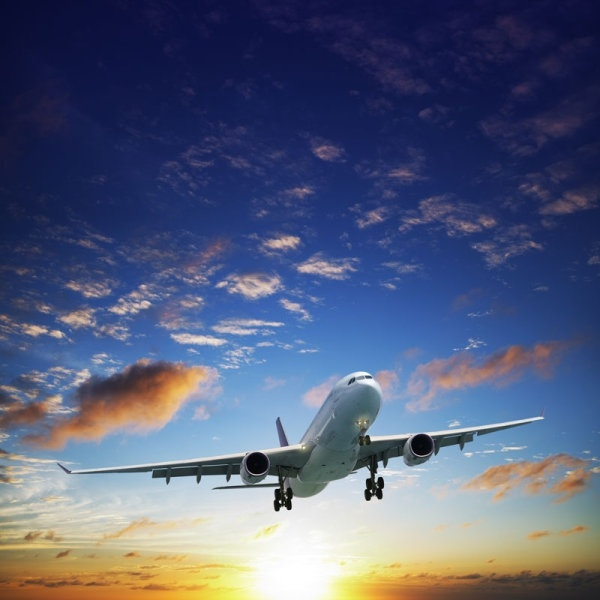

### Problem Statement:
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

### FEATURES:
**Airline**: The name of the airline.

**Date_of_Journey**: The date of the journey

**Source**: The source from which the service begins.

**Destination**: The destination where the service ends.

**Route**: The route taken by the flight to reach the destination.

**Dep_Time**: The time when the journey starts from the source.

**Arrival_Time**: Time of arrival at the destination.

**Duration**: Total duration of the flight.

**Total_Stops**: Total stops between the source and destination.

**Additional_Info**: Additional information about the flight

**Price**: The price of the ticket

 

In [1]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_train = pd.read_excel(r"C:\Users\PREETI\Downloads\Flight_Ticket_Participant_Datasets\Data_Train.xlsx")
df_test = pd.read_excel(r"C:\Users\PREETI\Downloads\Flight_Ticket_Participant_Datasets\Test_set.xlsx")

In [3]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

## Data Analysis

#### Train_data

In [4]:
df_train.head() # checking first 5 rows

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302

In [5]:
df_train.tail(5)   # checking last rows of the dataset

Airline Date_of_Journey    Source Destination  \
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore   New Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time Arrival_Time Duration Total_Stops  \
10678              CCU → BLR    19:55        22:25   2h 30m    non-stop   
10679              CCU → BLR    20:45        23:20   2h 35m    non-stop   
10680              BLR → DEL    08:20        11:20       3h    non-stop   
10681              BLR → DEL    11:30        14:10   2h 40m    non-stop   
10682  DEL → GOI → BOM → COK    10:55        19:15   8h 20m     2 stops   

      Additional_Info  Price  
10678         No info   4107  
10679         No info   4145  
10680         No info   7229  
10681         No info  12648  
10682         No info  11753

In [6]:
df_train.sample(5)  # checking random rows of the dataset

Airline Date_of_Journey    Source Destination            Route  \
5364     Air Asia       3/06/2019     Delhi      Cochin  DEL → BLR → COK   
876   Jet Airways       3/06/2019  Banglore       Delhi        BLR → DEL   
9113  Jet Airways      21/05/2019   Kolkata    Banglore  CCU → BOM → BLR   
6158  Jet Airways      24/04/2019  Banglore       Delhi        BLR → DEL   
7786       IndiGo      15/06/2019   Chennai     Kolkata        MAA → CCU   

     Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
5364    16:45  06:35 04 Jun  13h 50m      1 stop         No info  11410  
876     15:15         18:10   2h 55m    non-stop         No info   8016  
9113    08:25         20:45  12h 20m      1 stop         No info  14781  
6158    19:50         22:50       3h    non-stop         No info   7229  
7786    14:45         17:05   2h 20m    non-stop         No info   3597

#### Test_data

In [7]:
df_test.head() # checking first 5 rows

Airline Date_of_Journey    Source Destination            Route  \
0        Jet Airways       6/06/2019     Delhi      Cochin  DEL → BOM → COK   
1             IndiGo      12/05/2019   Kolkata    Banglore  CCU → MAA → BLR   
2        Jet Airways      21/05/2019     Delhi      Cochin  DEL → BOM → COK   
3  Multiple carriers      21/05/2019     Delhi      Cochin  DEL → BOM → COK   
4           Air Asia      24/06/2019  Banglore       Delhi        BLR → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops              Additional_Info  
0    17:30  04:25 07 Jun  10h 55m      1 stop                      No info  
1    06:20         10:20       4h      1 stop                      No info  
2    19:15  19:00 22 May  23h 45m      1 stop  In-flight meal not included  
3    08:00         21:00      13h      1 stop                      No info  
4    23:55  02:45 25 Jun   2h 50m    non-stop                      No info

In [8]:
df_test.tail(5)   # checking last rows of the dataset

Airline Date_of_Journey   Source Destination            Route  \
2666          Air India       6/06/2019  Kolkata    Banglore  CCU → DEL → BLR   
2667             IndiGo      27/03/2019  Kolkata    Banglore        CCU → BLR   
2668        Jet Airways       6/03/2019    Delhi      Cochin  DEL → BOM → COK   
2669          Air India       6/03/2019    Delhi      Cochin  DEL → BOM → COK   
2670  Multiple carriers      15/06/2019    Delhi      Cochin  DEL → BOM → COK   

     Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  
2666    20:30  20:25 07 Jun  23h 55m      1 stop         No info  
2667    14:20         16:55   2h 35m    non-stop         No info  
2668    21:50  04:25 07 Mar   6h 35m      1 stop         No info  
2669    04:00         19:15  15h 15m      1 stop         No info  
2670    04:55         19:15  14h 20m      1 stop         No info

In [9]:
df_test.sample(5)  # checking random rows of the dataset

Airline Date_of_Journey    Source Destination  \
1590             IndiGo      24/03/2019  Banglore   New Delhi   
1219  Multiple carriers       9/05/2019     Delhi      Cochin   
2417             IndiGo      24/04/2019  Banglore       Delhi   
709         Jet Airways      01/03/2019  Banglore   New Delhi   
2237        Jet Airways      21/05/2019     Delhi      Cochin   

                Route Dep_Time  Arrival_Time Duration Total_Stops  \
1590        BLR → DEL    13:10         16:10       3h    non-stop   
1219  DEL → HYD → COK    07:10         22:30  15h 20m      1 stop   
2417        BLR → DEL    04:00         06:50   2h 50m    non-stop   
709   BLR → BOM → DEL    18:40  08:15 02 Mar  13h 35m      1 stop   
2237  DEL → BOM → COK    19:15  19:00 22 May  23h 45m      1 stop   

     Additional_Info  
1590         No info  
1219         No info  
2417         No info  
709          No info  
2237         No info

In [10]:
print(df_train.shape) # checking size of the dataset
print(df_test.shape)

(10683, 11)
(2671, 10)


### Checking columns

In [11]:
df_train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [12]:
df_test.keys()

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

### Checking Target Variable

<AxesSubplot:ylabel='Density'>

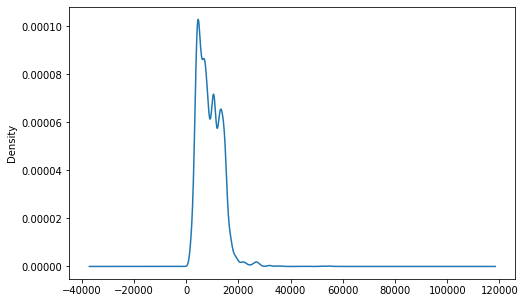

In [13]:
plt.figure(figsize = (8,5))
df_train.Price.plot(kind = 'kde')

#### From above graph we find that most of the flight ticket prices are lies in the range of approx 0 to 20000

In [14]:
df_train.dtypes  # checking datatypes of the train dataset

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [15]:
df_test.dtypes # checking datatypes of the test dataset

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

### Observations

- In train dataset all the columns of dataset are object except Price of the flight.


- In test dataset all the columns of dataset are objects datatypes.

In [16]:
df_train.describe()  # checking overall summary of the dataset

Price
count  10683.000000
mean    9087.064121
std     4611.359167
min     1759.000000
25%     5277.000000
50%     8372.000000
75%    12373.000000
max    79512.000000

In [17]:
df_train.describe(include = 'all')  # checking overall statiscal summary of the dataset

Airline Date_of_Journey Source Destination            Route  \
count         10683           10683  10683       10683            10682   
unique           12              44      5           6              128   
top     Jet Airways      18/05/2019  Delhi      Cochin  DEL → BOM → COK   
freq           3849             504   4537        4537             2376   
mean            NaN             NaN    NaN         NaN              NaN   
std             NaN             NaN    NaN         NaN              NaN   
min             NaN             NaN    NaN         NaN              NaN   
25%             NaN             NaN    NaN         NaN              NaN   
50%             NaN             NaN    NaN         NaN              NaN   
75%             NaN             NaN    NaN         NaN              NaN   
max             NaN             NaN    NaN         NaN              NaN   

       Dep_Time Arrival_Time Duration Total_Stops Additional_Info  \
count     10683        10683    10683       10682           10683   
unique      222         1343      368           5              10   
top       18:55        19:00   2h 50m      1 stop         No info   
freq        233          423      550        5625            8345   
mean        NaN          NaN      NaN         NaN             NaN   
std         NaN          NaN      NaN         NaN             NaN   
min         NaN          NaN      NaN         NaN             NaN   
25%         NaN          NaN      NaN         NaN             NaN   
50%         NaN          NaN      NaN         NaN             NaN   
75%         NaN          NaN      NaN         NaN             NaN   
max         NaN          NaN      NaN         NaN             NaN   

               Price  
count   10683.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean     9087.064121  
std      4611.359167  
min      1759.000000  
25%      5277.000000  
50%      8372.000000  
75%     12373.000000  
max     79512.000000

In [18]:
df_test.describe(include = 'all')  # checking overall statiscal summary of the dataset

Airline Date_of_Journey Source Destination            Route  \
count          2671            2671   2671        2671             2671   
unique           11              44      5           6              100   
top     Jet Airways       9/05/2019  Delhi      Cochin  DEL → BOM → COK   
freq            897             144   1145        1145              624   

       Dep_Time Arrival_Time Duration Total_Stops Additional_Info  
count      2671         2671     2671        2671            2671  
unique      199          704      320           5               6  
top       10:00        19:00   2h 50m      1 stop         No info  
freq         62          113      122        1431            2148

### Checking Null Values of the Dataset

In [19]:
df_train.isnull().sum()/len(df_train) # checking null values percentage of train dataset

Airline            0.000000
Date_of_Journey    0.000000
Source             0.000000
Destination        0.000000
Route              0.000094
Dep_Time           0.000000
Arrival_Time       0.000000
Duration           0.000000
Total_Stops        0.000094
Additional_Info    0.000000
Price              0.000000
dtype: float64

In [20]:
df_test.isnull().sum()/len(df_test) # checking null values percentage of test dataset

Airline            0.0
Date_of_Journey    0.0
Source             0.0
Destination        0.0
Route              0.0
Dep_Time           0.0
Arrival_Time       0.0
Duration           0.0
Total_Stops        0.0
Additional_Info    0.0
dtype: float64

### Observations:

- As per train dataset it have 0.00094 percent null values which is very small portion of dataset hence we can drop it.

In [21]:
df_train.dropna(inplace = True, axis = 0)

In [22]:
df_train.isnull().sum()/len(df_train) # checking null values percentage of train dataset again

Airline            0.0
Date_of_Journey    0.0
Source             0.0
Destination        0.0
Route              0.0
Dep_Time           0.0
Arrival_Time       0.0
Duration           0.0
Total_Stops        0.0
Additional_Info    0.0
Price              0.0
dtype: float64

<AxesSubplot:>

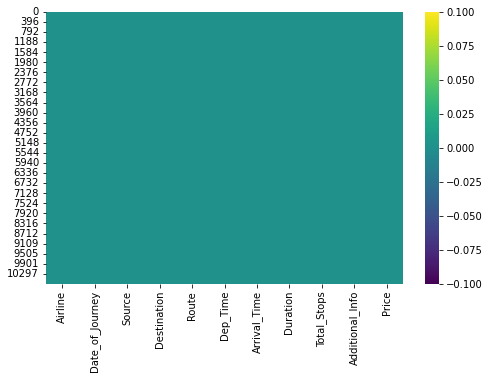

In [23]:
plt.figure(figsize = (8,5))
sns.heatmap(df_train.isnull(), cmap = 'viridis')  #checking null values visually

<AxesSubplot:>

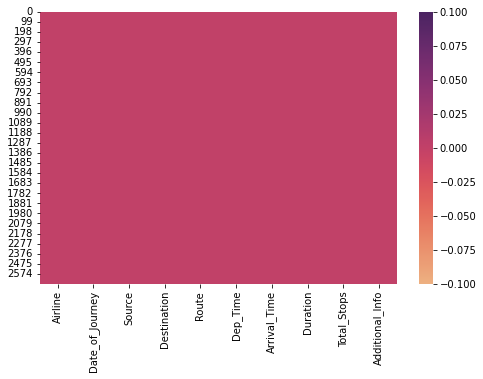

In [24]:
plt.figure(figsize = (8,5))
sns.heatmap(df_test.isnull(), cmap = 'flare')  # checking null values visually

### Checking duplicated values

In [25]:
df_train.duplicated().sum() # duplicate values counts of the train dataset 

220

In [26]:
df_train[df_train.duplicated()]  # checking duplicated values

Airline Date_of_Journey    Source Destination  \
683    Jet Airways       1/06/2019     Delhi      Cochin   
1061     Air India      21/05/2019     Delhi      Cochin   
1348     Air India      18/05/2019     Delhi      Cochin   
1418   Jet Airways       6/06/2019     Delhi      Cochin   
1674        IndiGo      24/03/2019  Banglore   New Delhi   
1685   Jet Airways       9/05/2019     Delhi      Cochin   
1704        IndiGo      09/03/2019  Banglore   New Delhi   
1807   Jet Airways       1/06/2019     Delhi      Cochin   
1891   Jet Airways       1/06/2019     Delhi      Cochin   
1971   Jet Airways       9/05/2019     Delhi      Cochin   
1982     Air India       1/06/2019     Delhi      Cochin   
2093   Jet Airways       9/06/2019     Delhi      Cochin   
2548   Jet Airways       9/05/2019     Delhi      Cochin   
2595     Air India      15/06/2019     Delhi      Cochin   
2661   Jet Airways      21/05/2019     Delhi      Cochin   
2677   Jet Airways       9/06/2019     Delhi      Cochin   
2716     Air India       9/05/2019     Delhi      Cochin   
2845   Jet Airways       6/06/2019     Delhi      Cochin   
2870      SpiceJet      24/03/2019  Banglore   New Delhi   
2903   Jet Airways      18/05/2019     Delhi      Cochin   
2943   Jet Airways       9/05/2019     Delhi      Cochin   
3003     Air India       9/05/2019     Delhi      Cochin   
3102   Jet Airways      24/06/2019     Delhi      Cochin   
3135        IndiGo      03/03/2019  Banglore   New Delhi   
3151   Jet Airways      18/05/2019     Delhi      Cochin   
3256     Air India      21/05/2019   Kolkata    Banglore   
3283   Jet Airways      15/06/2019     Delhi      Cochin   
3363   Jet Airways      21/03/2019     Delhi      Cochin   
3450   Jet Airways       9/05/2019     Delhi      Cochin   
3457     Air India       6/03/2019     Delhi      Cochin   
3620   Jet Airways       3/06/2019     Delhi      Cochin   
3632   Jet Airways       3/06/2019     Delhi      Cochin   
3674   Jet Airways      18/05/2019     Delhi      Cochin   
3711      SpiceJet      24/03/2019  Banglore   New Delhi   
3717   Jet Airways      21/05/2019     Delhi      Cochin   
3843   Jet Airways      27/03/2019     Delhi      Cochin   
3856   Jet Airways      21/03/2019     Delhi      Cochin   
3984   Jet Airways      27/03/2019     Delhi      Cochin   
4026   Jet Airways      18/05/2019     Delhi      Cochin   
4096   Jet Airways      12/06/2019     Delhi      Cochin   
4132   Jet Airways      24/06/2019     Delhi      Cochin   
4260   Jet Airways      27/03/2019     Delhi      Cochin   
4300     Air India      21/05/2019     Delhi      Cochin   
4323   Jet Airways       9/06/2019     Delhi      Cochin   
4412   Jet Airways       9/05/2019     Delhi      Cochin   
4571     Air India       1/06/2019     Delhi      Cochin   
4593   Jet Airways      27/06/2019     Delhi      Cochin   
4636   Jet Airways      27/05/2019     Delhi      Cochin   
4649     Air India       6/06/2019     Delhi      Cochin   
4710   Jet Airways       9/06/2019     Delhi      Cochin   
4865   Jet Airways       9/05/2019     Delhi      Cochin   
4920   Jet Airways      21/05/2019     Delhi      Cochin   
4945   Jet Airways      24/06/2019     Delhi      Cochin   
5014     Air India      15/05/2019   Kolkata    Banglore   
5042     Air India       1/05/2019   Kolkata    Banglore   
5092     Air India       9/03/2019     Delhi      Cochin   
5336   Jet Airways      24/06/2019     Delhi      Cochin   
5359   Jet Airways      12/06/2019     Delhi      Cochin   
5363     Air India      21/03/2019     Delhi      Cochin   
5365   Jet Airways      21/05/2019     Delhi      Cochin   
5391   Jet Airways      24/06/2019     Delhi      Cochin   
5442     Air India      24/06/2019     Delhi      Cochin   
5470       Vistara      24/03/2019  Banglore   New Delhi   
5483     Air India      27/05/2019     Delhi      Cochin   
5509   Jet Airways       9/05/2019     Delhi      Cochin   
5844   Jet Airways      24/06/2019     Delhi      C

In [27]:
df_test.duplicated().sum() # duplicate values counts of the test dataset 

26

In [28]:
df_test[df_test.duplicated()]  # duplicate values of the test dataset 

Airline Date_of_Journey    Source Destination  \
294         Jet Airways      12/06/2019     Delhi      Cochin   
794         Jet Airways      12/06/2019     Delhi      Cochin   
909              IndiGo      24/03/2019  Banglore   New Delhi   
974           Air India      12/06/2019   Kolkata    Banglore   
1011        Jet Airways       9/05/2019     Delhi      Cochin   
1033  Multiple carriers      15/05/2019     Delhi      Cochin   
1044              GoAir      24/03/2019  Banglore   New Delhi   
1233        Jet Airways       6/06/2019     Delhi      Cochin   
1504          Air India      15/06/2019     Delhi      Cochin   
1537        Jet Airways       6/06/2019     Delhi      Cochin   
1752  Multiple carriers      21/05/2019     Delhi      Cochin   
1753        Jet Airways      18/05/2019     Delhi      Cochin   
1783          Air India      12/03/2019  Banglore   New Delhi   
1876          Air India       1/04/2019   Kolkata    Banglore   
1962  Multiple carriers      15/06/2019     Delhi      Cochin   
2007        Jet Airways      24/06/2019     Delhi      Cochin   
2042          Air India      09/03/2019  Banglore   New Delhi   
2083          Air India      15/06/2019     Delhi      Cochin   
2095        Jet Airways       1/06/2019     Delhi      Cochin   
2171        Jet Airways      21/05/2019     Delhi      Cochin   
2310        Jet Airways      27/03/2019     Delhi      Cochin   
2536          Air India       3/06/2019     Delhi      Cochin   
2553        Jet Airways      15/06/2019     Delhi      Cochin   
2560  Multiple carriers       3/06/2019     Delhi      Cochin   
2582          Air India      12/05/2019   Kolkata    Banglore   
2583             IndiGo      24/03/2019  Banglore   New Delhi   

                      Route Dep_Time  Arrival_Time Duration Total_Stops  \
294   DEL → JAI → BOM → COK    05:30  04:25 13 Jun  22h 55m     2 stops   
794   DEL → JAI → BOM → COK    05:30  04:25 13 Jun  22h 55m     2 stops   
909               BLR → DEL    20:00         22:55   2h 55m    non-stop   
974   CCU → DEL → AMD → BLR    07:00  05:25 13 Jun  22h 25m     2 stops   
1011  DEL → JAI → BOM → COK    05:30  04:25 10 May  22h 55m     2 stops   
1033        DEL → BOM → COK    07:30         19:15  11h 45m      1 stop   
1044              BLR → DEL    20:55         23:50   2h 55m    non-stop   
1233  DEL → JAI → BOM → COK    05:30  04:25 07 Jun  22h 55m     2 stops   
1504  DEL → GOI → BOM → COK    22:00  19:15 16 Jun  21h 15m     2 stops   
1537  DEL → NAG → BOM → COK    06:45  04:25 07 Jun  21h 40m     2 stops   
1752        DEL → BOM → COK    07:30         19:15  11h 45m      1 stop   
1753  DEL → AMD → BOM → COK    23:05  19:00 19 May  19h 55m     2 stops   
1783  BLR → CCU → GAU → DEL    05:50         22:10  16h 20m     2 stops   
1876  CCU → DEL → COK → BLR    07:00  01:20 02 Apr  18h 20m     2 stops   
1962        DEL → BOM → COK    10:00         21:00      11h      1 stop   
2007  DEL → JAI → BOM → COK    09:40  04:25 25 Jun  18h 45m     2 stops   
2042  BLR → BOM → AMD → DEL    17:25  23:55 13 Mar  30h 30m     2 stops   
2083  DEL → HYD → BOM → COK    13:15  19:15 16 Jun      30h     2 stops   
2095  DEL → NAG → BOM → COK    14:35  04:25 02 Jun  13h 50m     2 stops   
2171  DEL → JAI → BOM → COK    09:40  12:35 22 May  26h 55m     2 stops   
2310  DEL → MAA → BOM → COK    05:10  04:25 28 Mar  23h 15m     2 stops   
2536  DEL → GOI → BOM → COK    22:00  19:15 04 Jun  21h 15m     2 stops   
2553  DEL → JAI → BOM → COK    05:30         19:00  13h 30m     2 stops   
2560        DEL → BOM → COK    13:00  01:30 04 Jun  12h 30m      1 stop   
2582  CCU → BOM → GOI → BLR    16:50  05:35 13 May  12h 45m     2 stops   
2583              BLR → DEL    18:55         21:45   2h 50m    non-stop   

                  Additional_Info  
294                       No info  
794   In-flight meal not included  
909                       No info  
974                       No info  
1011                      No info  
1033              

### Dropping Duplicate Values

In [29]:
df_train.drop_duplicates(keep = 'first', inplace = True)   # dropping duplicate values for improved dataset 

In [30]:
df_test.drop_duplicates(keep = 'first', inplace = True)   # dropping duplicate values for improved dataset 

In [31]:
print(df_train.shape) # checking size of the dataset
print(df_test.shape)

(10462, 11)
(2645, 10)


## Exploratory Data Analysis

In [32]:
df_train.dtypes  # checking datatypes for enchancing or extracting important details

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [33]:
df_test.dtypes  # checking datatypes for enchancing or extracting important details

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

### Checking Unique values

In [34]:
for i in df_train.columns:
    print(i, "column having ", df_train[i].nunique(), "unique values", "\n")  # train dataset

Airline column having  12 unique values 

Date_of_Journey column having  44 unique values 

Source column having  5 unique values 

Destination column having  6 unique values 

Route column having  128 unique values 

Dep_Time column having  222 unique values 

Arrival_Time column having  1343 unique values 

Duration column having  368 unique values 

Total_Stops column having  5 unique values 

Additional_Info column having  10 unique values 

Price column having  1870 unique values 



In [35]:
for i in df_test.columns:
    print(i, "column having ", df_test[i].nunique(), "unique values", "\n")  # test dataset

Airline column having  11 unique values 

Date_of_Journey column having  44 unique values 

Source column having  5 unique values 

Destination column having  6 unique values 

Route column having  100 unique values 

Dep_Time column having  199 unique values 

Arrival_Time column having  704 unique values 

Duration column having  320 unique values 

Total_Stops column having  5 unique values 

Additional_Info column having  6 unique values 



In [36]:
# dividing dataset into lessers unique value columns
unique_columns = ['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info', 'Route']

In [37]:
for i in unique_columns:
    print("--------------"+i+"---------------------",'\n' ,df_train[i].value_counts(), "\n")  # checking unique counts

--------------Airline--------------------- 
 Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64 

--------------Source--------------------- 
 Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: Source, dtype: int64 

--------------Destination--------------------- 
 Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64 

--------------Total_Stops--------------------- 
 1 stop      5625
non-st

### Converting Duration Hours into Minutes

In [38]:
df_train['Duration'] = df_train['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
df_test['Duration'] = df_test['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [39]:
df_train.head(2)

Airline Date_of_Journey    Source Destination                  Route  \
0     IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1  Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   

  Dep_Time  Arrival_Time  Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar       170    non-stop         No info   3897  
1    05:50         13:15       445     2 stops         No info   7662

In [40]:
df_test.head(2)

Airline Date_of_Journey   Source Destination            Route Dep_Time  \
0  Jet Airways       6/06/2019    Delhi      Cochin  DEL → BOM → COK    17:30   
1       IndiGo      12/05/2019  Kolkata    Banglore  CCU → MAA → BLR    06:20   

   Arrival_Time  Duration Total_Stops Additional_Info  
0  04:25 07 Jun       655      1 stop         No info  
1         10:20       240      1 stop         No info

### Extracting Date_of_Journey Important data

In [41]:
# train dataset
df_train['Date_of_Journey_Day'] = pd.to_datetime(df_train['Date_of_Journey']).dt.day
df_train['Date_of_Journey_Month'] = pd.to_datetime(df_train['Date_of_Journey']).dt.month

#test dataset
df_test['Date_of_Journey_Day'] = pd.to_datetime(df_test['Date_of_Journey']).dt.day
df_test['Date_of_Journey_Month'] = pd.to_datetime(df_test['Date_of_Journey']).dt.month

In [42]:
# droping date of Journey after extracting important details
df_train.drop(["Date_of_Journey"], axis = 1, inplace = True)
df_test.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [43]:
df_train.head(1) # checking changes

Airline    Source Destination      Route Dep_Time  Arrival_Time  Duration  \
0  IndiGo  Banglore   New Delhi  BLR → DEL    22:20  01:10 22 Mar       170   

  Total_Stops Additional_Info  Price  Date_of_Journey_Day  \
0    non-stop         No info   3897                   24   

   Date_of_Journey_Month  
0                      3

In [44]:
df_test.head(1) # checking changes

Airline Source Destination            Route Dep_Time  Arrival_Time  \
0  Jet Airways  Delhi      Cochin  DEL → BOM → COK    17:30  04:25 07 Jun   

   Duration Total_Stops Additional_Info  Date_of_Journey_Day  \
0       655      1 stop         No info                    6   

   Date_of_Journey_Month  
0                      6

### Extracting Dep_Time Important data

In [45]:
# train dataset
df_train["Dep_hour"] = pd.to_datetime(df_train["Dep_Time"]).dt.hour
df_train["Dep_min"] = pd.to_datetime(df_train["Dep_Time"]).dt.minute

#test dataset
df_test["Dep_hour"] = pd.to_datetime(df_test["Dep_Time"]).dt.hour
df_test["Dep_min"] = pd.to_datetime(df_test["Dep_Time"]).dt.minute

In [46]:
# droping Dep_Time after extracting important details
df_train.drop(["Dep_Time"], axis = 1, inplace = True)
df_test.drop(['Dep_Time'], axis = 1, inplace = True)

In [47]:
df_train.head(1) # checking changes

Airline    Source Destination      Route  Arrival_Time  Duration  \
0  IndiGo  Banglore   New Delhi  BLR → DEL  01:10 22 Mar       170   

  Total_Stops Additional_Info  Price  Date_of_Journey_Day  \
0    non-stop         No info   3897                   24   

   Date_of_Journey_Month  Dep_hour  Dep_min  
0                      3        22       20

In [48]:
df_test.head(1) # checking changes

Airline Source Destination            Route  Arrival_Time  Duration  \
0  Jet Airways  Delhi      Cochin  DEL → BOM → COK  04:25 07 Jun       655   

  Total_Stops Additional_Info  Date_of_Journey_Day  Date_of_Journey_Month  \
0      1 stop         No info                    6                      6   

   Dep_hour  Dep_min  
0        17       30

### Extracting Arrival_Time Important data

In [49]:
# train dataset
df_train["Arrival_Time_Hour"] = pd.to_datetime(df_train["Arrival_Time"]).dt.hour
df_train["Arrival_Time_Minute"] = pd.to_datetime(df_train["Arrival_Time"]).dt.minute

#test dataset
df_test["Arrival_Time_Hour"] = pd.to_datetime(df_test["Arrival_Time"]).dt.hour
df_test["Arrival_Time_Minute"] = pd.to_datetime(df_test["Arrival_Time"]).dt.minute

In [50]:
# droping Arrival_Time after extracting important details
df_train.drop(["Arrival_Time"], axis = 1, inplace = True)
df_test.drop(['Arrival_Time'], axis = 1, inplace = True)

In [51]:
df_train.head(1) # checking changes

Airline    Source Destination      Route  Duration Total_Stops  \
0  IndiGo  Banglore   New Delhi  BLR → DEL       170    non-stop   

  Additional_Info  Price  Date_of_Journey_Day  Date_of_Journey_Month  \
0         No info   3897                   24                      3   

   Dep_hour  Dep_min  Arrival_Time_Hour  Arrival_Time_Minute  
0        22       20                  1                   10

In [52]:
df_test.head(1) # checking changes

Airline Source Destination            Route  Duration Total_Stops  \
0  Jet Airways  Delhi      Cochin  DEL → BOM → COK       655      1 stop   

  Additional_Info  Date_of_Journey_Day  Date_of_Journey_Month  Dep_hour  \
0         No info                    6                      6        17   

   Dep_min  Arrival_Time_Hour  Arrival_Time_Minute  
0       30                  4                   25

In [53]:
df_train.dtypes  #checking dtypes again

Airline                  object
Source                   object
Destination              object
Route                    object
Duration                  int64
Total_Stops              object
Additional_Info          object
Price                     int64
Date_of_Journey_Day       int64
Date_of_Journey_Month     int64
Dep_hour                  int64
Dep_min                   int64
Arrival_Time_Hour         int64
Arrival_Time_Minute       int64
dtype: object

In [54]:
df_test.dtypes  #checking dtypes again

Airline                  object
Source                   object
Destination              object
Route                    object
Duration                  int64
Total_Stops              object
Additional_Info          object
Date_of_Journey_Day       int64
Date_of_Journey_Month     int64
Dep_hour                  int64
Dep_min                   int64
Arrival_Time_Hour         int64
Arrival_Time_Minute       int64
dtype: object

### Dividing columns into object and numerical categories for easy visualization understandings

In [55]:
# train dataset
df_train_object = df_train.select_dtypes(include = 'object').columns  # object dataset columns
df_train_num = df_train.select_dtypes(exclude = 'object').columns  # numerical dataset columns

# test dataset
df_test_object = df_test.select_dtypes(include = 'object').columns  # object dataset columns
df_test_num = df_test.select_dtypes(exclude = 'object').columns  # numerical dataset columns

In [56]:
df_train_object  # checking object columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [57]:
df_train_num  # checking non object columns

Index(['Duration', 'Price', 'Date_of_Journey_Day', 'Date_of_Journey_Month',
       'Dep_hour', 'Dep_min', 'Arrival_Time_Hour', 'Arrival_Time_Minute'],
      dtype='object')

### Univariate Analysis with respect to Target Variable

### AirLines

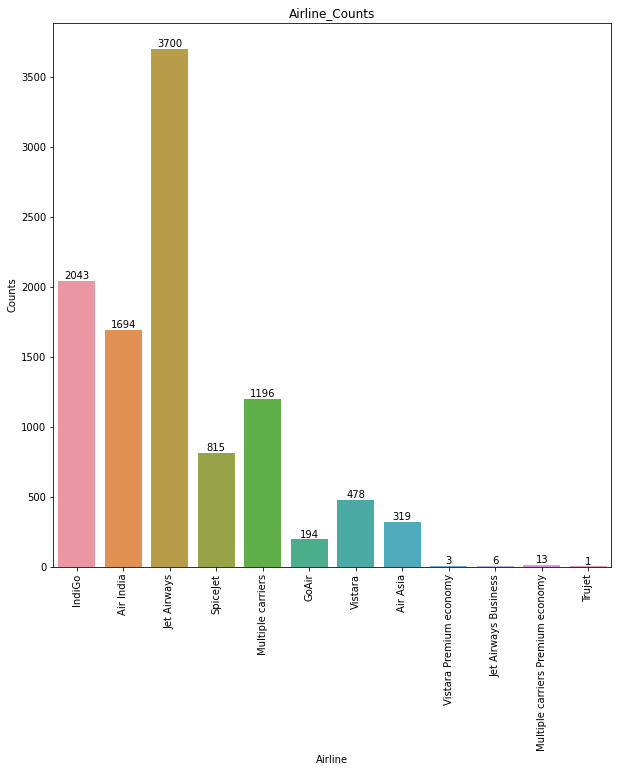

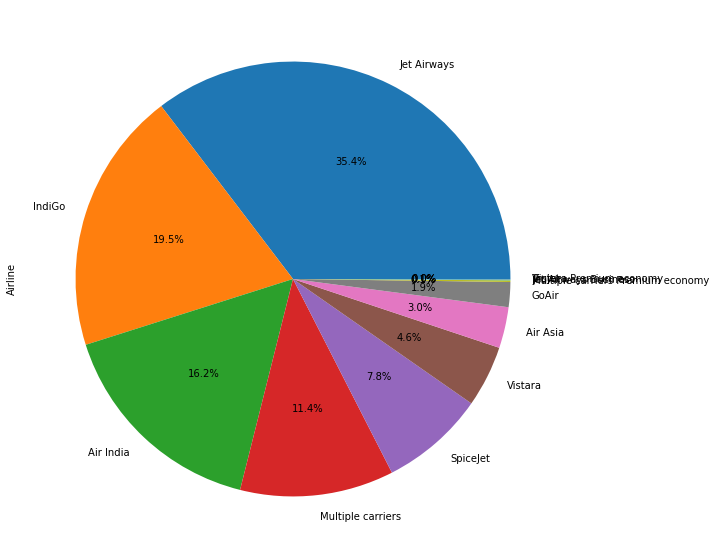

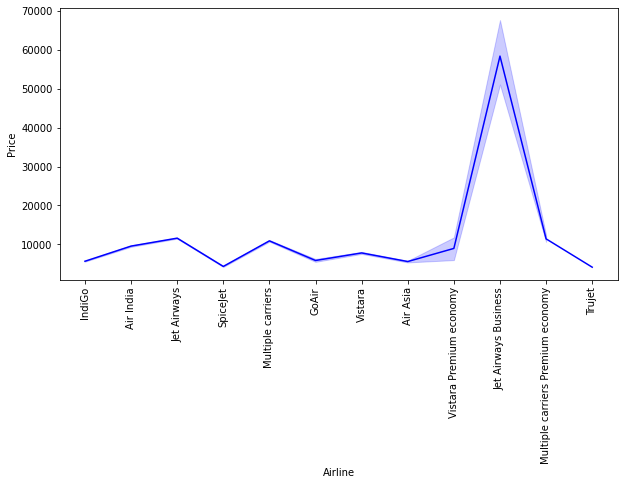

In [91]:
Airline = df_train.Airline.value_counts()
plt.figure(figsize = (10,10))
df_Airline = sns.countplot(x='Airline', data = df_train)
df_Airline.set_title('Airline_Counts')
df_Airline.set_xlabel('Airline')
df_Airline.set_ylabel('Counts')
plt.xticks(rotation = 90)
for i in df_Airline.containers:
    df_Airline.bar_label(i)
    
# Percentage of Airline
plt.figure(figsize = (10,10))
Airline.plot(kind = 'pie', autopct = '%1.1f%%')


plt.figure(figsize=(10,5))
sns.lineplot(x = "Airline", y = 'Price', data=df_train, color='blue')
plt.xticks(rotation = 90)
plt.show()

#### Observations

- Jet Airways are very high in counts as per dataset while Trujet runs only a single time.


- 35.4 % percent of the airlines are of Jet Airways while rest of flights are very small in amounts.


- Cost of Vastara Premium economy, Jet Airways Business, Multiple carriers premium economy and Trujet are very high in respect to other airlines.


### Source

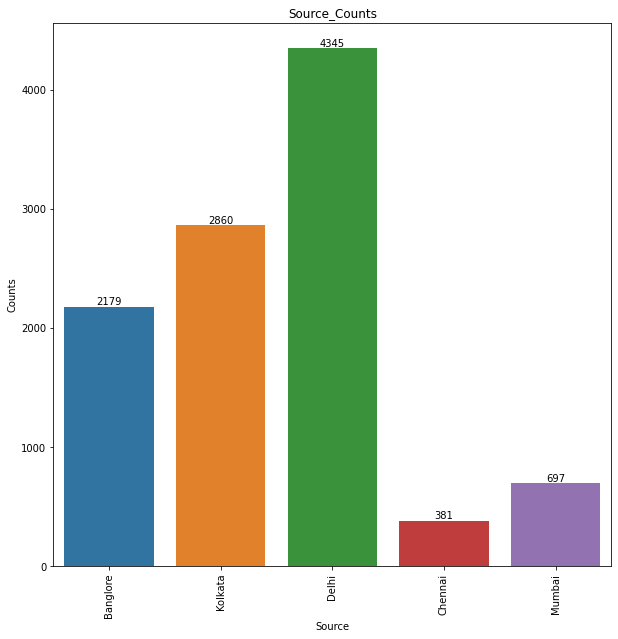

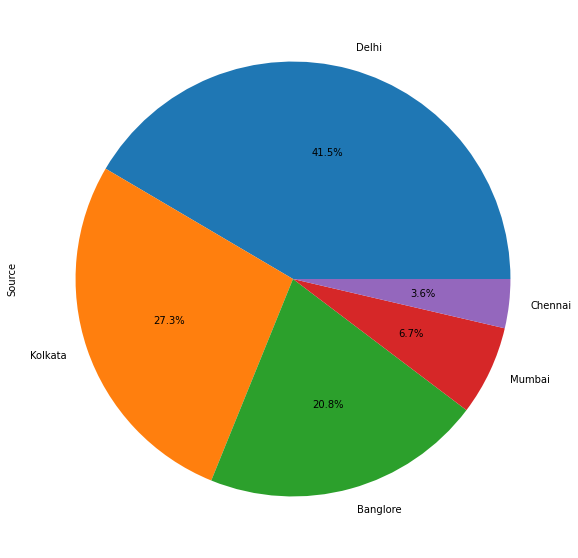

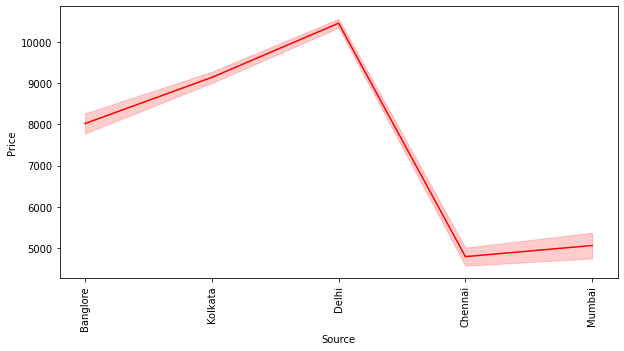

In [59]:
Source = df_train.Source.value_counts()
plt.figure(figsize = (10,10))
df_Source = sns.countplot(x='Source', data = df_train)
df_Source.set_title('Source_Counts')
df_Source.set_xlabel('Source')
df_Source.set_ylabel('Counts')
plt.xticks(rotation = 90)
for i in df_Source.containers:
    df_Source.bar_label(i)
    
# Percentage of Source
plt.figure(figsize = (10,10))
Source.plot(kind = 'pie', autopct = '%1.1f%%')


plt.figure(figsize=(10,5))
sns.lineplot(x = "Source", y = 'Price', data=df_train, color='red')
plt.xticks(rotation = 90)
plt.show()

### Observations

- Delhi source are very high in counts as per dataset while Chennai have very less.


- 41.5% percent of the airlines are source from Delhi while rest of flights sources are very small in amounts.


- Cost of Bangalore, Kolkata, Delhi are very high in respect to sources of airlines.


### Destination

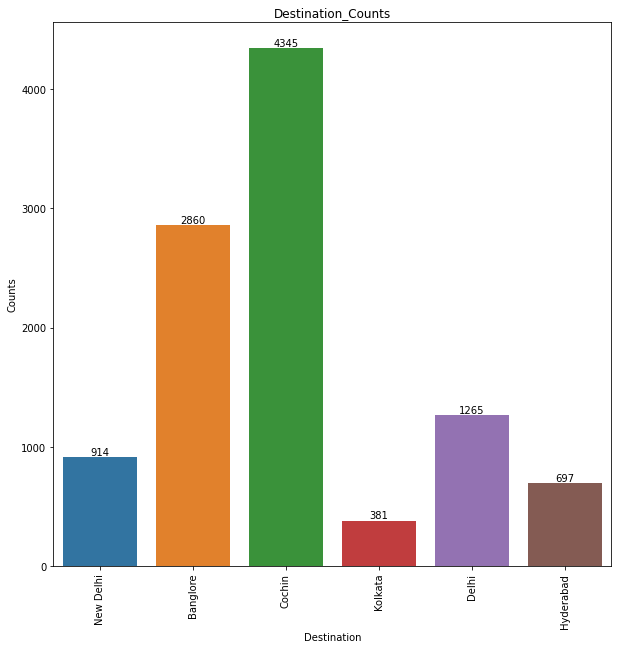

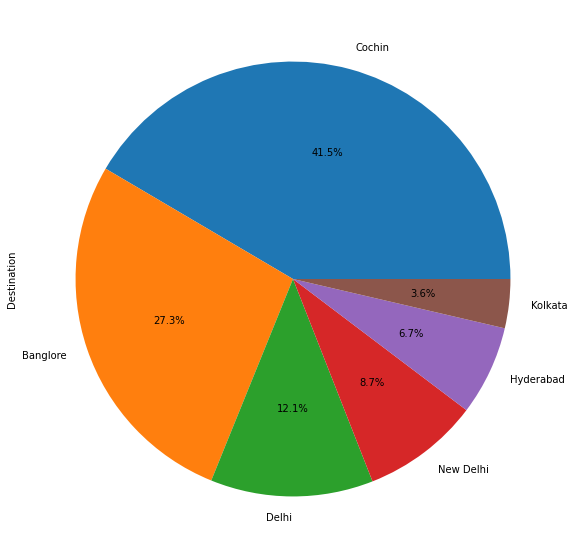

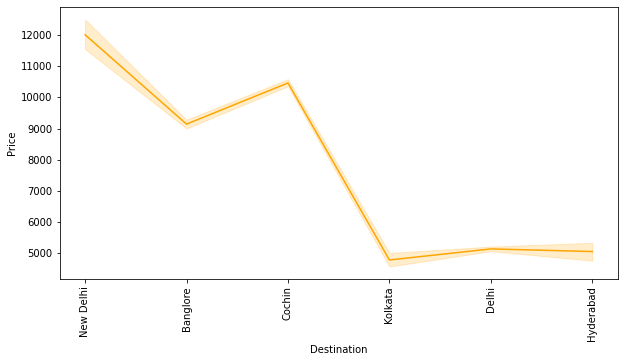

In [60]:
Destination = df_train.Destination.value_counts()
plt.figure(figsize = (10,10))
df_Destination = sns.countplot(x='Destination', data = df_train)
df_Destination.set_title('Destination_Counts')
df_Destination.set_xlabel('Destination')
df_Destination.set_ylabel('Counts')
plt.xticks(rotation = 90)
for i in df_Destination.containers:
    df_Destination.bar_label(i)
    
# Percentage of Destination
plt.figure(figsize = (10,10))
Destination.plot(kind = 'pie', autopct = '%1.1f%%')


plt.figure(figsize=(10,5))
sns.lineplot(x = "Destination", y = 'Price', data=df_train, color='orange')
plt.xticks(rotation = 90)
plt.show()

### Observations

- Cochin destination are very high in counts as per dataset while Kolkata have very less.


- 41.5% percent of the airlines having destination Cochin while rest of flights desinated counts are very small in amounts.


- Cost of New Delhi, Bangalore, Cochin are very high in respect to other destination of airlines.


### Route

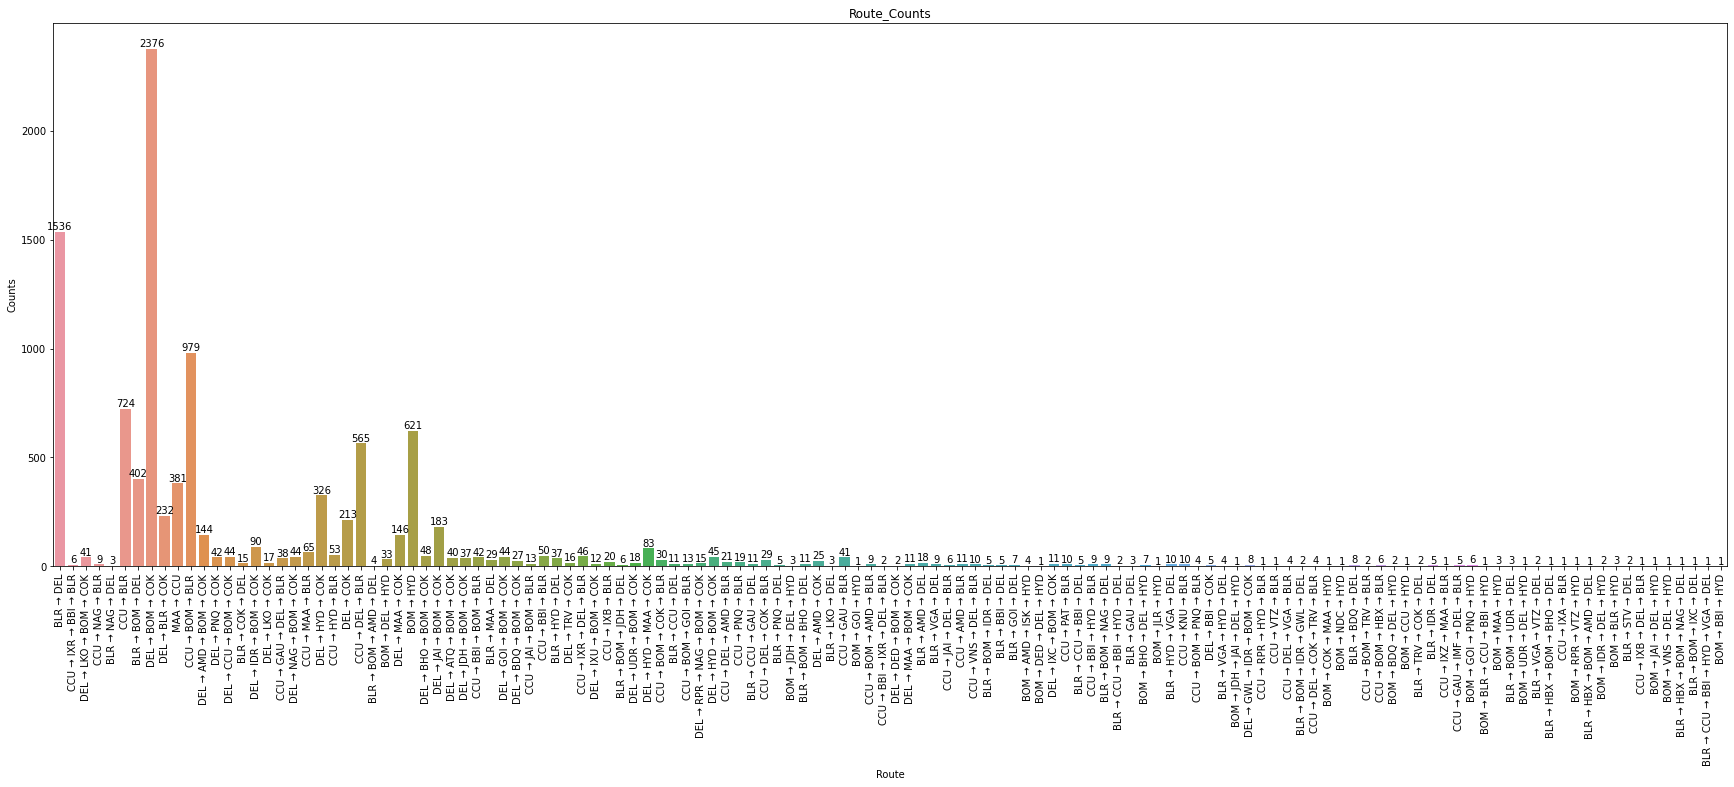

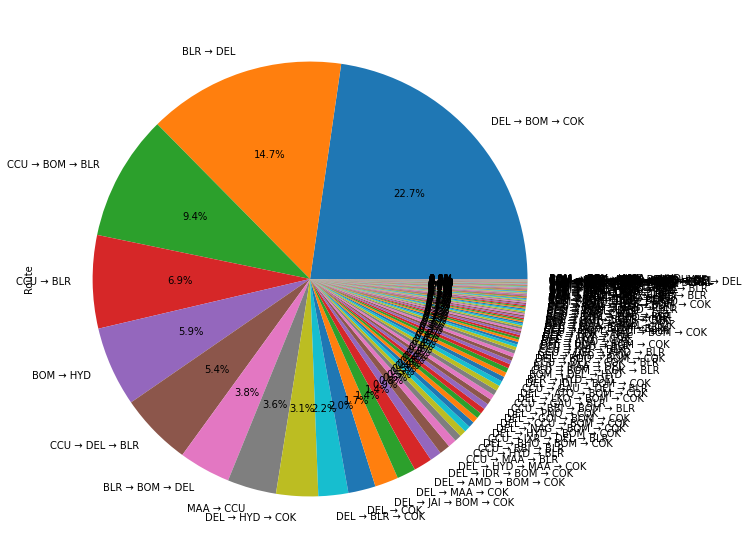

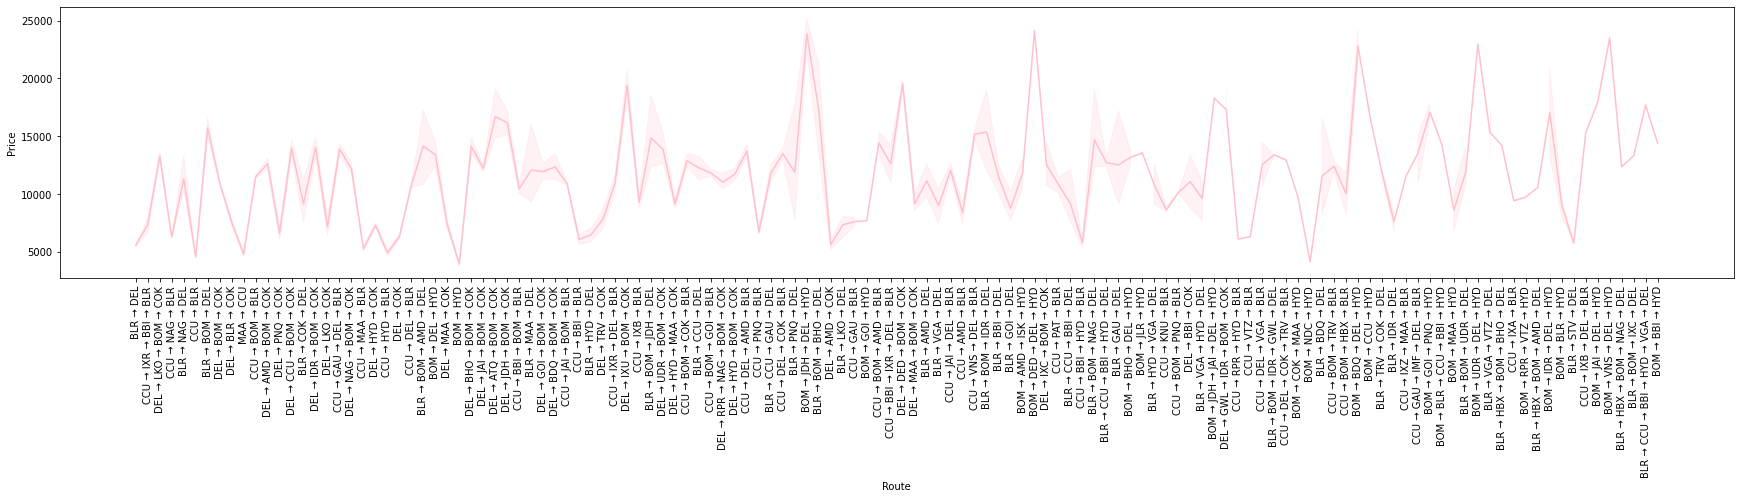

In [61]:
Route = df_train.Route.value_counts()
plt.figure(figsize = (30,10))
df_Route = sns.countplot(x='Route', data = df_train)
df_Route.set_title('Route_Counts')
df_Route.set_xlabel('Route')
df_Route.set_ylabel('Counts')
plt.xticks(rotation = 90)
for i in df_Route.containers:
    df_Route.bar_label(i)
    
# Percentage of Route
plt.figure(figsize = (10,10))
Route.plot(kind = 'pie', autopct = '%1.1f%%')


plt.figure(figsize=(30,5))
sns.lineplot(x = "Route", y = 'Price', data=df_train, color='pink')
plt.xticks(rotation = 90)
plt.show()

### Observations

- Delhi--> Bombay --> Cochin route are very high in counts as per dataset while rest route have very less.


- 22.7% percent of the airlines having route of Delhi--> Bombay --> Cochin while rest of flights routes counts are very small in amounts.


- Cost of route which are going to terminated at Hyderabad are very high in respect to other routes of airlines as per line plot.


### Total_Stops

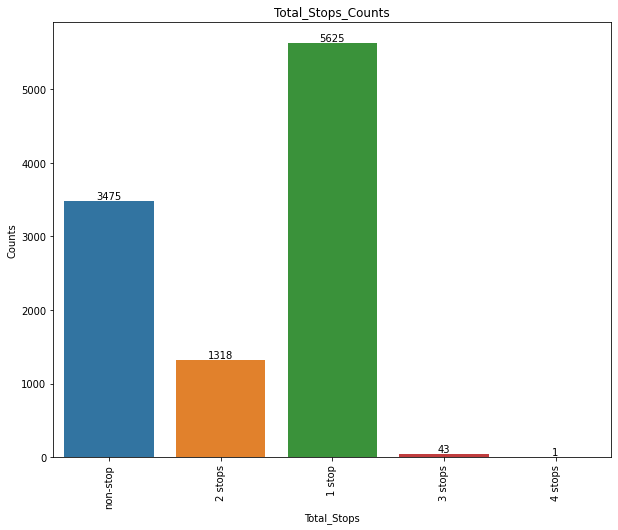

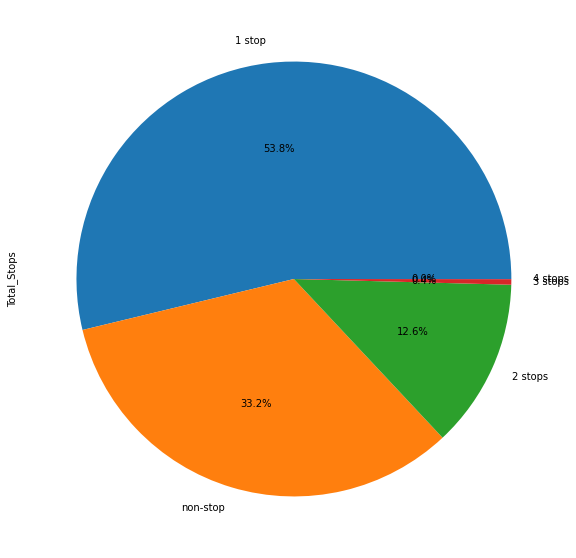

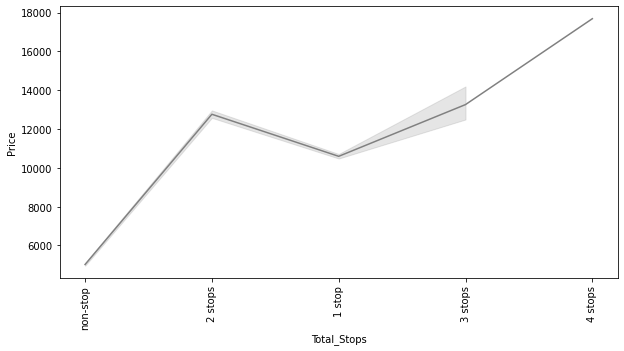

In [62]:
Total_Stops = df_train.Total_Stops.value_counts()
plt.figure(figsize = (10,8))
df_Total_Stops = sns.countplot(x='Total_Stops', data = df_train)
df_Total_Stops.set_title('Total_Stops_Counts')
df_Total_Stops.set_xlabel('Total_Stops')
df_Total_Stops.set_ylabel('Counts')
plt.xticks(rotation = 90)
for i in df_Total_Stops.containers:
    df_Total_Stops.bar_label(i)
    
# Percentage of Total_Stops
plt.figure(figsize = (10,10))
Total_Stops.plot(kind = 'pie', autopct = '%1.1f%%')


plt.figure(figsize=(10,5))
sns.lineplot(x = "Total_Stops", y = 'Price', data=df_train, color='grey')
plt.xticks(rotation = 90)
plt.show()

### Observations

- Route with one stop are very high in counts as per dataset while rest route have very less.


- 53.8% percent of the airlines having one stop route of Delhi--> Bombay --> Cochin while rest of flights routes counts are very small in amounts.


- Cost of Total stops are going to increases as per stops increases.

#### 

### Additional_Info

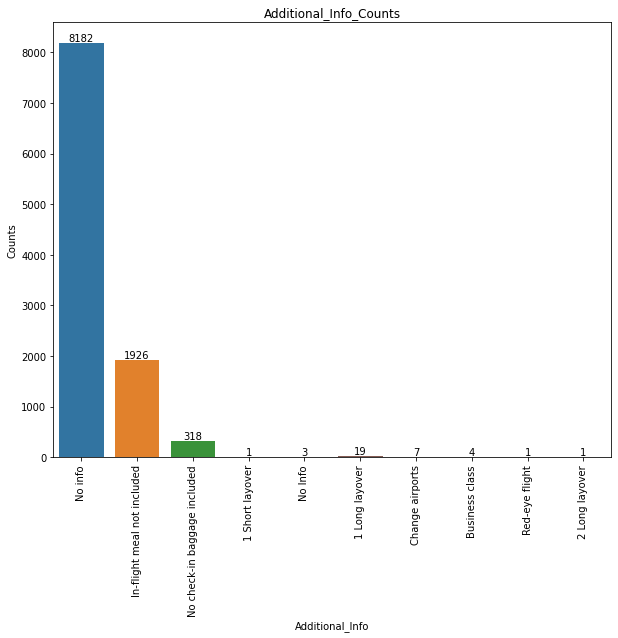

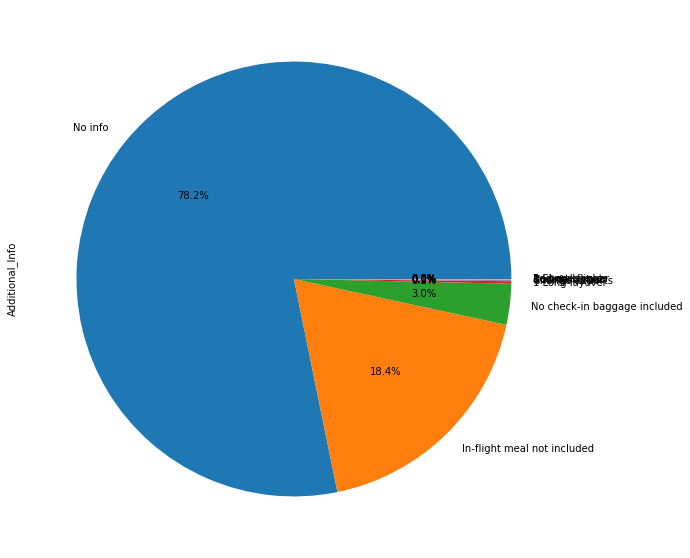

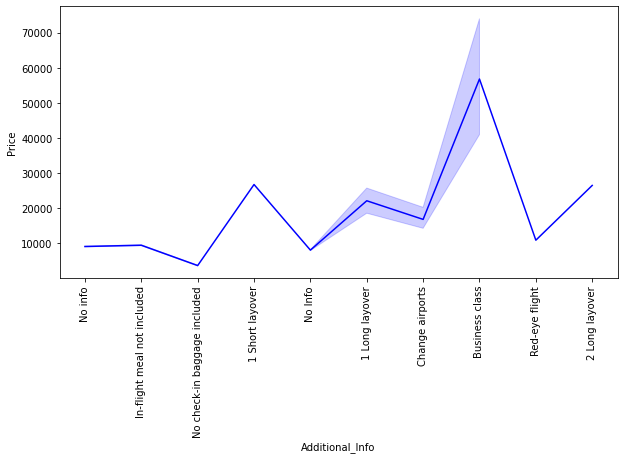

In [63]:
Additional_Info = df_train.Additional_Info.value_counts()
plt.figure(figsize = (10,8))
df_Additional_Info = sns.countplot(x='Additional_Info', data = df_train)
df_Additional_Info.set_title('Additional_Info_Counts')
df_Additional_Info.set_xlabel('Additional_Info')
df_Additional_Info.set_ylabel('Counts')
plt.xticks(rotation = 90)
for i in df_Additional_Info.containers:
    df_Additional_Info.bar_label(i)
    
# Percentage of Additional_info
plt.figure(figsize = (10,10))
Additional_Info.plot(kind = 'pie', autopct = '%1.1f%%')


plt.figure(figsize=(10,5))
sns.lineplot(x = "Additional_Info", y = 'Price', data=df_train, color='blue')
plt.xticks(rotation = 90)
plt.show()

### Observations

- No info are very high in counts as per dataset while additional info have very less.


- 78.2% percent of the customer having No additional info.


- Cost of Changes airports, Business class, 2 long layover of additional infor are going to increase prices of the flight.

In [64]:
df_train_num

Index(['Duration', 'Price', 'Date_of_Journey_Day', 'Date_of_Journey_Month',
       'Dep_hour', 'Dep_min', 'Arrival_Time_Hour', 'Arrival_Time_Minute'],
      dtype='object')

### Duration


 -------------------------------------Airline-------------------------------------


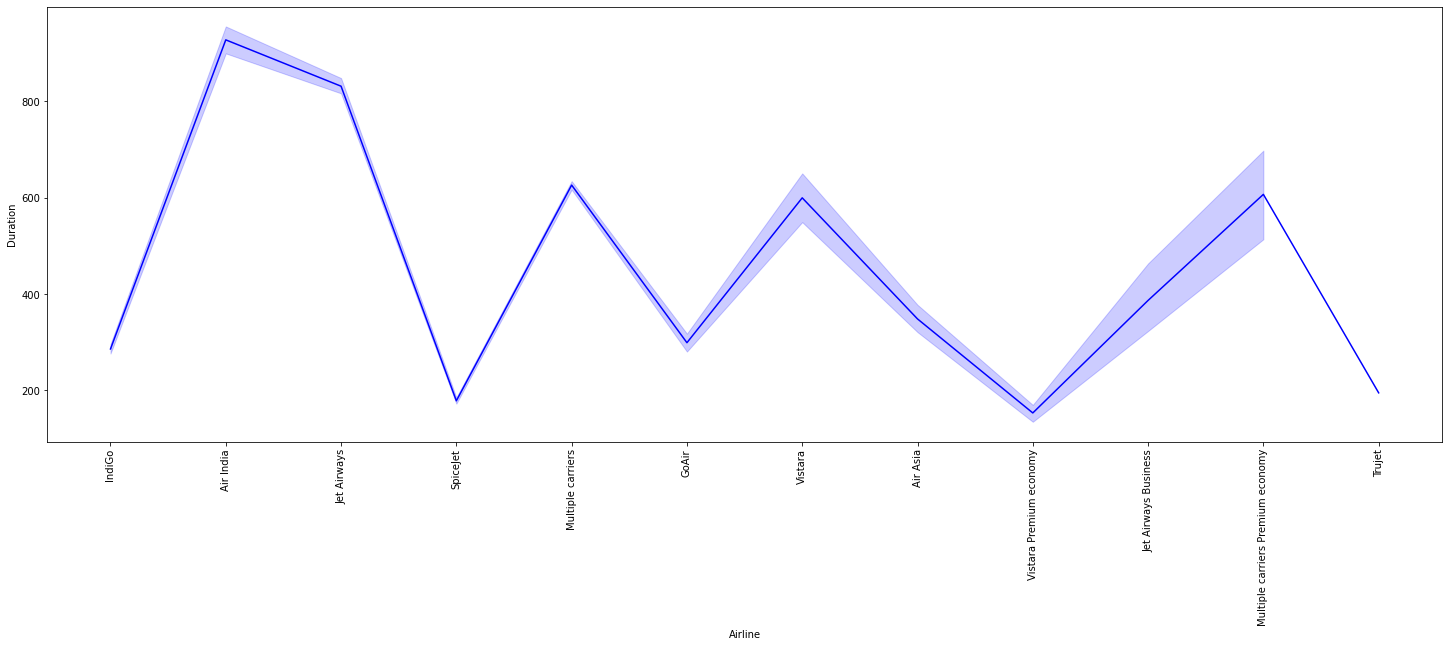


 -------------------------------------Source-------------------------------------


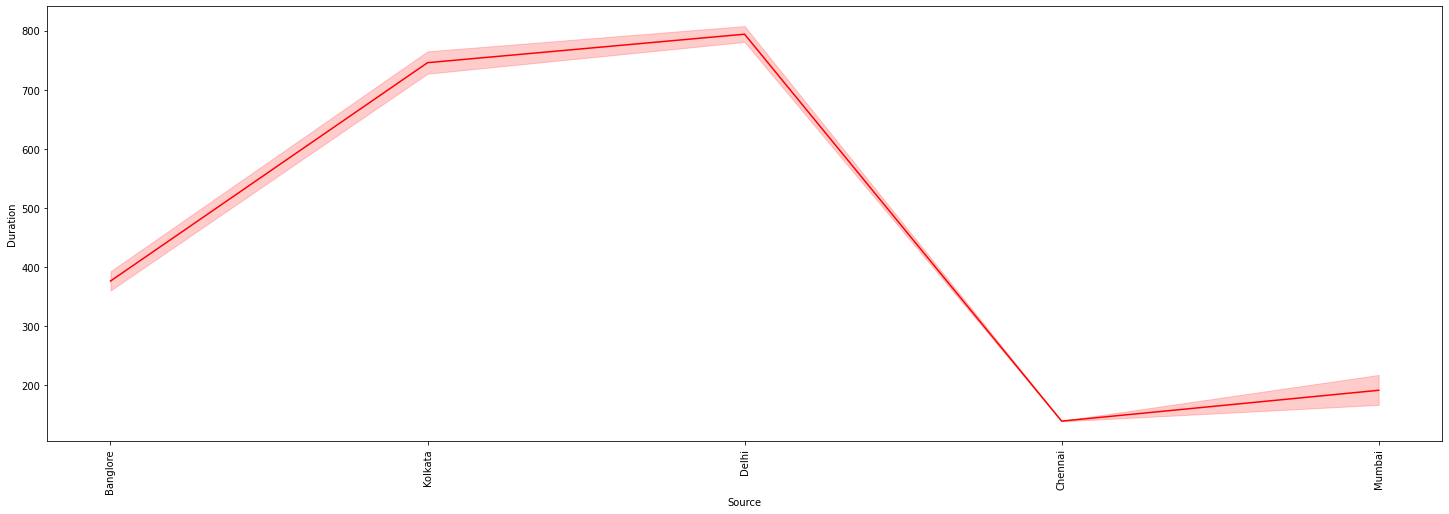


 -------------------------------------Destination-------------------------------------


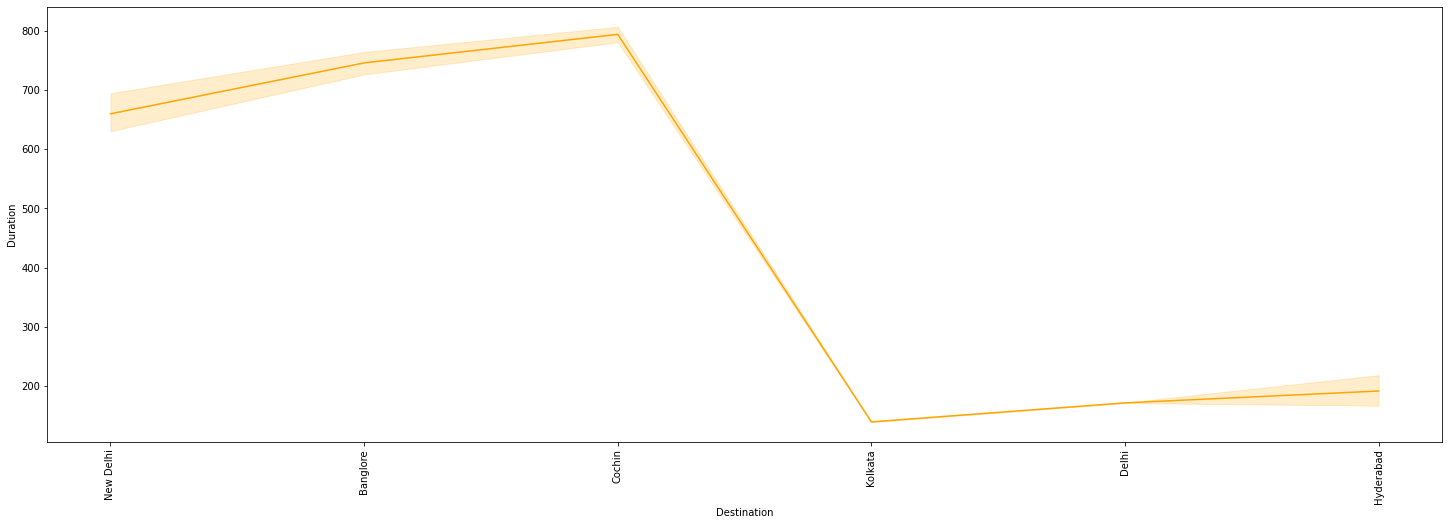


 -------------------------------------Route-------------------------------------


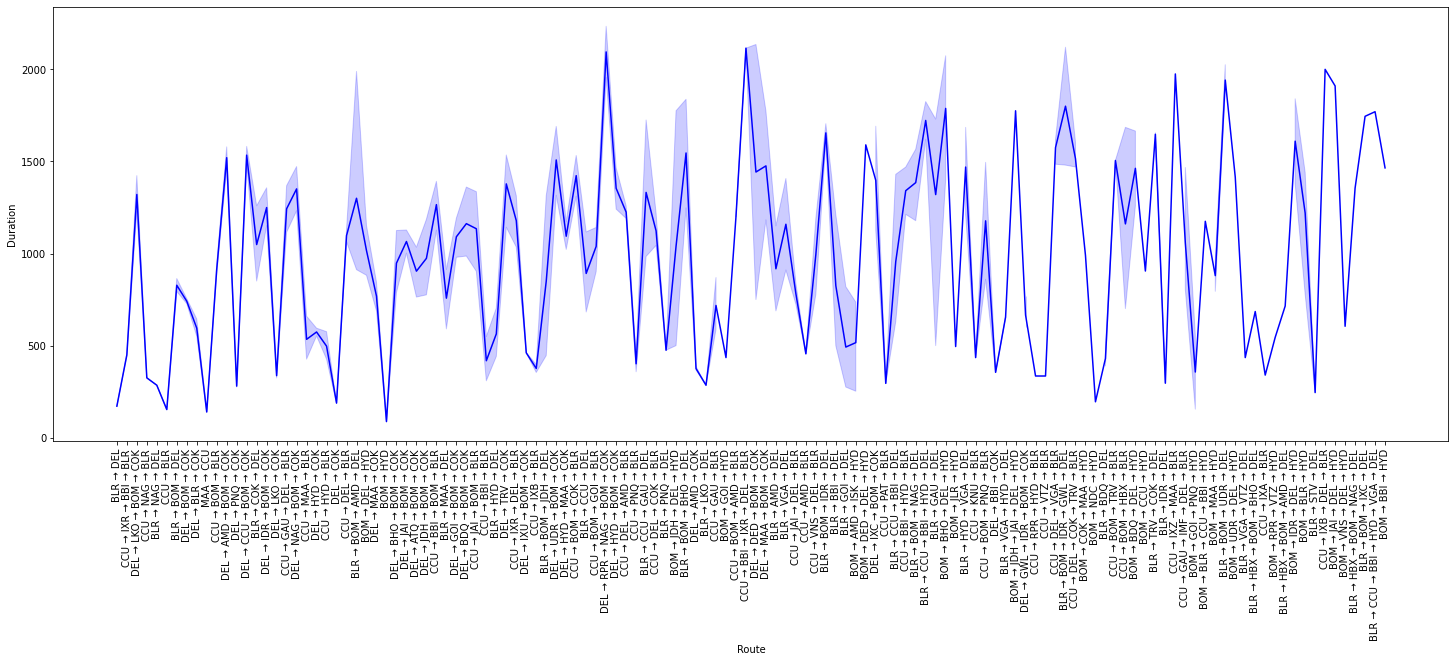


 -------------------------------------Total_Stops-------------------------------------


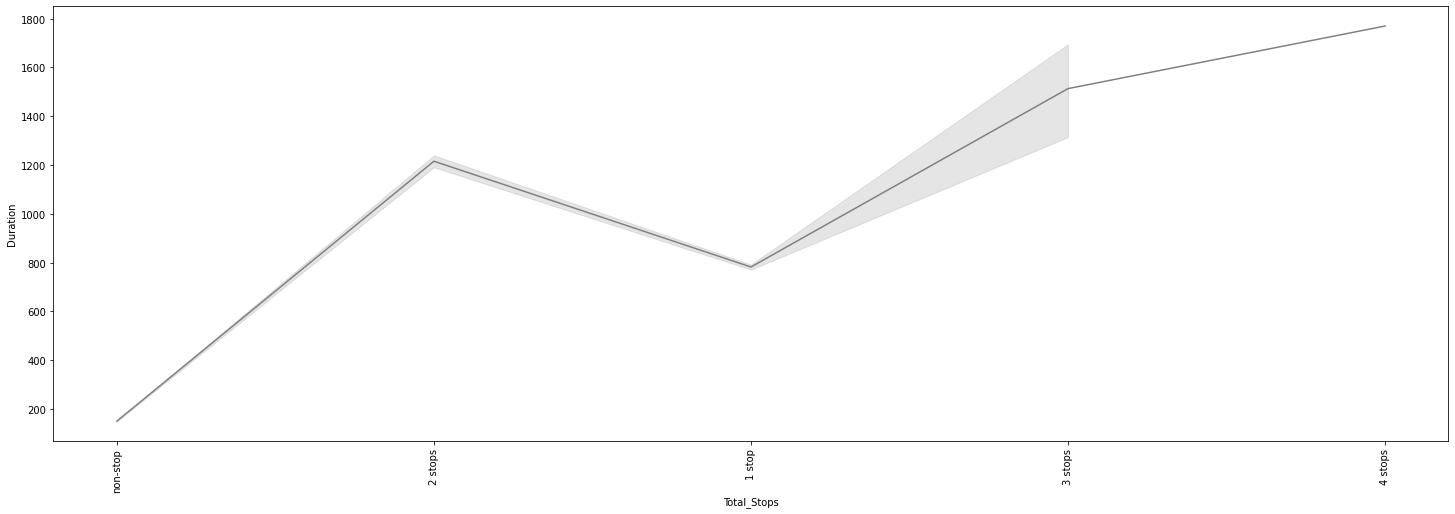


 -------------------------------------Additional_Info-------------------------------------


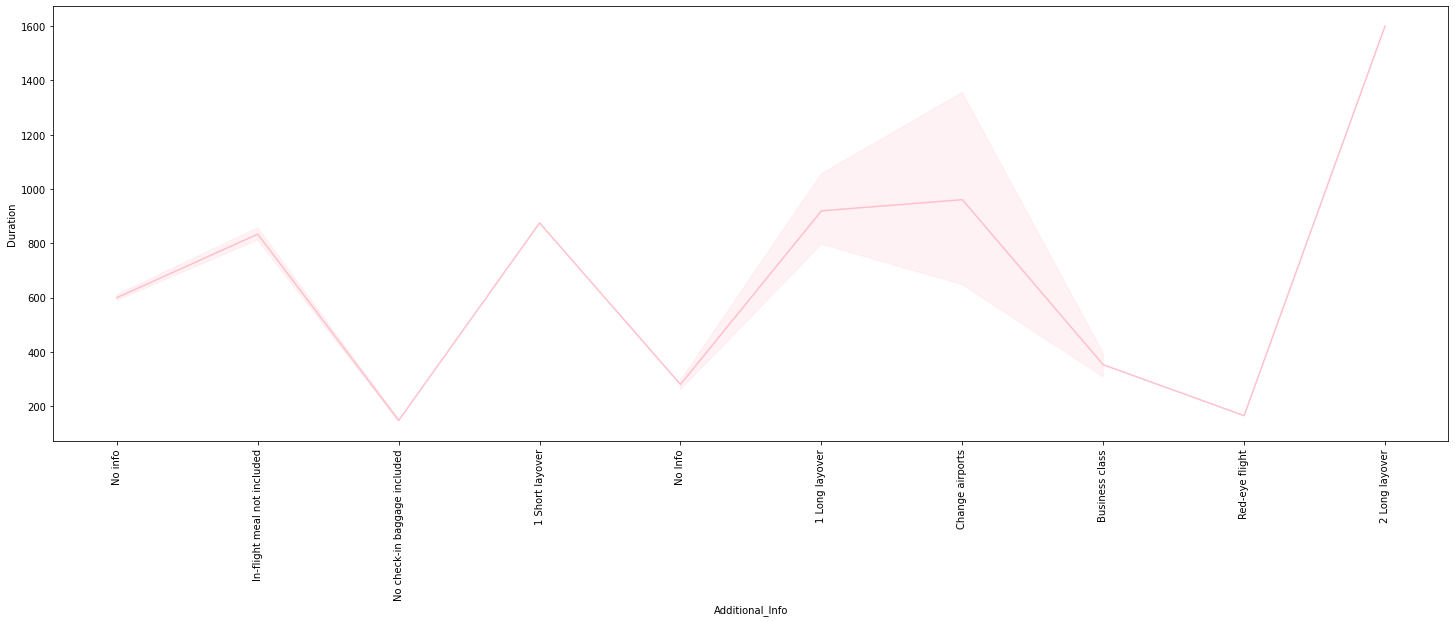

In [65]:
j = ['blue', 'red', 'orange', 'blue', 'grey', 'pink']
for i,j in zip(df_train_object, j):
    print("\n",'-------------------------------------'+i+ '-------------------------------------')
    plt.figure(figsize=(25,8))
    sns.lineplot(x= i ,y = 'Duration' ,data=df_train, color = j)
    plt.xticks(rotation = 90)
    plt.show()

#### Observations

- Airlines: Duration of Air India and Jet Airways are very much higher than others airlines.
    

- Source: Duration of Bangalore, Kolktata and Delhi Source are very high as per dataset.
    

- Destination: Duration of Bangalore, Cochin and New Delhi Destination are very high as per dataset.
    

- Routes/ Total Stops: Duration of 2, 3 , 4 stops are very high as per graph.
    

- Additional_Info: Flights which uses 2 Long Layover having more duration from rest of additional info dataset.


### Date_of_Journey_Day


 -------------------------------------Airline-------------------------------------


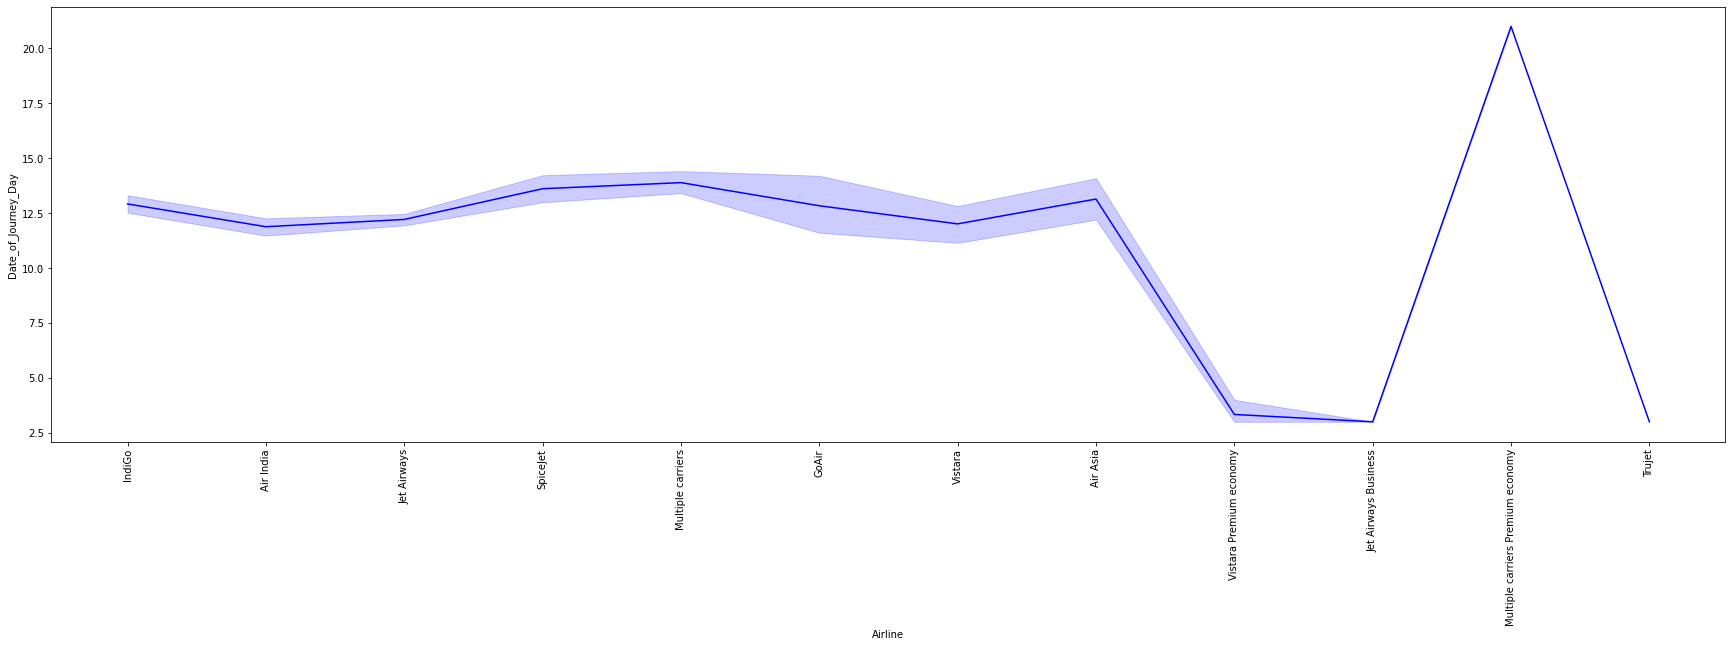


 -------------------------------------Source-------------------------------------


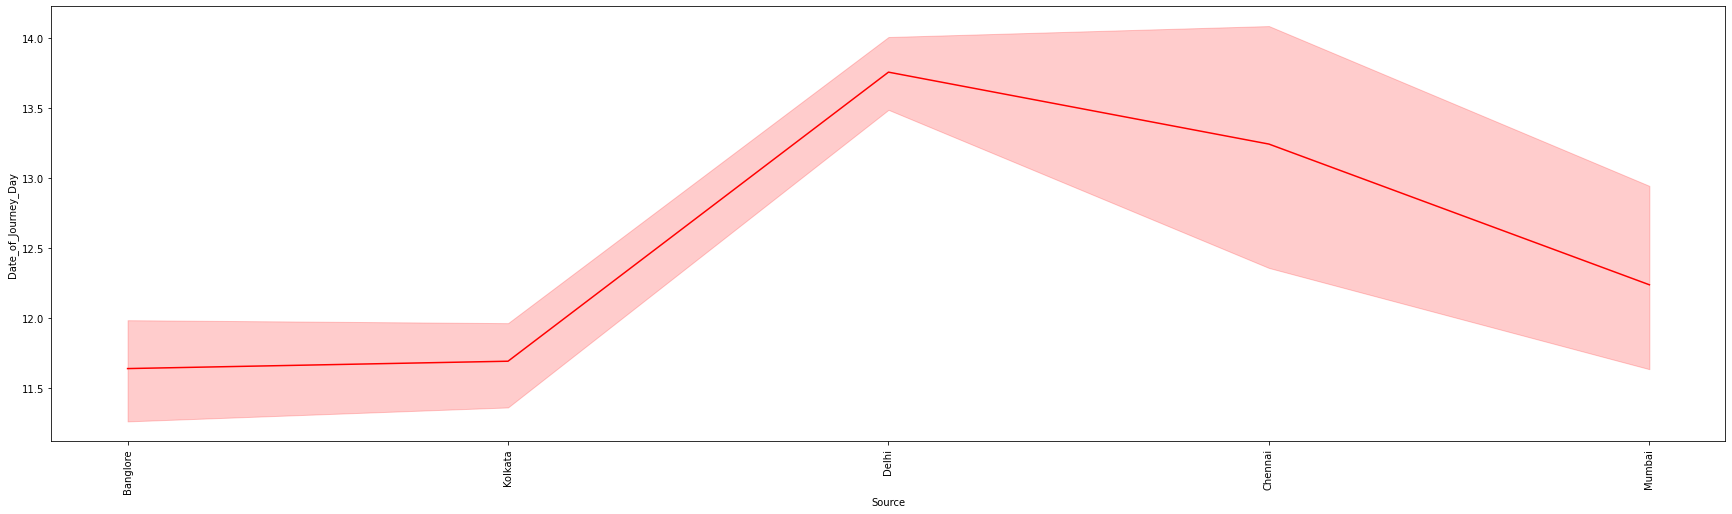


 -------------------------------------Destination-------------------------------------


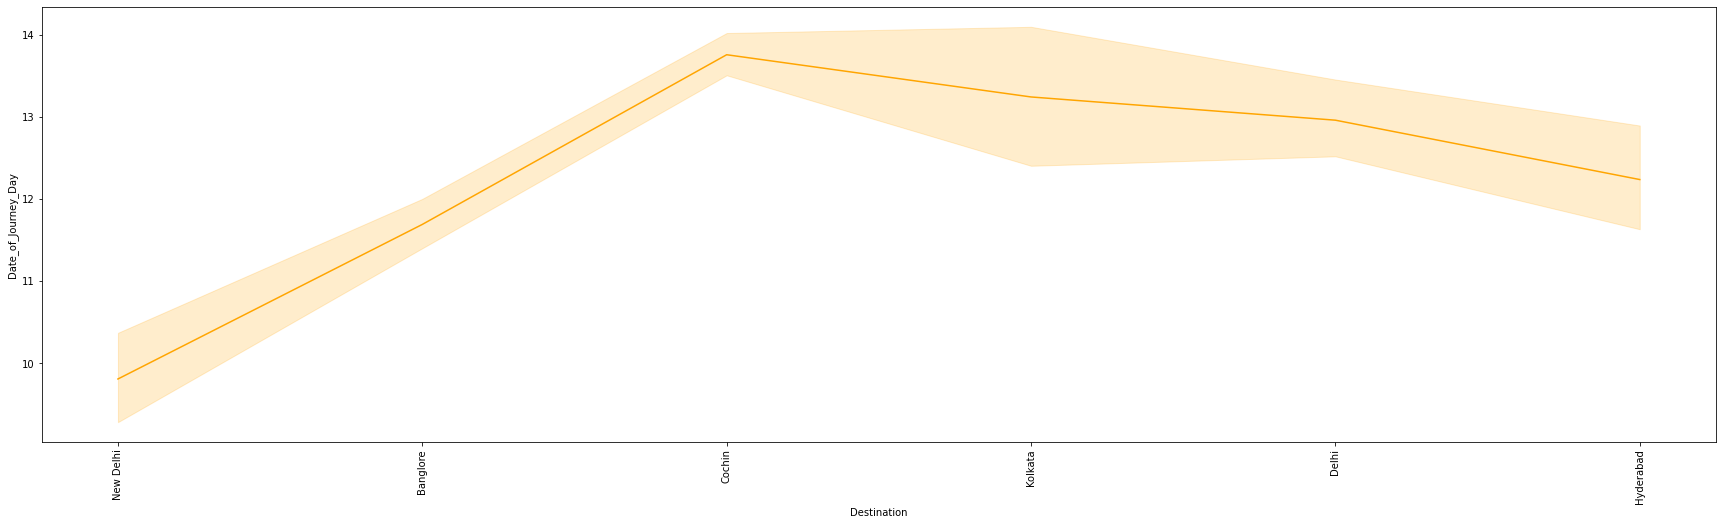


 -------------------------------------Route-------------------------------------


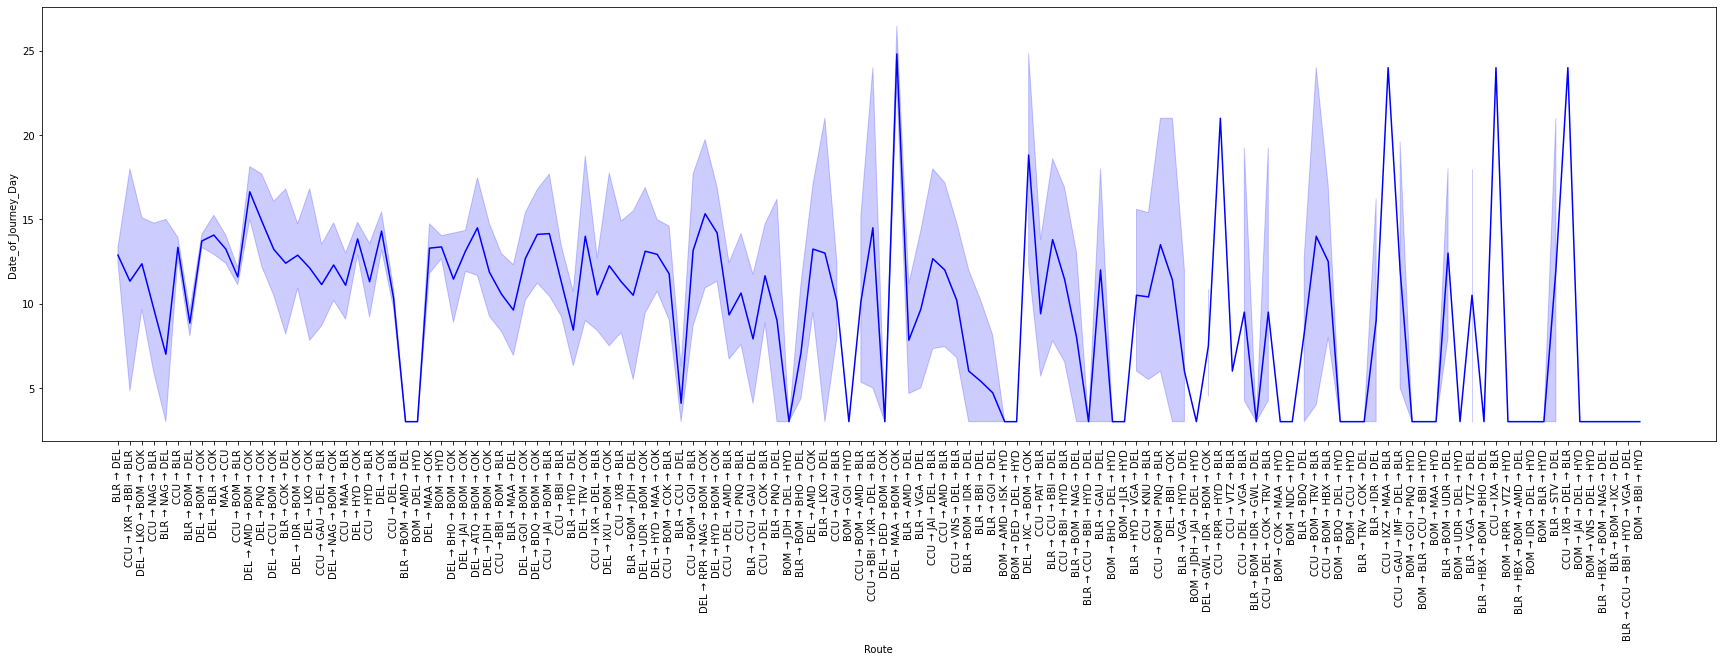


 -------------------------------------Total_Stops-------------------------------------


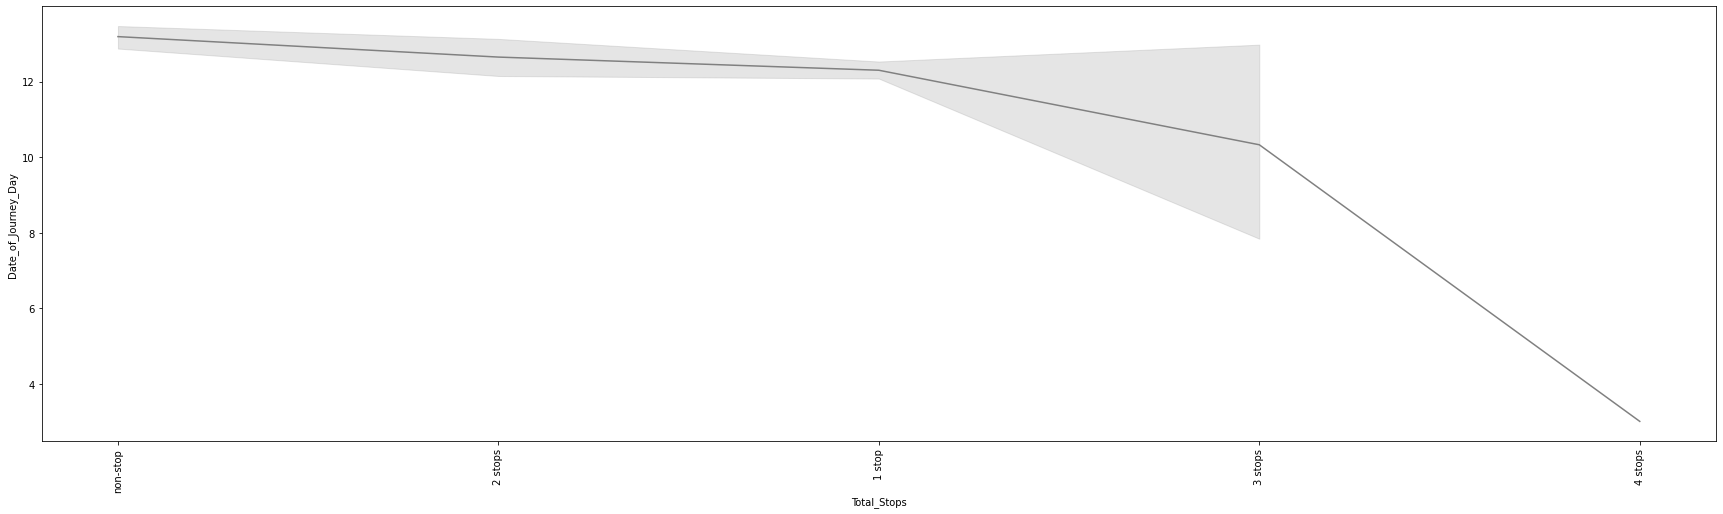


 -------------------------------------Additional_Info-------------------------------------


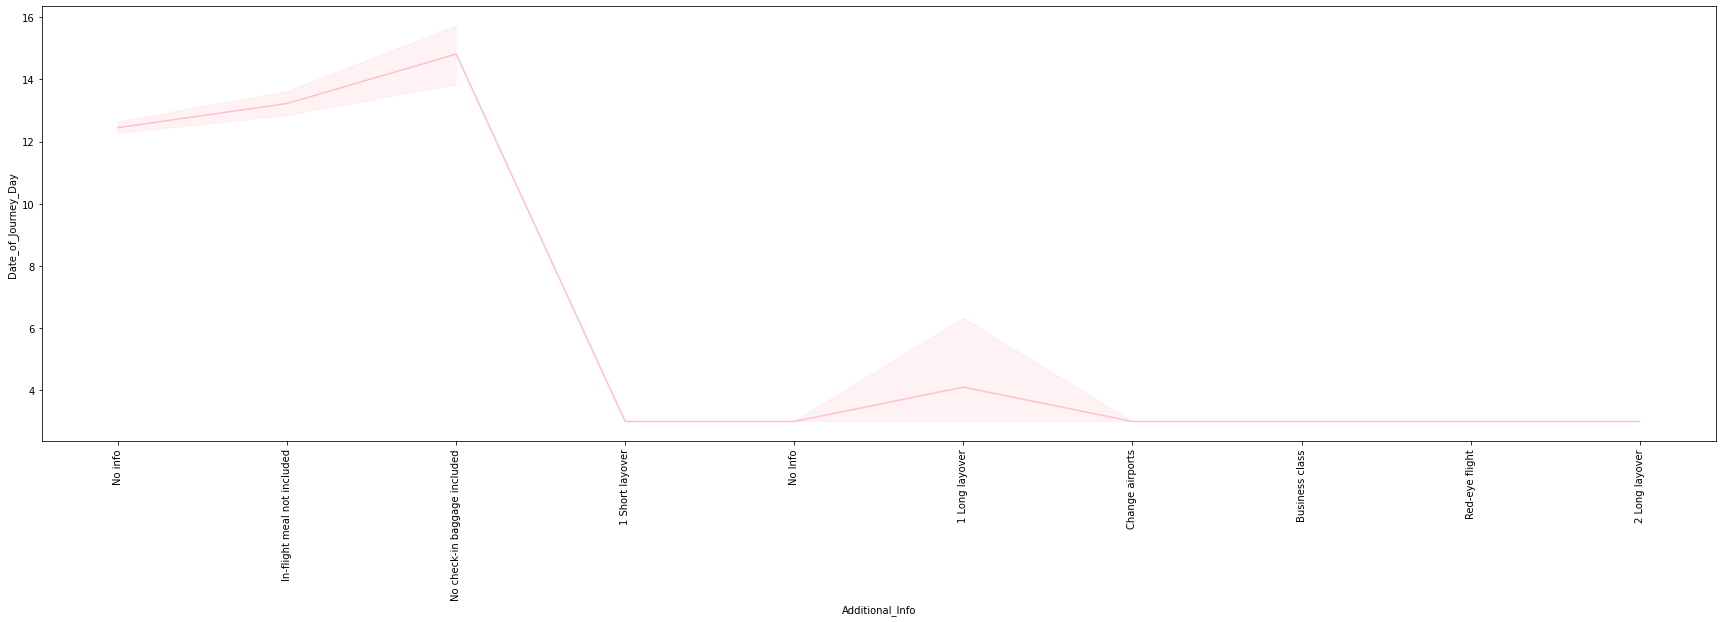

In [66]:
j = ['blue', 'red', 'orange', 'blue', 'grey', 'pink']
for i,j in zip(df_train_object, j):
    print("\n",'-------------------------------------'+i+ '-------------------------------------')
    plt.figure(figsize=(30,8))
    sns.lineplot(x= i ,y = 'Date_of_Journey_Day' ,data=df_train, color = j)
    plt.xticks(rotation = 90)
    plt.show()

### Observations

- Airlines: On 20th day journey of multiple carriers business are very much higher than others airlines.
    

- Source: From day 10 to 15 Delhi, Chennai and Mumbai Source are very high as per dataset.

    
- Destination: On 10th day onwards of  Cochin, Kolkata,  Delhi  and Hyderabad Destination are very high as per dataset.
    

- Routes/ Total Stops: Total stops of 2, 3 , 4 stops are are decreases month start date as per graph.
    

- Additional_Info: Flights additional info dataset are present more after 10th day of the month.


### Date_of_Journey_Month


 -------------------------------------Airline-------------------------------------


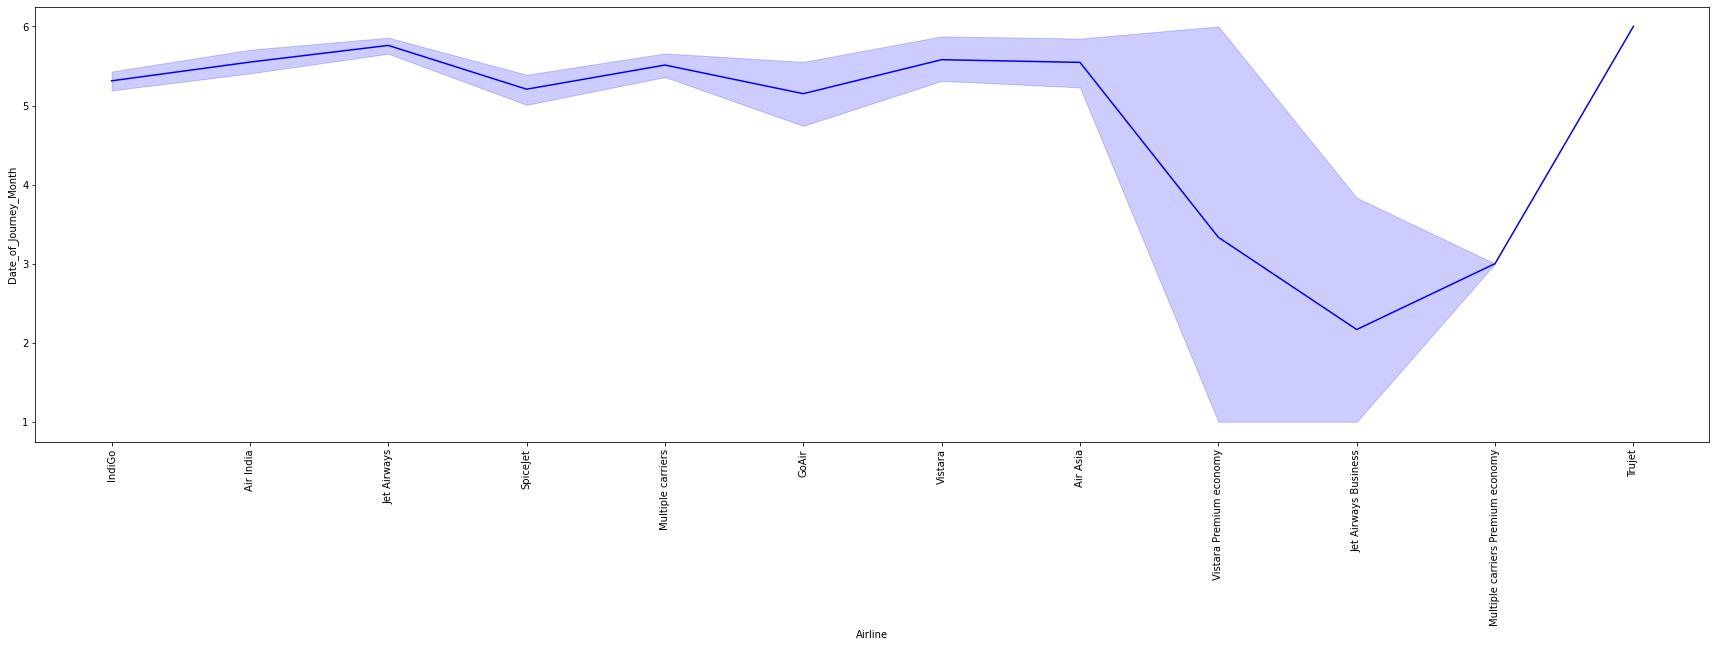


 -------------------------------------Source-------------------------------------


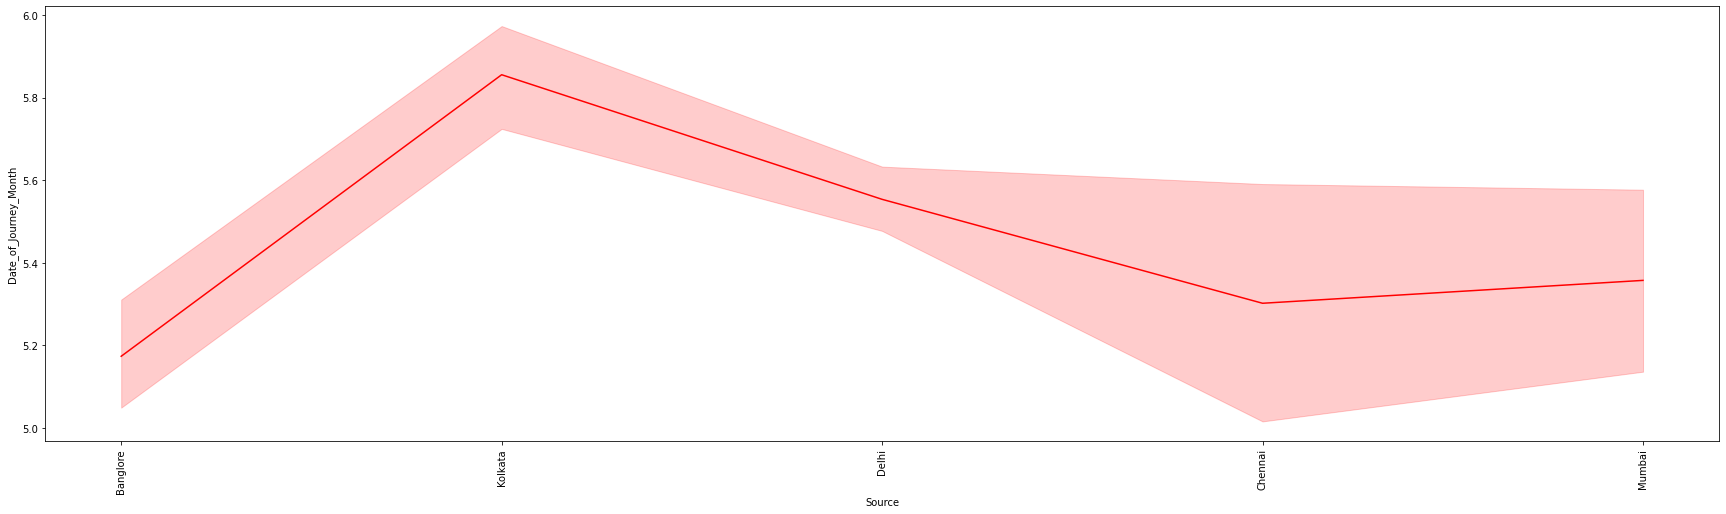


 -------------------------------------Destination-------------------------------------


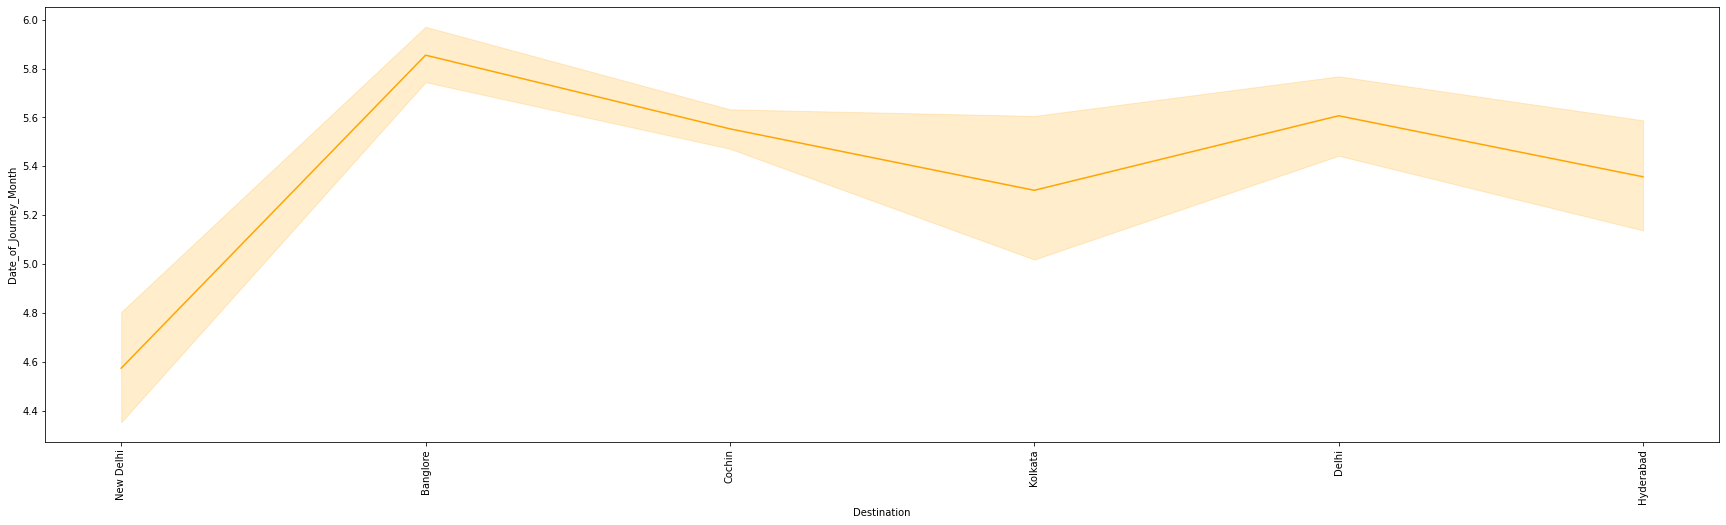


 -------------------------------------Route-------------------------------------


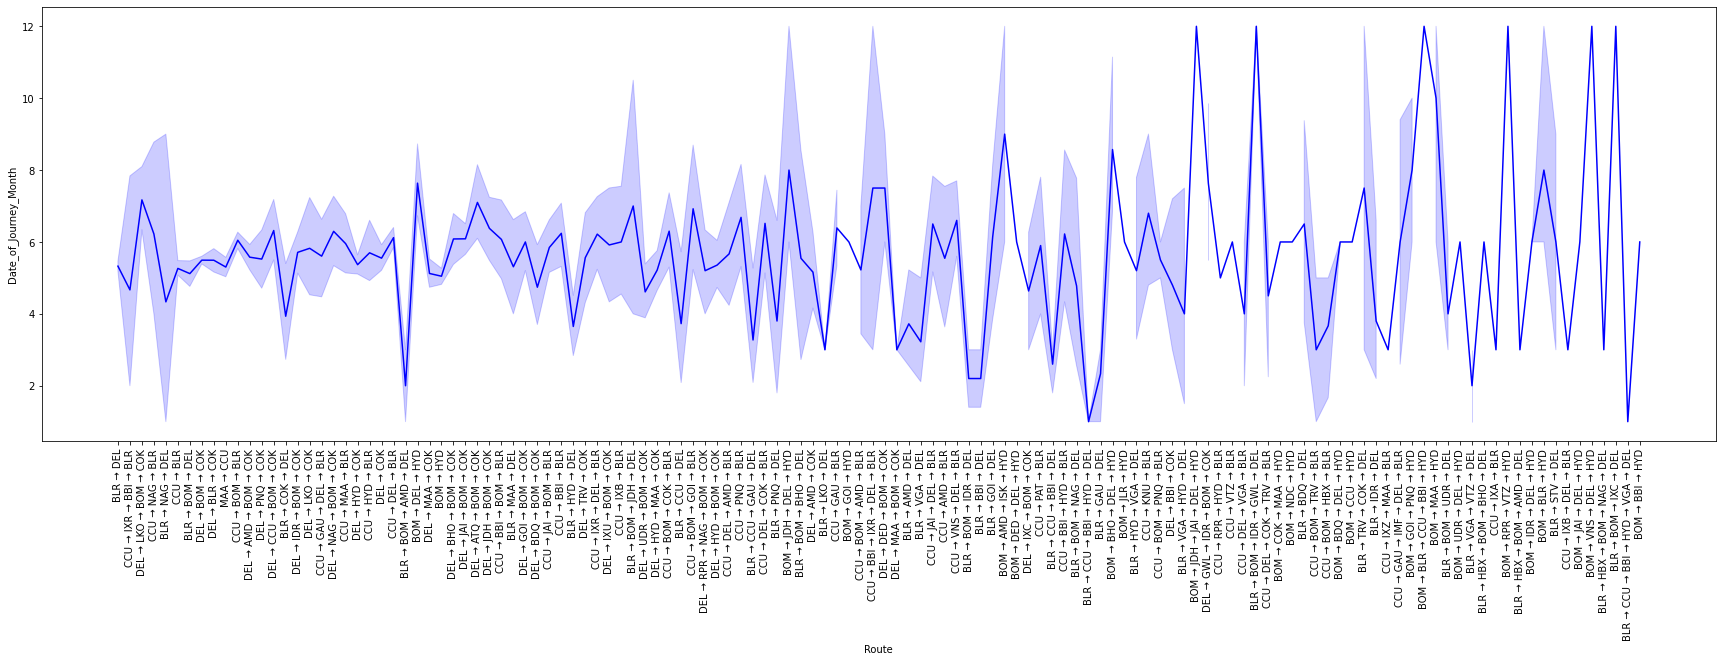


 -------------------------------------Total_Stops-------------------------------------


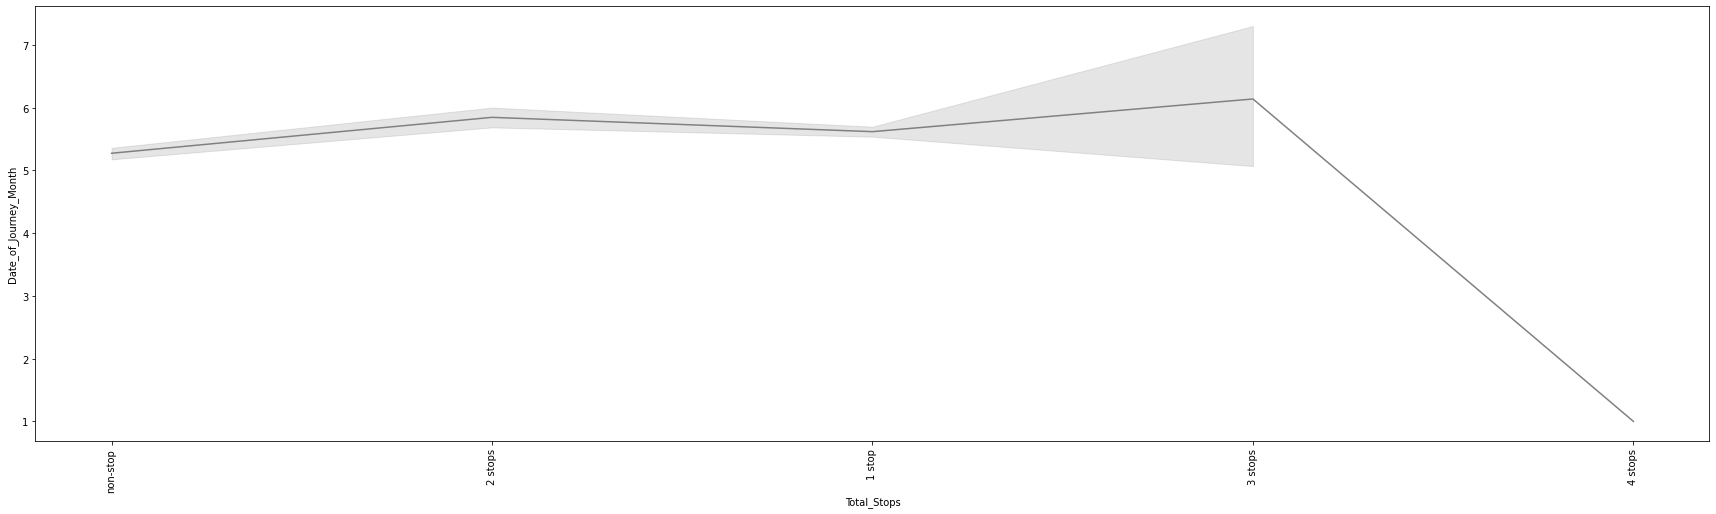


 -------------------------------------Additional_Info-------------------------------------


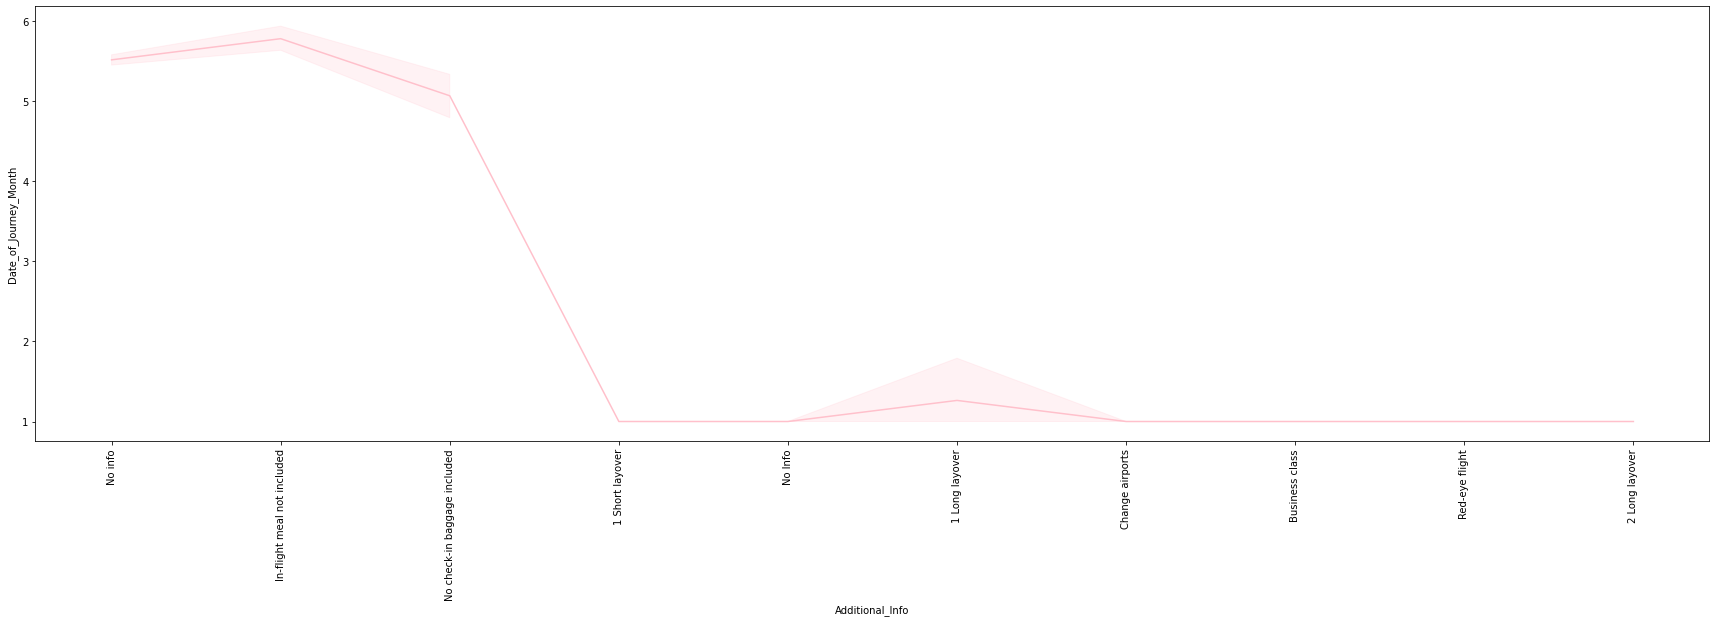

In [67]:
j = ['blue', 'red', 'orange', 'blue', 'grey', 'pink']
for i,j in zip(df_train_object, j):
    print("\n",'-------------------------------------'+i+ '-------------------------------------')
    plt.figure(figsize=(30,8))
    sns.lineplot(x= i ,y = 'Date_of_Journey_Month' ,data=df_train, color = j)
    plt.xticks(rotation = 90)
    plt.show()

### Observations

- Airlines: Jet Airways Business, Vistara premium economy and multiple carriers premium economy are runs more in first months .

    
- Source: Kolkata Source are very high as per dataset.

    
- Destination: Bangalore,  Delhi  Destination are very high as per dataset.

    
- Routes/ Total Stops:  3 are very high in nos in journey 5th to 7th month as per graph.


### Dep_hour


 -------------------------------------Airline-------------------------------------


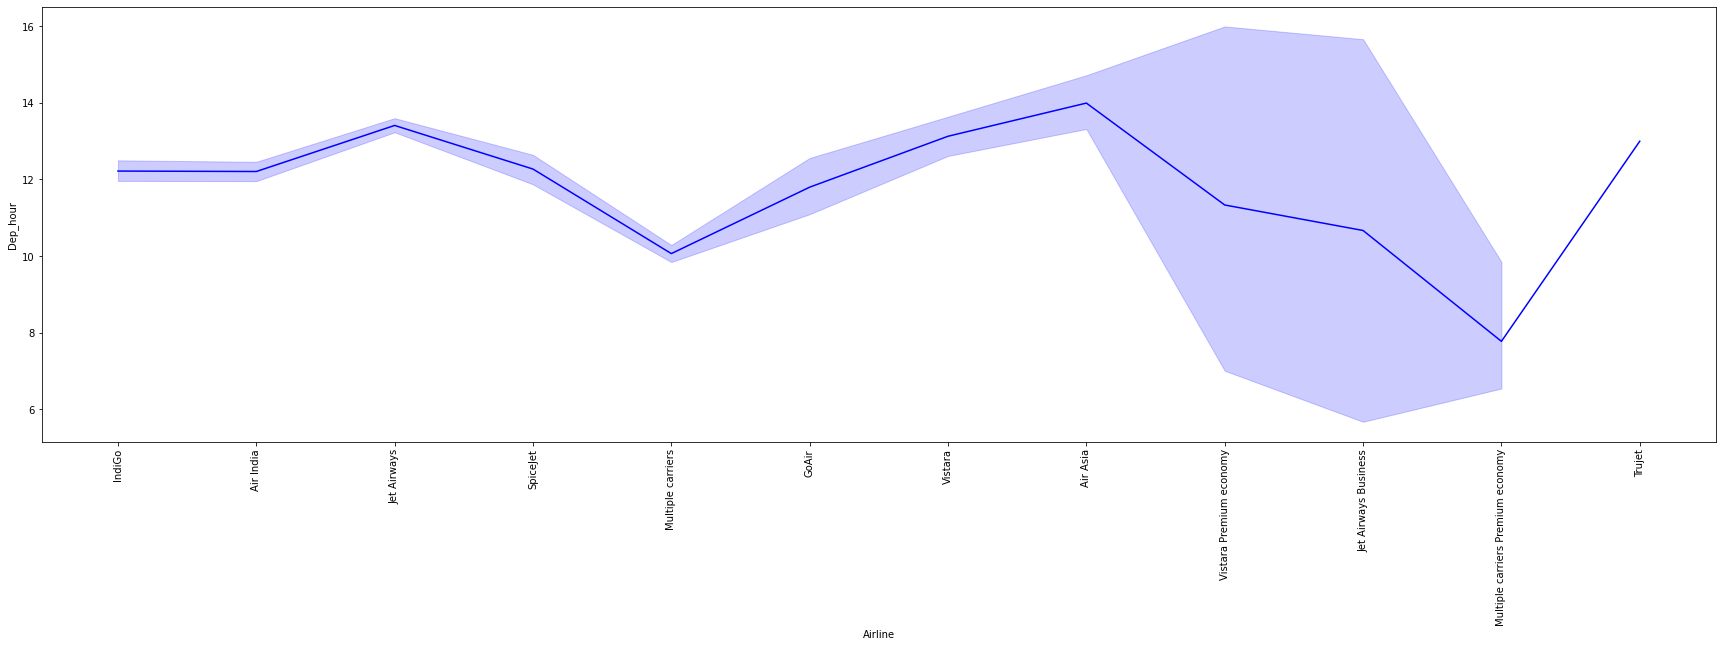


 -------------------------------------Source-------------------------------------


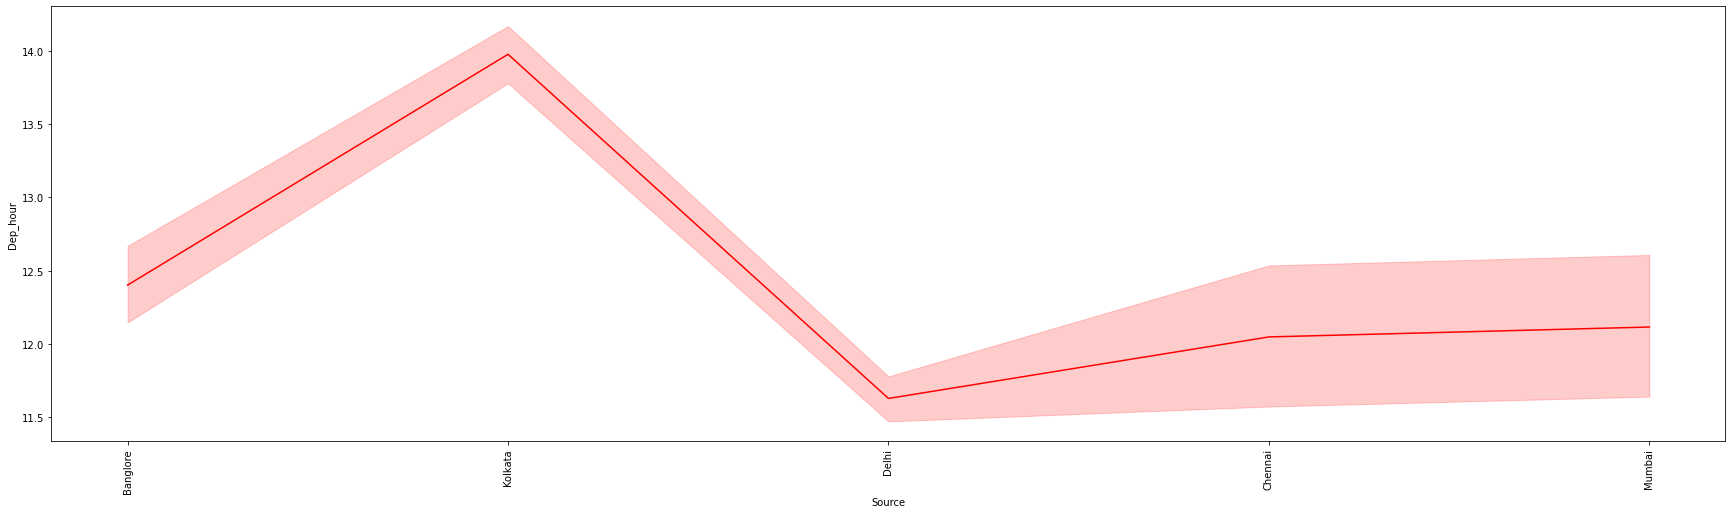


 -------------------------------------Destination-------------------------------------


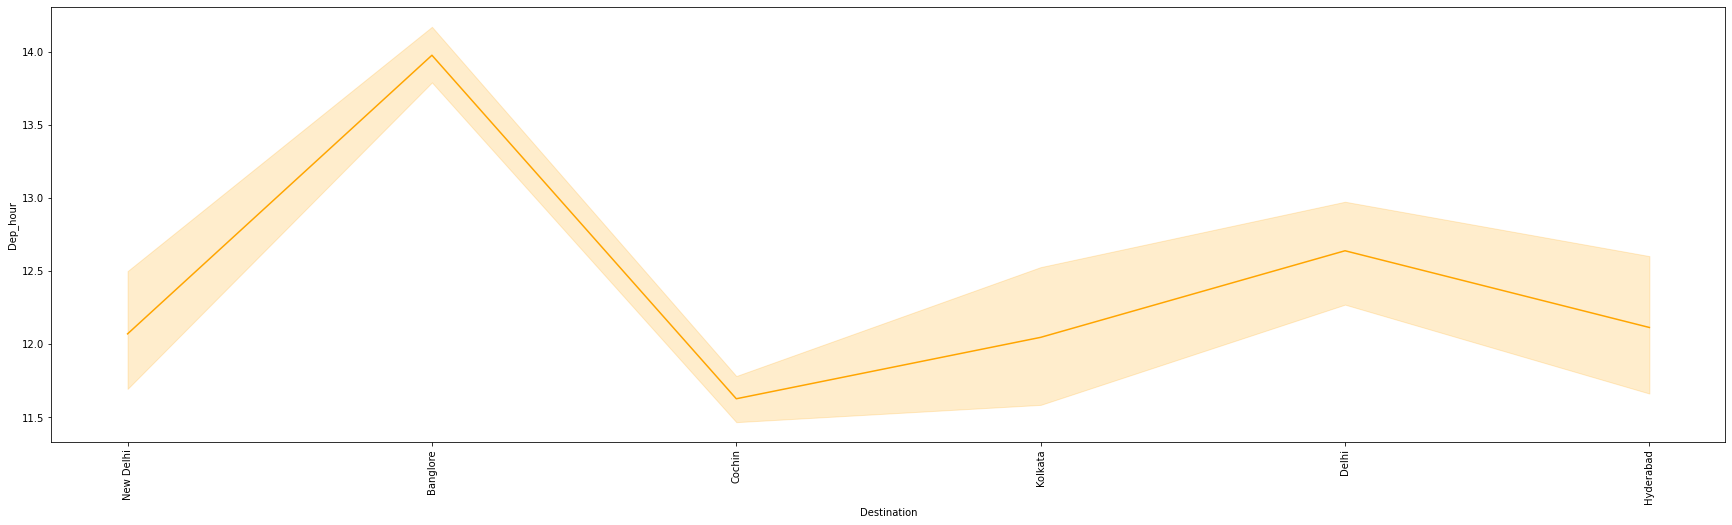


 -------------------------------------Route-------------------------------------


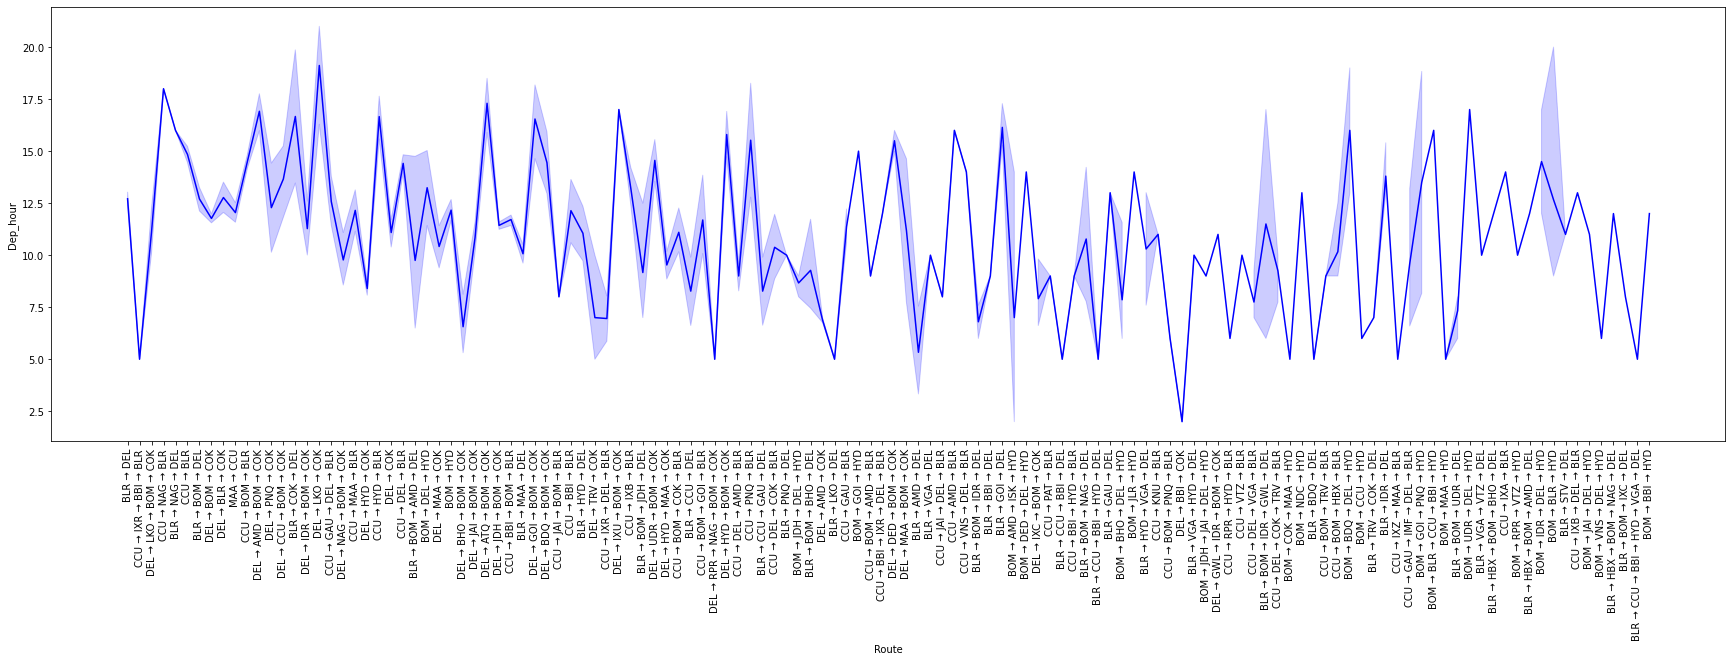


 -------------------------------------Total_Stops-------------------------------------


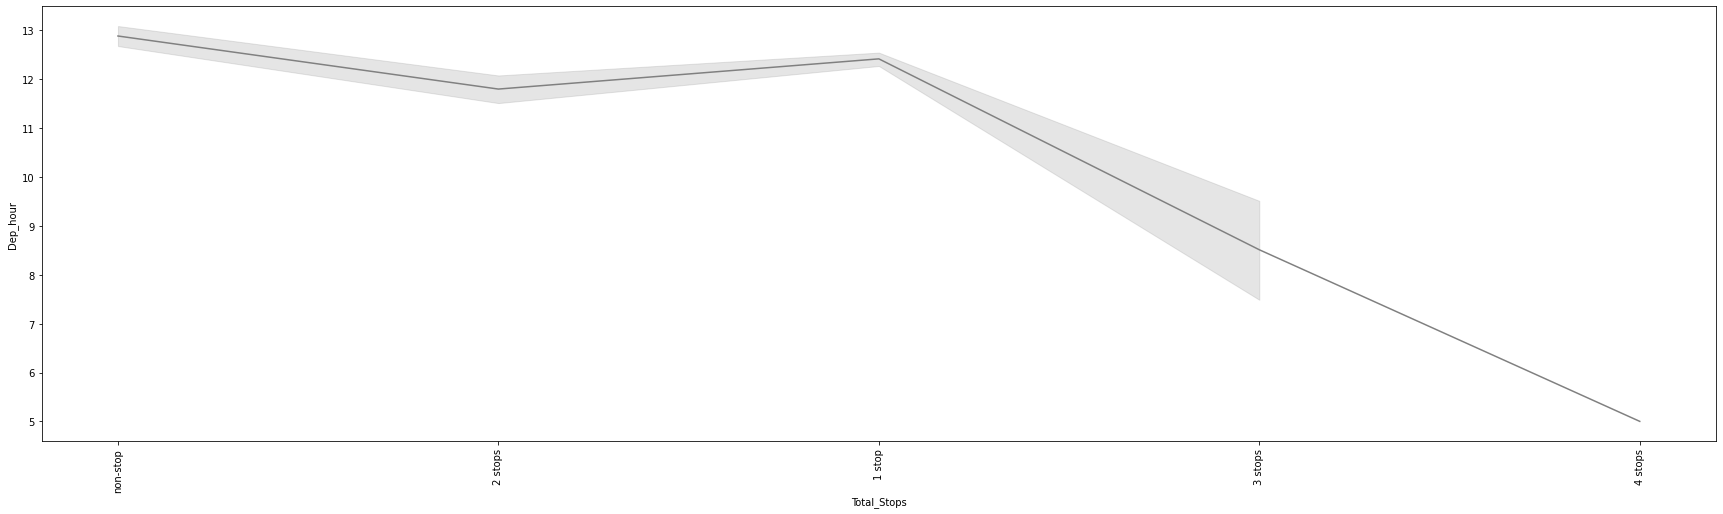


 -------------------------------------Additional_Info-------------------------------------


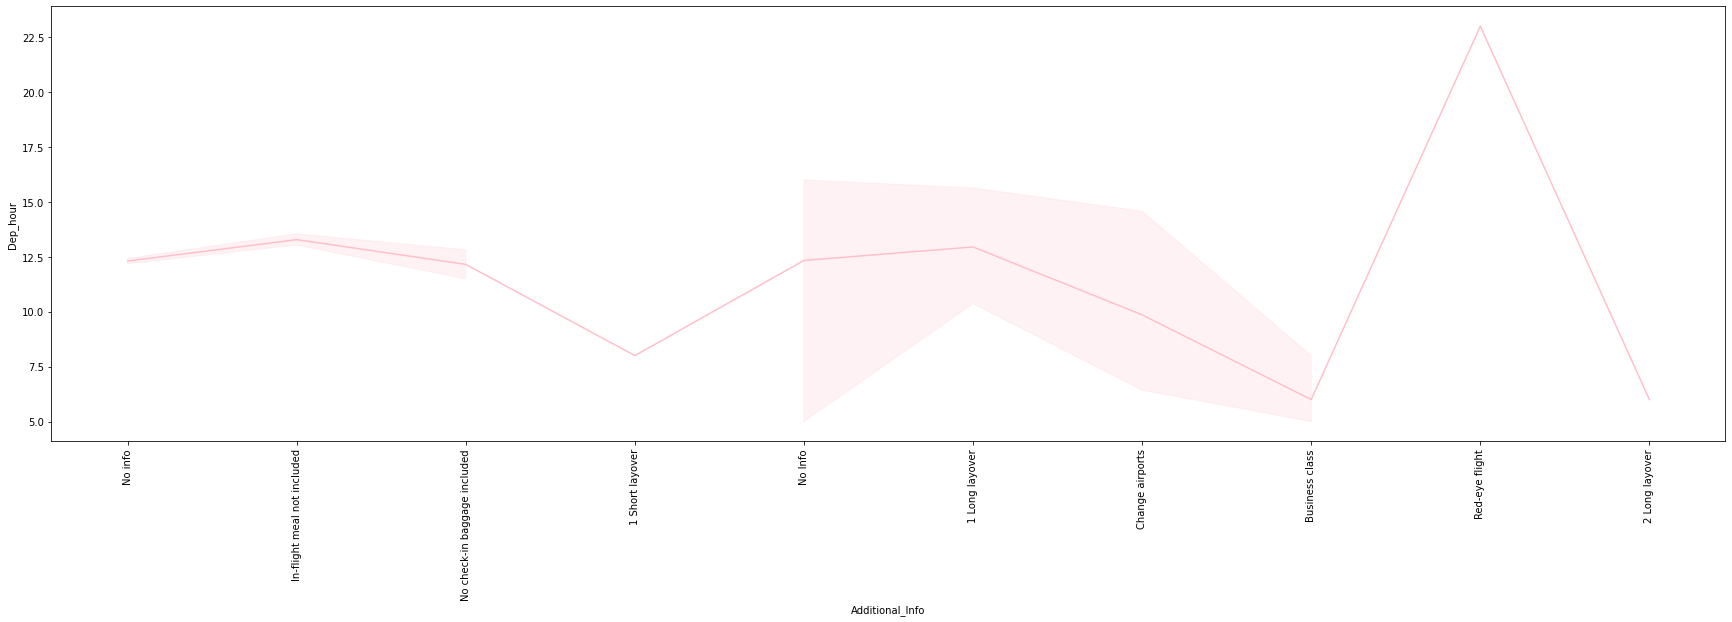

In [68]:
j = ['blue', 'red', 'orange', 'blue', 'grey', 'pink']
for i,j in zip(df_train_object, j):
    print("\n",'-------------------------------------'+i+ '-------------------------------------')
    plt.figure(figsize=(30,8))
    sns.lineplot(x= i ,y = 'Dep_hour' ,data=df_train, color = j)
    plt.xticks(rotation = 90)
    plt.show()

### Observations

- Dep Time hour are more in Kolkata source.


- Dep Time hour are more in Bangalore  destination.


- 4 Stops having lower dep hour.




### Dep_min


 -------------------------------------Airline-------------------------------------


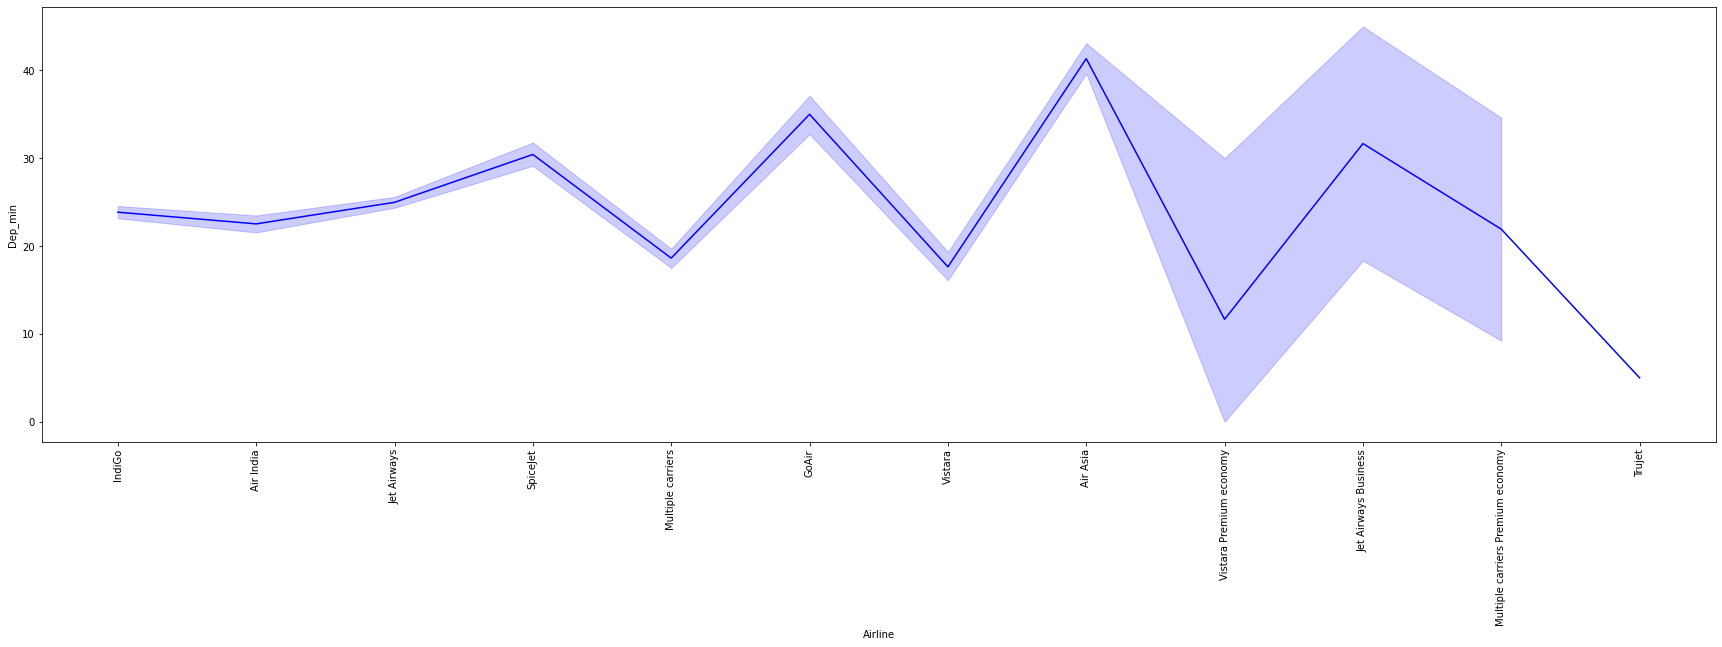


 -------------------------------------Source-------------------------------------


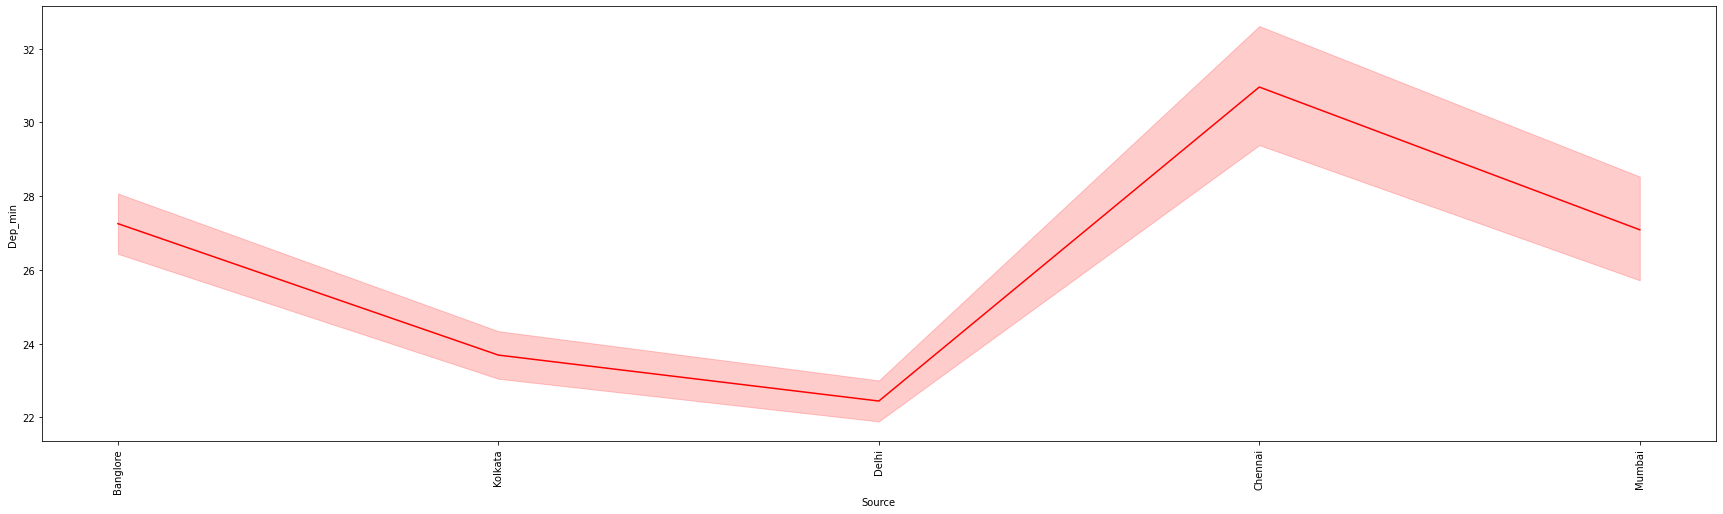


 -------------------------------------Destination-------------------------------------


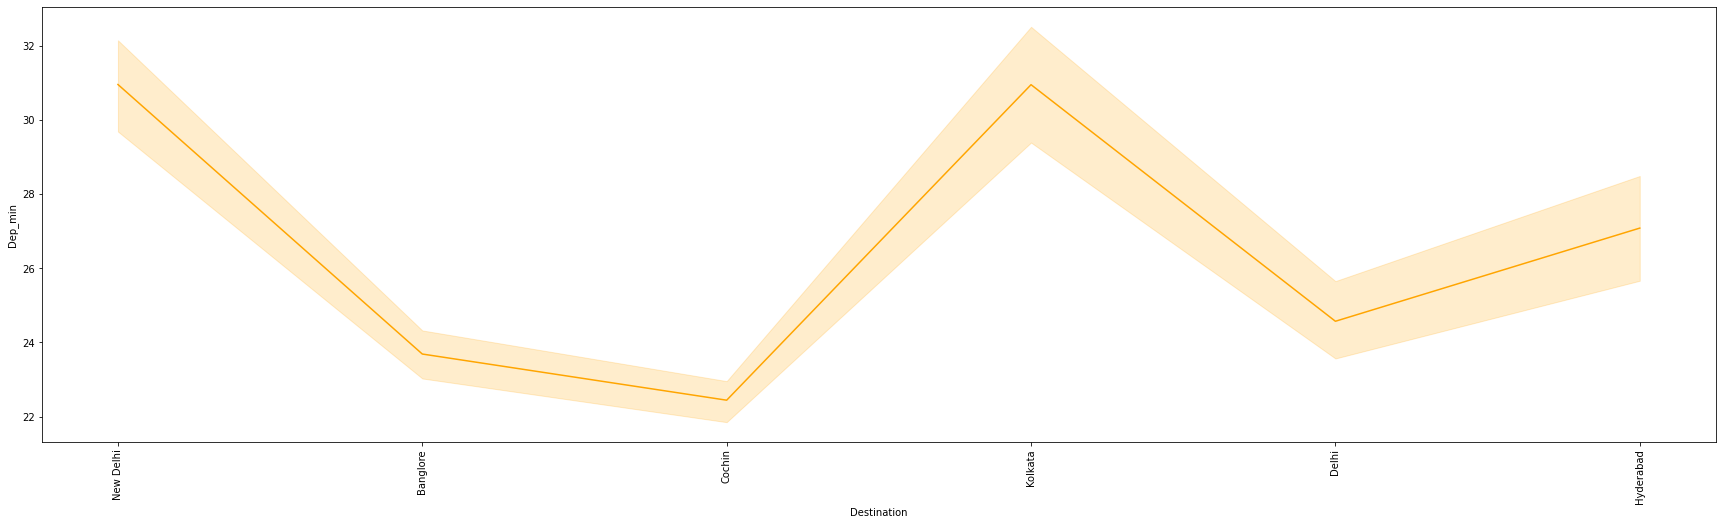


 -------------------------------------Route-------------------------------------


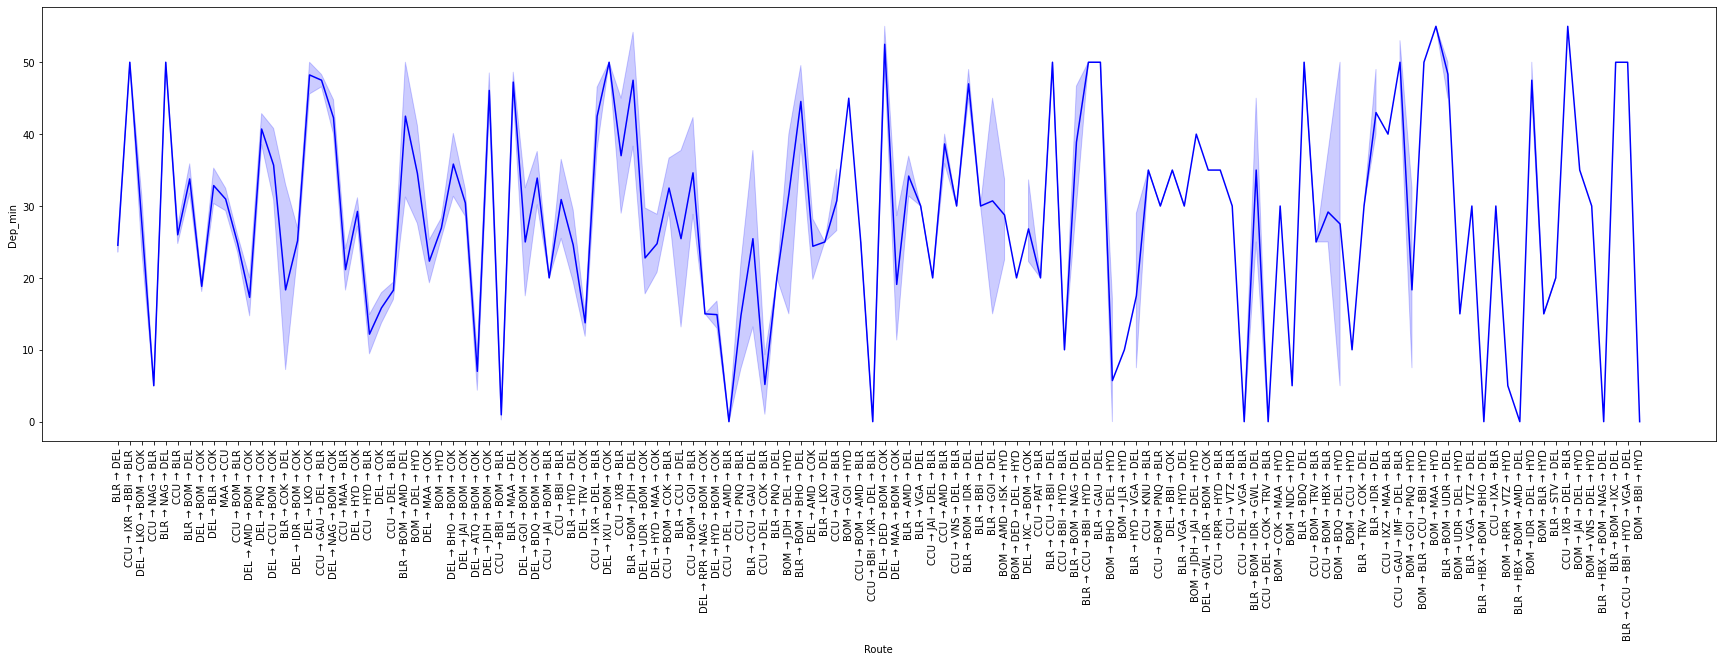


 -------------------------------------Total_Stops-------------------------------------


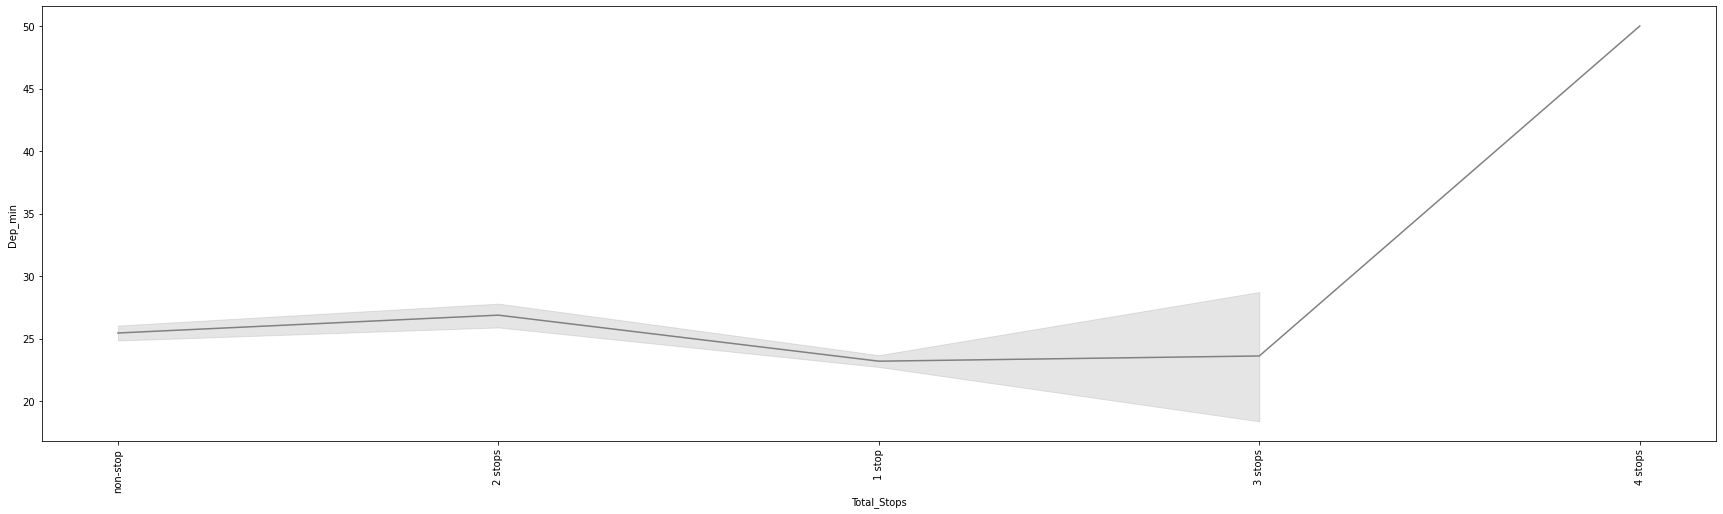


 -------------------------------------Additional_Info-------------------------------------


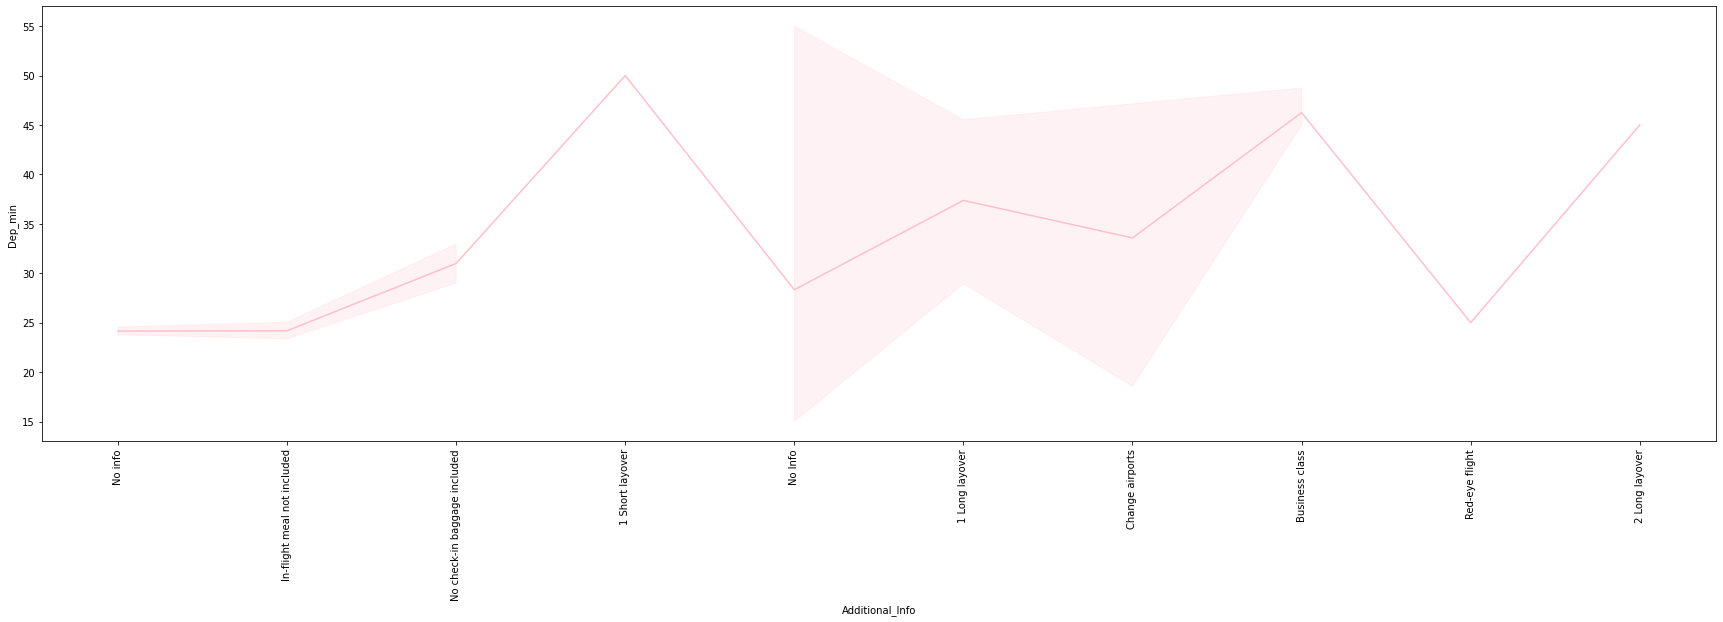

In [69]:
j = ['blue', 'red', 'orange', 'blue', 'grey', 'pink']
for i,j in zip(df_train_object, j):
    print("\n",'-------------------------------------'+i+ '-------------------------------------')
    plt.figure(figsize=(30,8))
    sns.lineplot(x= i ,y = 'Dep_min' ,data=df_train, color = j)
    plt.xticks(rotation = 90)
    plt.show()

### Observations

- Dep Time min are more in Chennai source.


-  Dep Time min are more in New Delhi and Kolkata  destination.


- 4 Stops having higher dep min.




### Arrival_Time_Hour


 -------------------------------------Airline-------------------------------------


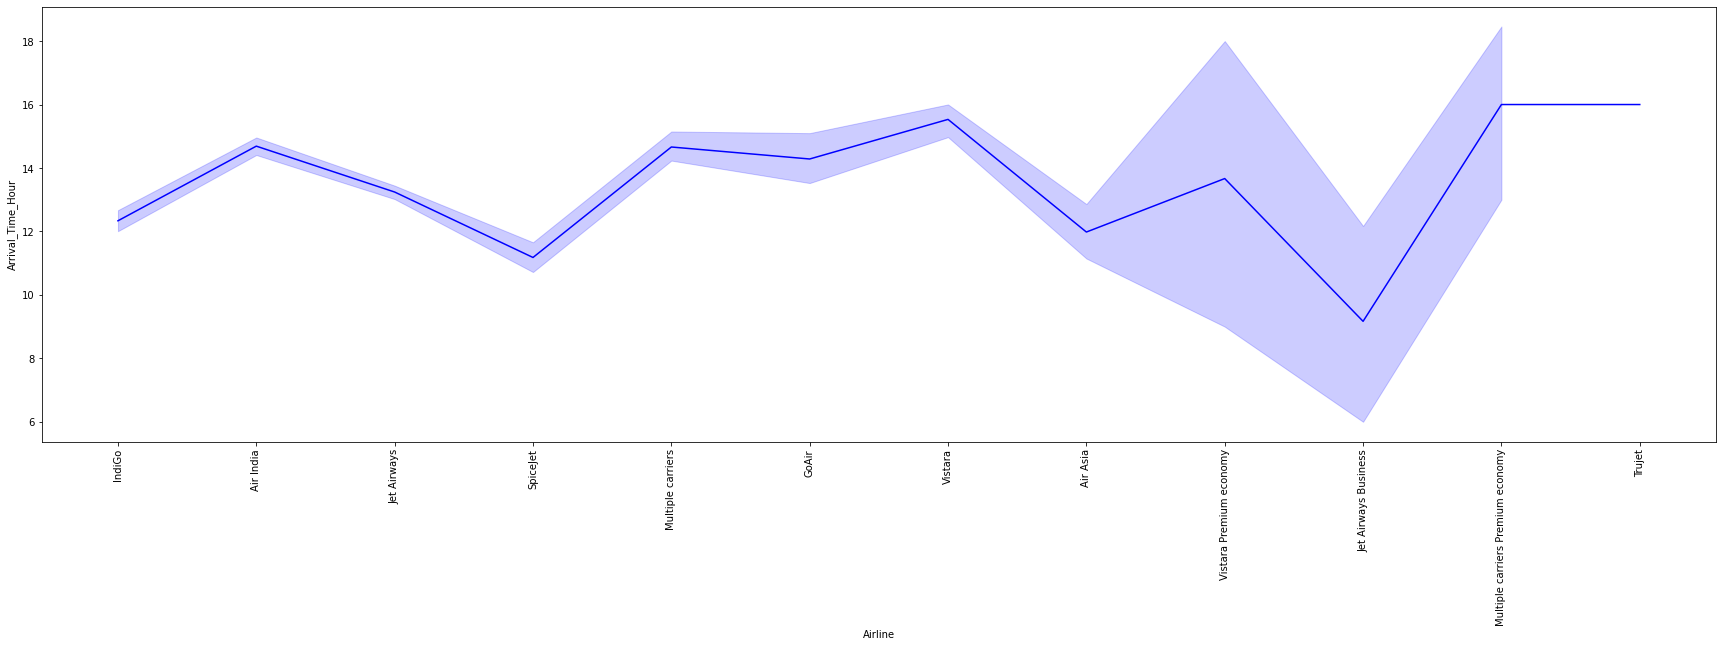


 -------------------------------------Source-------------------------------------


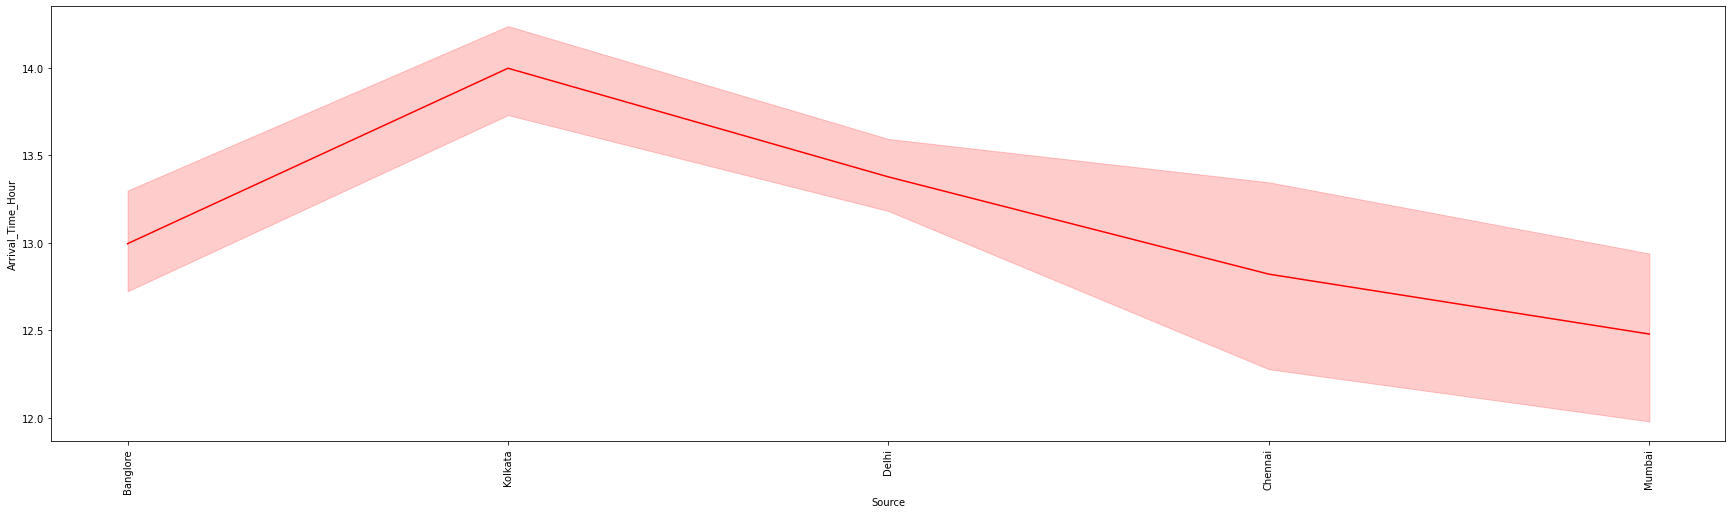


 -------------------------------------Destination-------------------------------------


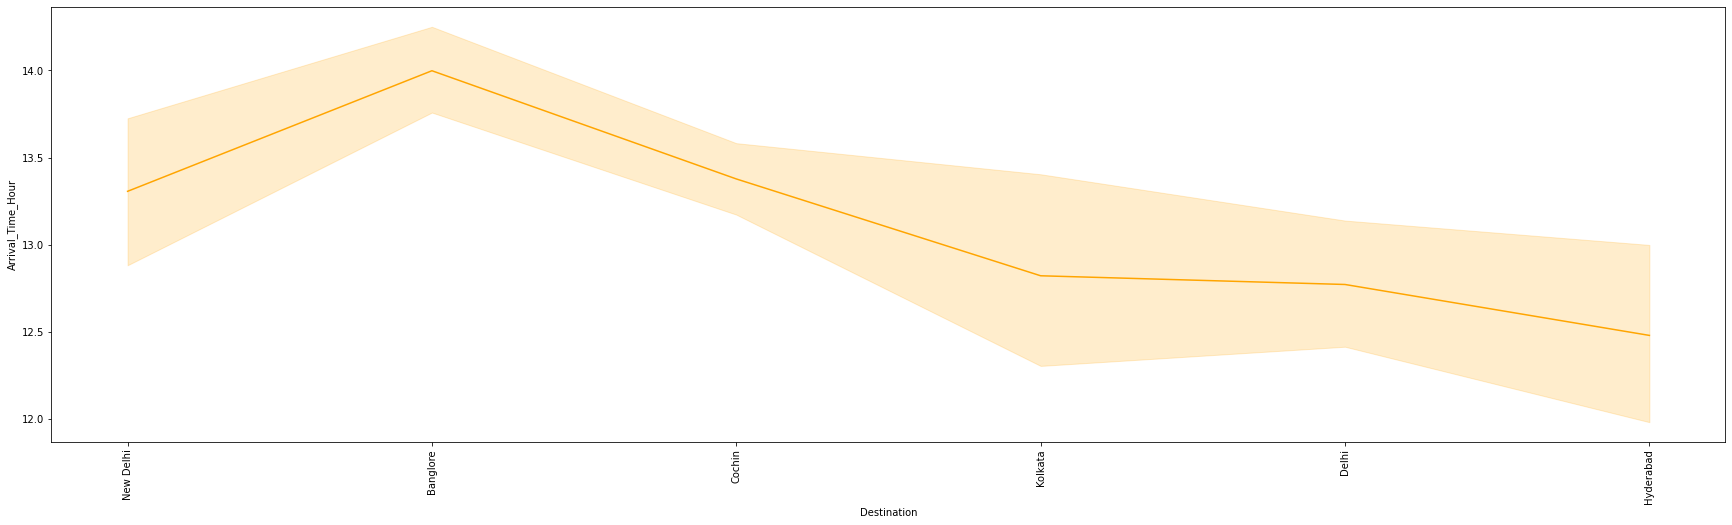


 -------------------------------------Route-------------------------------------


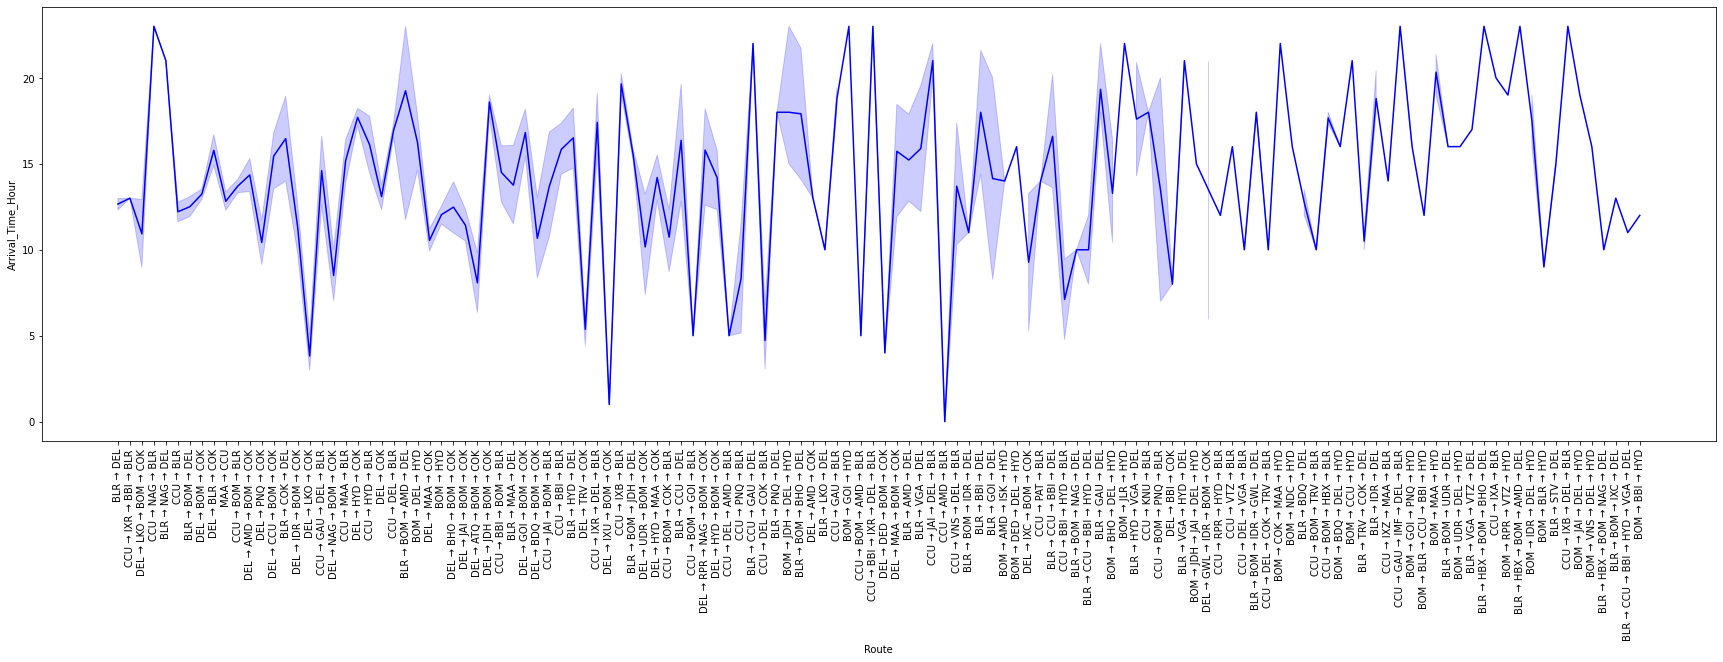


 -------------------------------------Total_Stops-------------------------------------


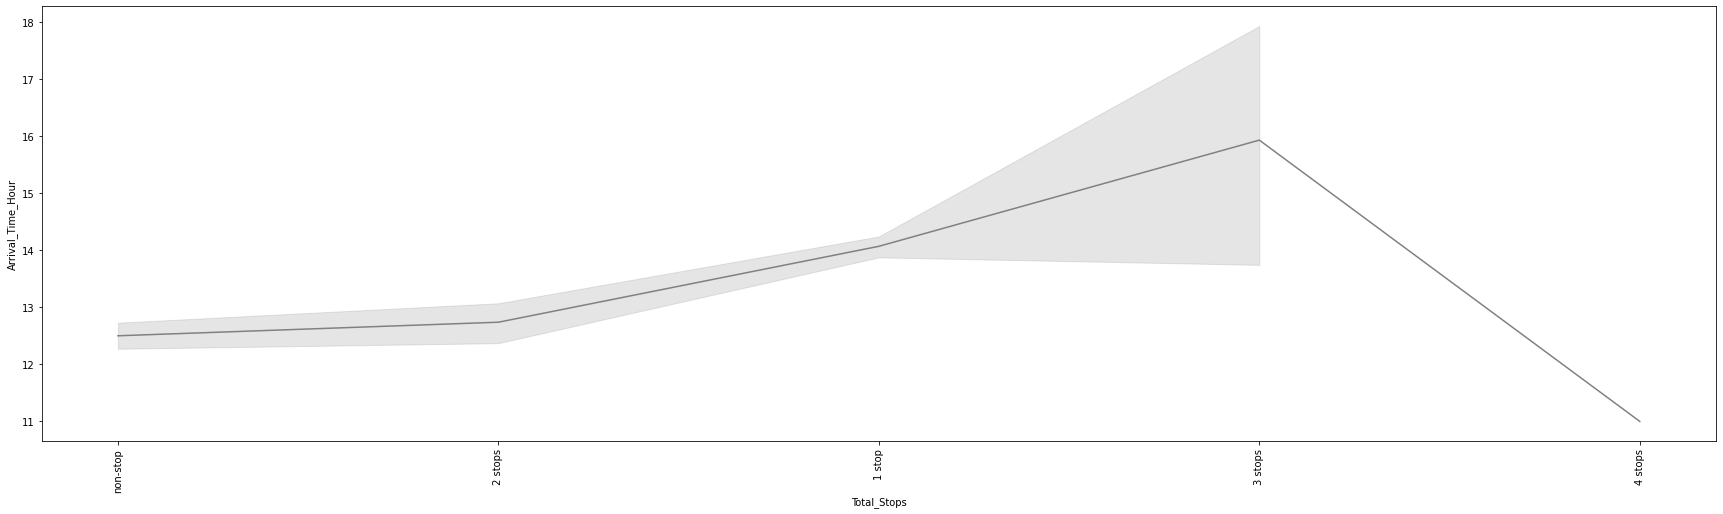


 -------------------------------------Additional_Info-------------------------------------


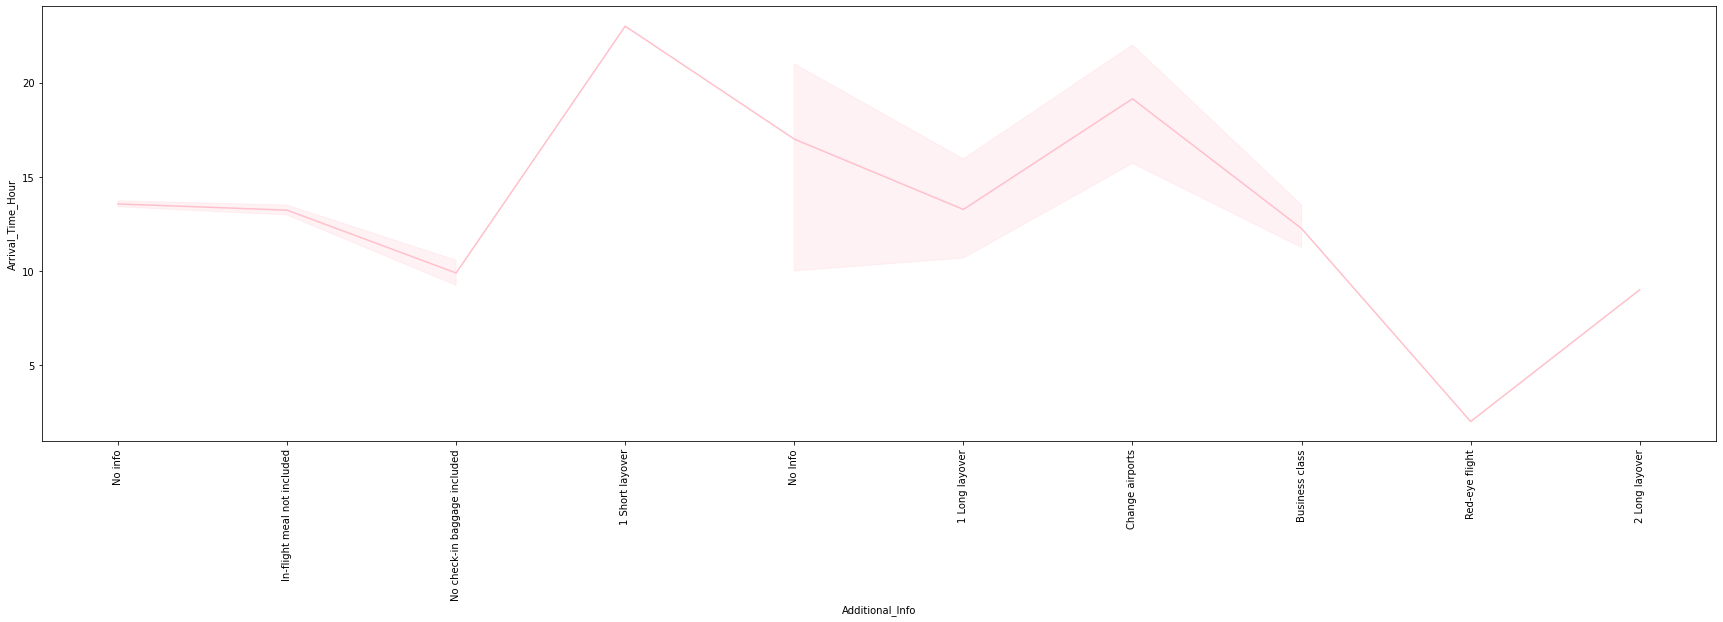

In [70]:
j = ['blue', 'red', 'orange', 'blue', 'grey', 'pink']
for i,j in zip(df_train_object, j):
    print("\n",'-------------------------------------'+i+ '-------------------------------------')
    plt.figure(figsize=(30,8))
    sns.lineplot(x= i ,y = 'Arrival_Time_Hour' ,data=df_train, color = j)
    plt.xticks(rotation = 90)
    plt.show()

### Observations

- Arrival Time hour are more in Kolkata source.


-  Arrival Time hour are more in Bangalore  destination.


- 4 Stops having lower arrival travel hour.



### Arrival_Time_Minute


 -------------------------------------Airline-------------------------------------


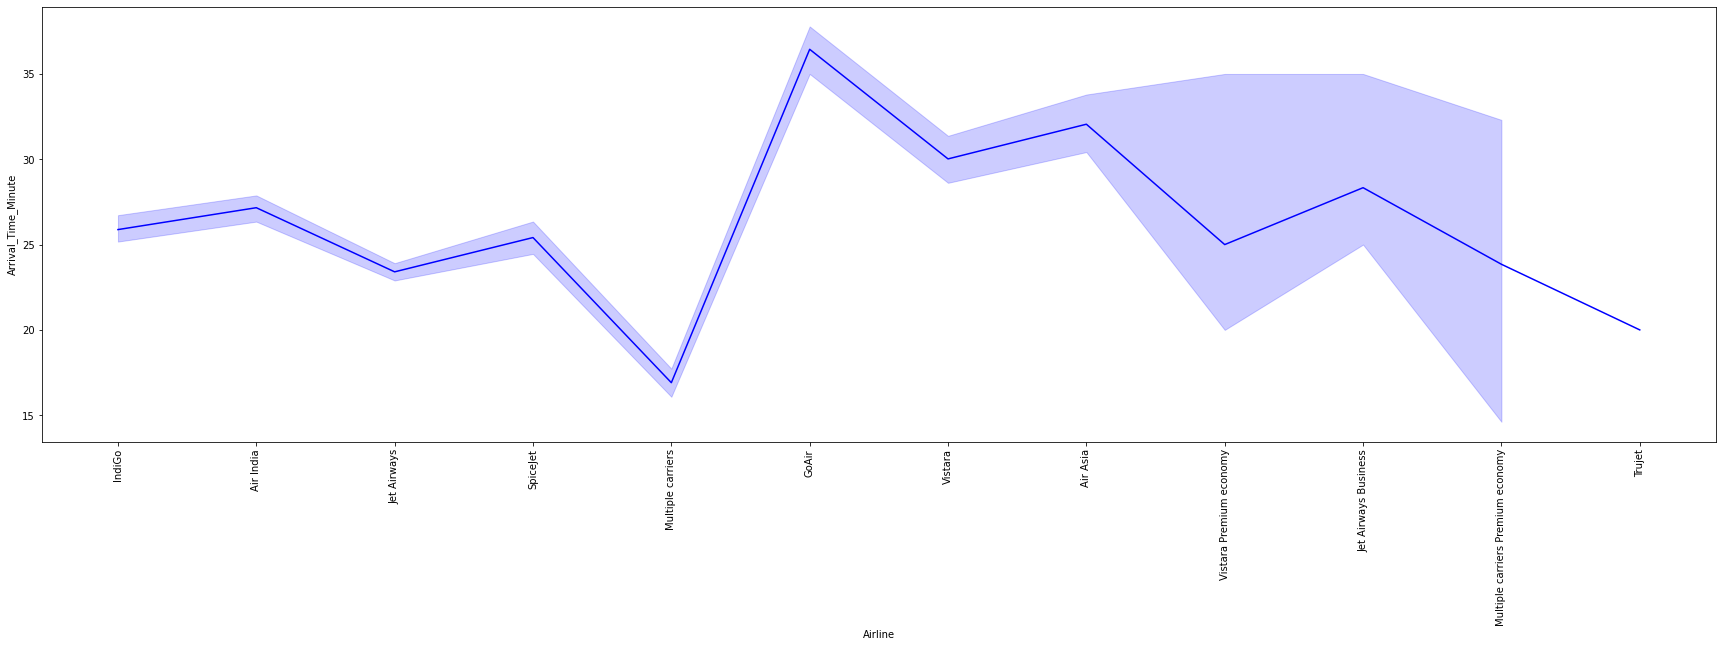


 -------------------------------------Source-------------------------------------


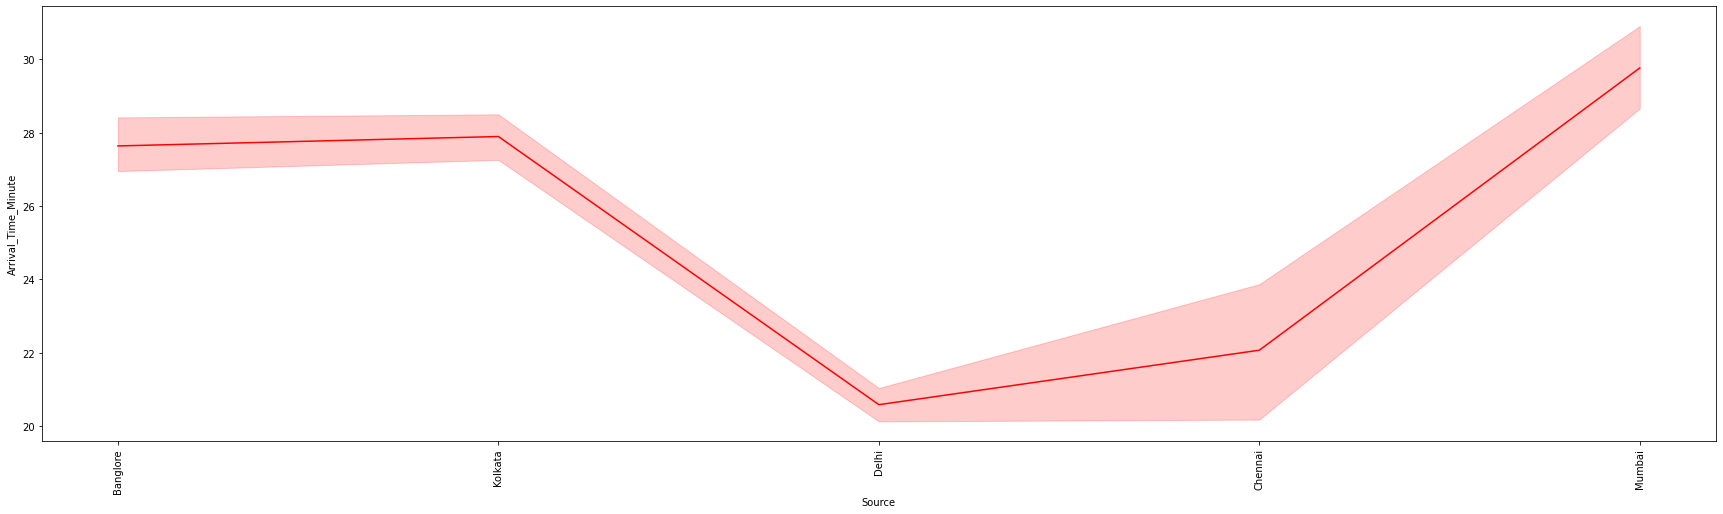


 -------------------------------------Destination-------------------------------------


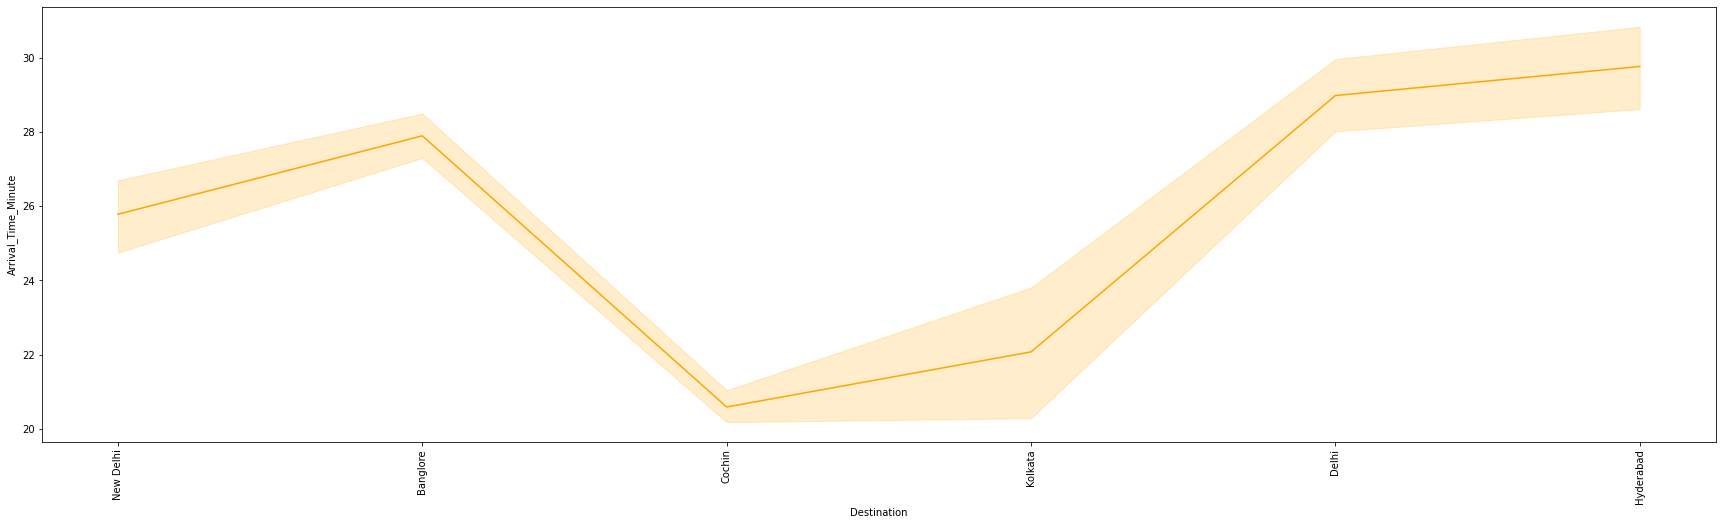


 -------------------------------------Route-------------------------------------


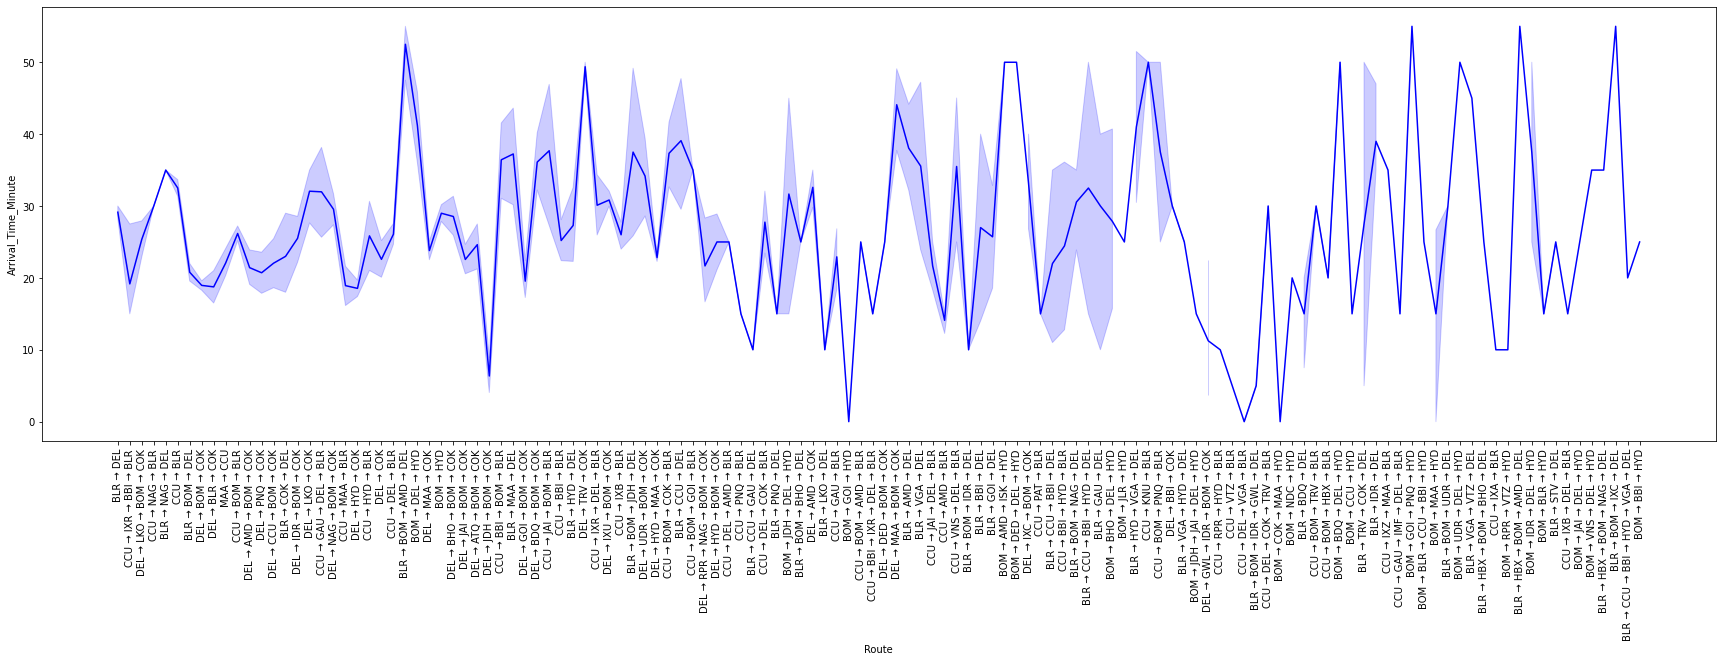


 -------------------------------------Total_Stops-------------------------------------


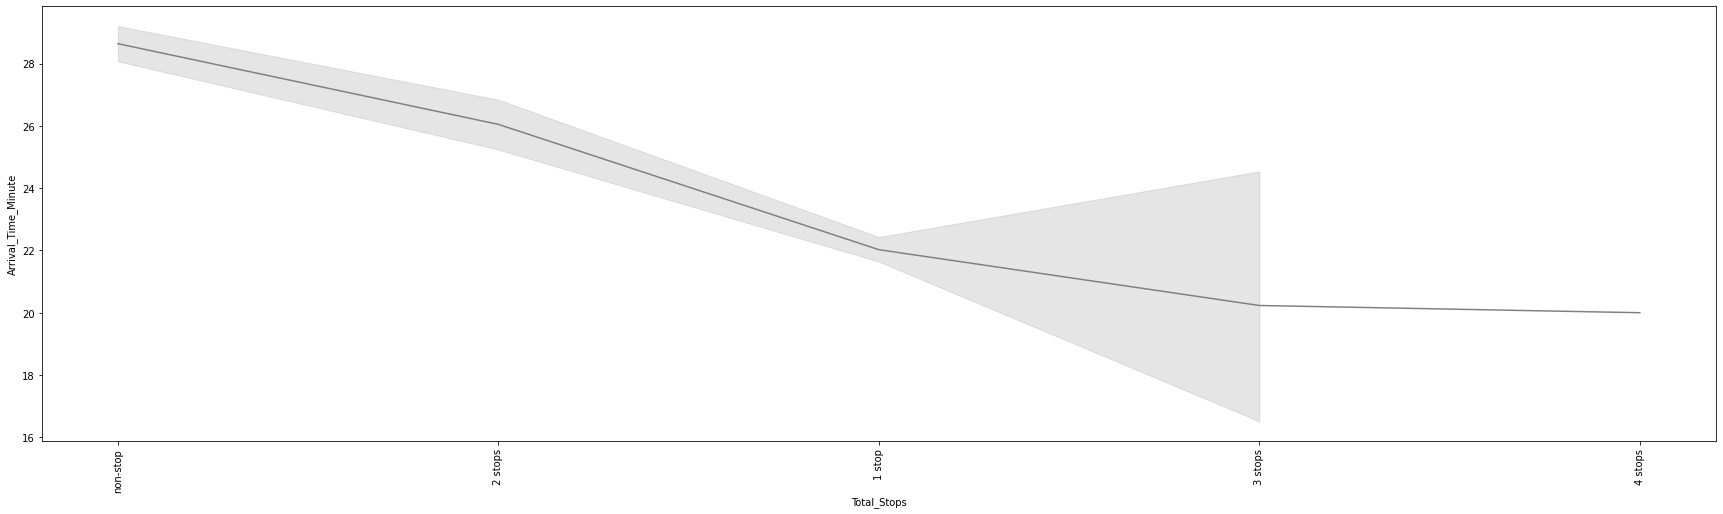


 -------------------------------------Additional_Info-------------------------------------


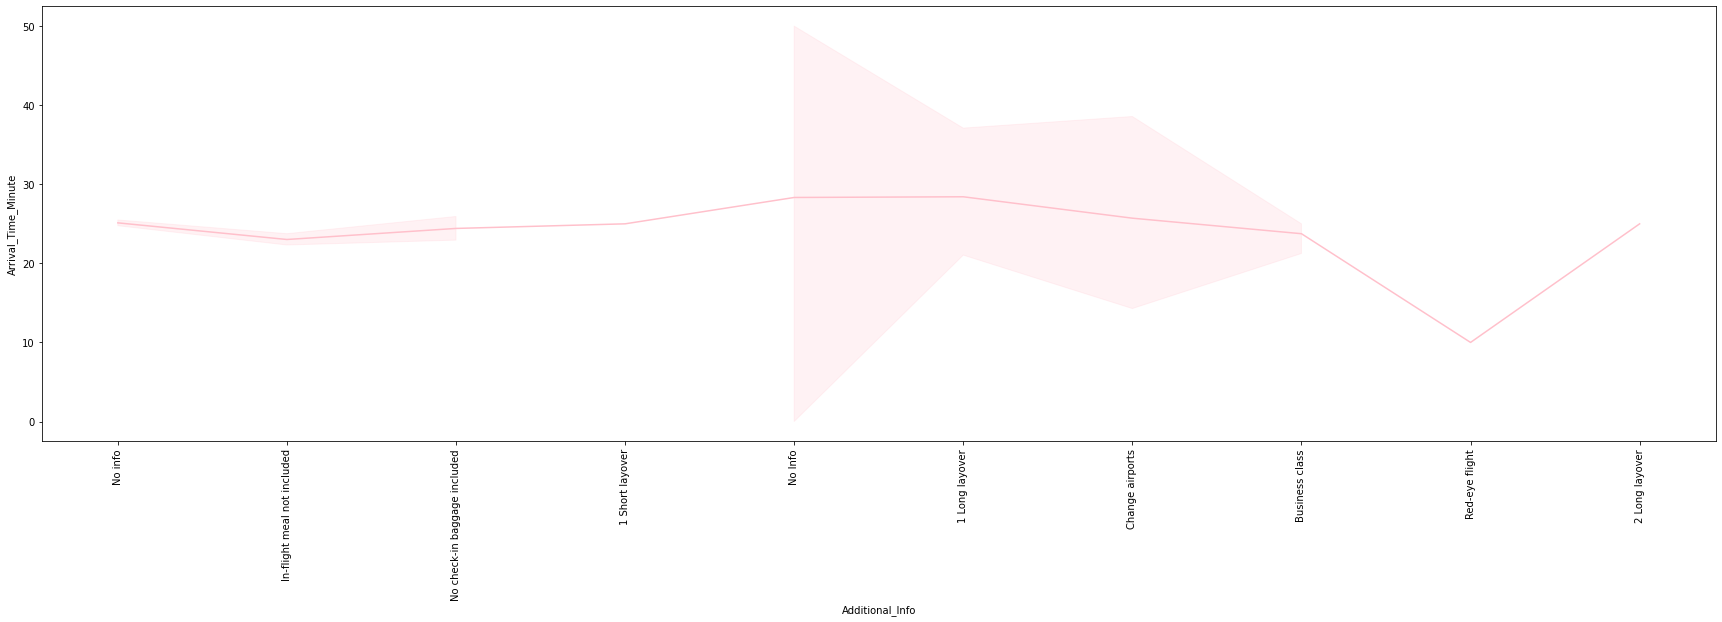

In [71]:
j = ['blue', 'red', 'orange', 'blue', 'grey', 'pink']
for i,j in zip(df_train_object, j):
    print("\n",'-------------------------------------'+i+ '-------------------------------------')
    plt.figure(figsize=(30,8))
    sns.lineplot(x= i ,y = 'Arrival_Time_Minute' ,data=df_train, color = j)
    plt.xticks(rotation = 90)
    plt.show()

### Observations

-  Arrival Time min are more in GoAir airlines.


-  Arrival Time min are very less  in Delhi, Chennai  source.


-  Arrival Time min are very less  in Cochin, Kolkata  destination.


- No Stops having higher arrival travel time min.



### From above all analysis we find that Route shows the number of stops and Total_Stops shows same details hence we can drop Route. Also it having 128 unique values.

In [58]:
df_train.drop(['Route'], axis = 1, inplace = True)
df_test.drop(['Route'], axis = 1, inplace = True)

#### Category Plot


 -------------------------------------Airline-------------------------------------


<Figure size 720x576 with 0 Axes>

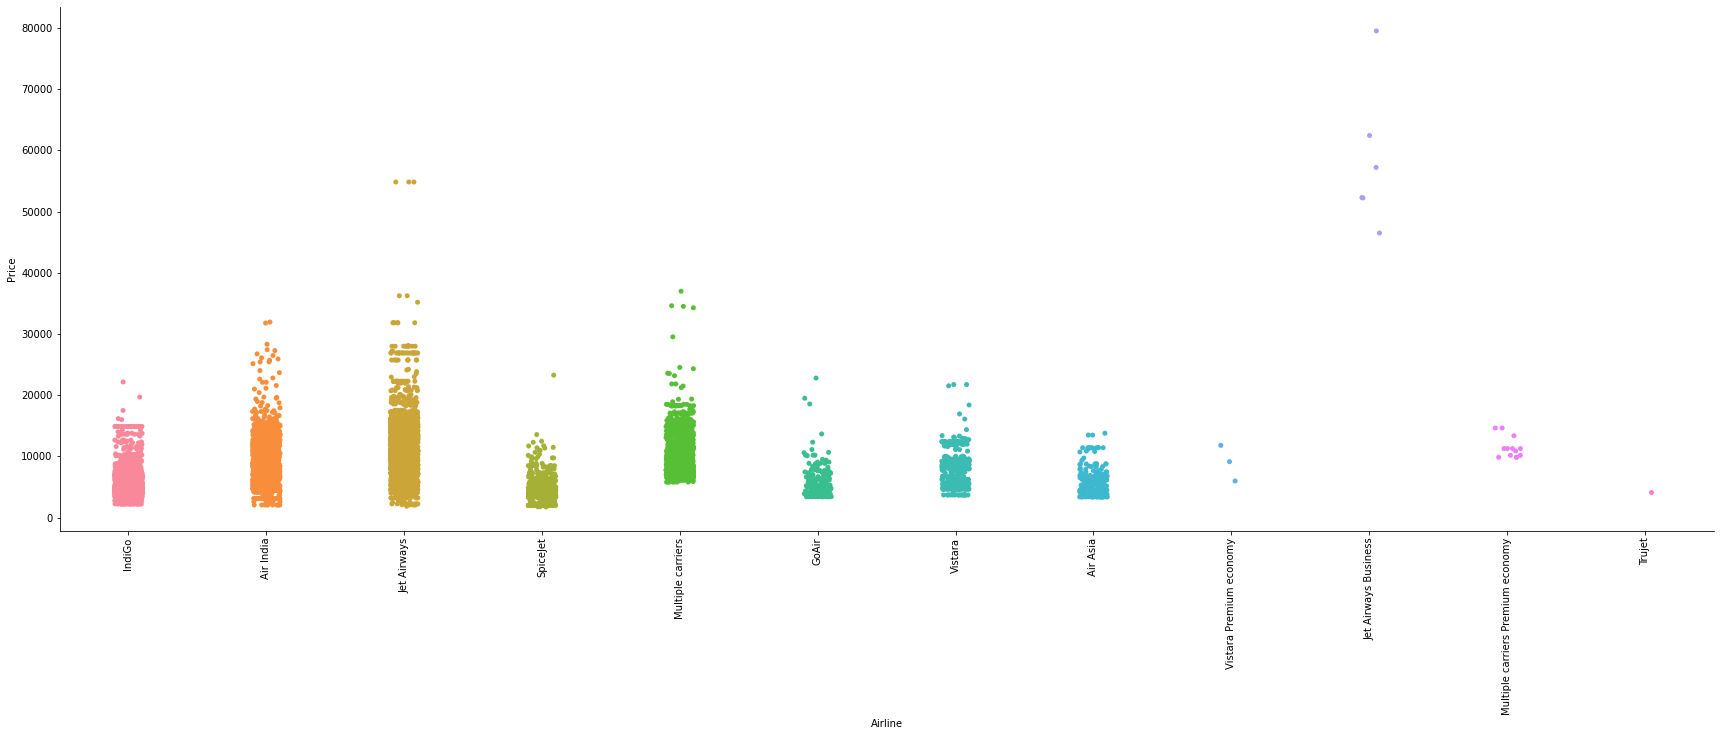


 -------------------------------------Source-------------------------------------


<Figure size 720x576 with 0 Axes>

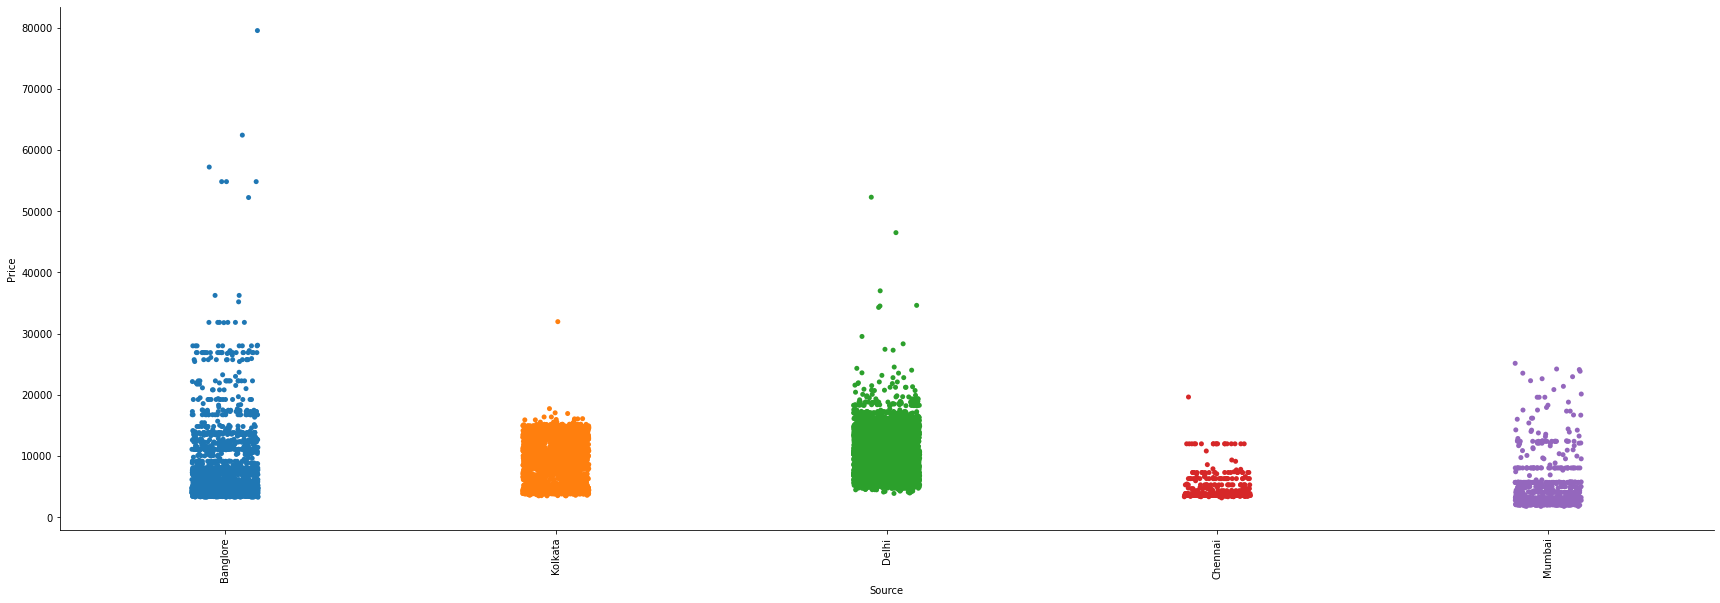


 -------------------------------------Destination-------------------------------------


<Figure size 720x576 with 0 Axes>

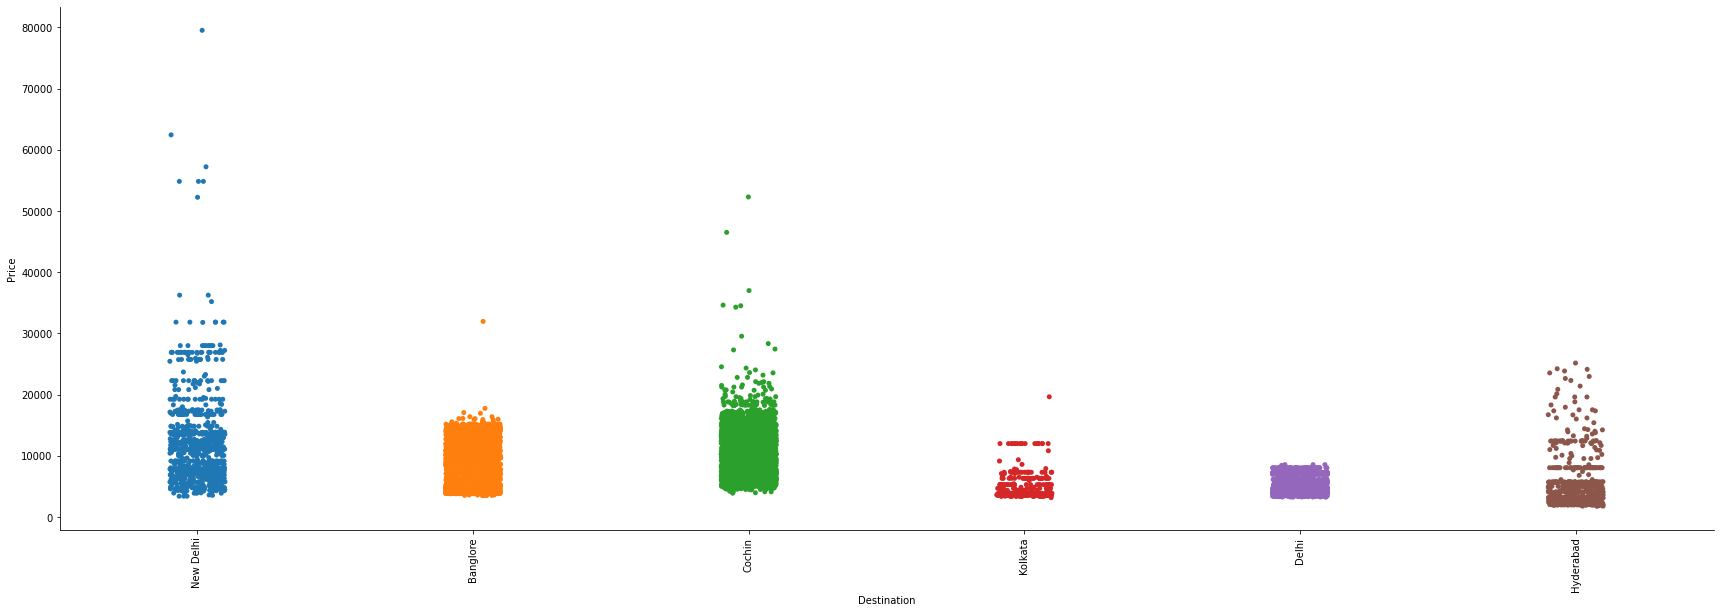


 -------------------------------------Total_Stops-------------------------------------


<Figure size 720x576 with 0 Axes>

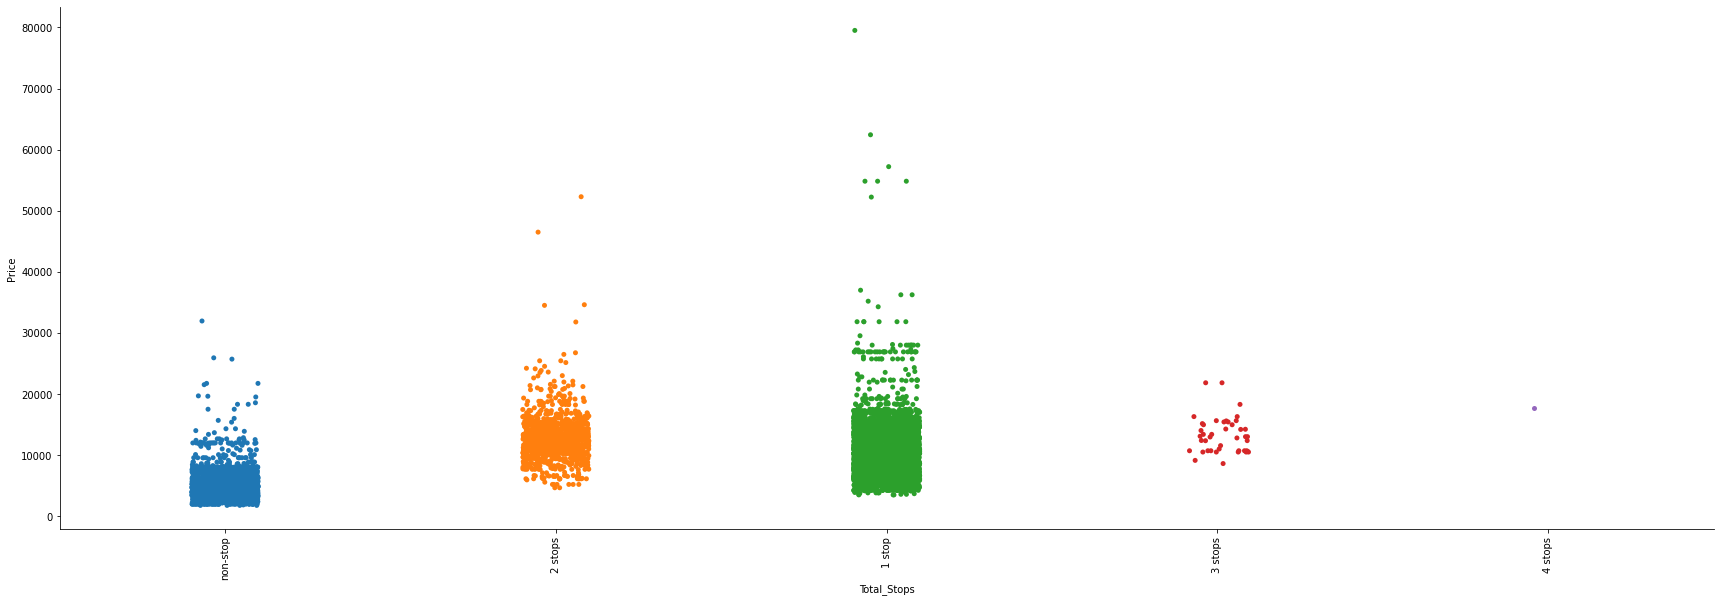


 -------------------------------------Additional_Info-------------------------------------


<Figure size 720x576 with 0 Axes>

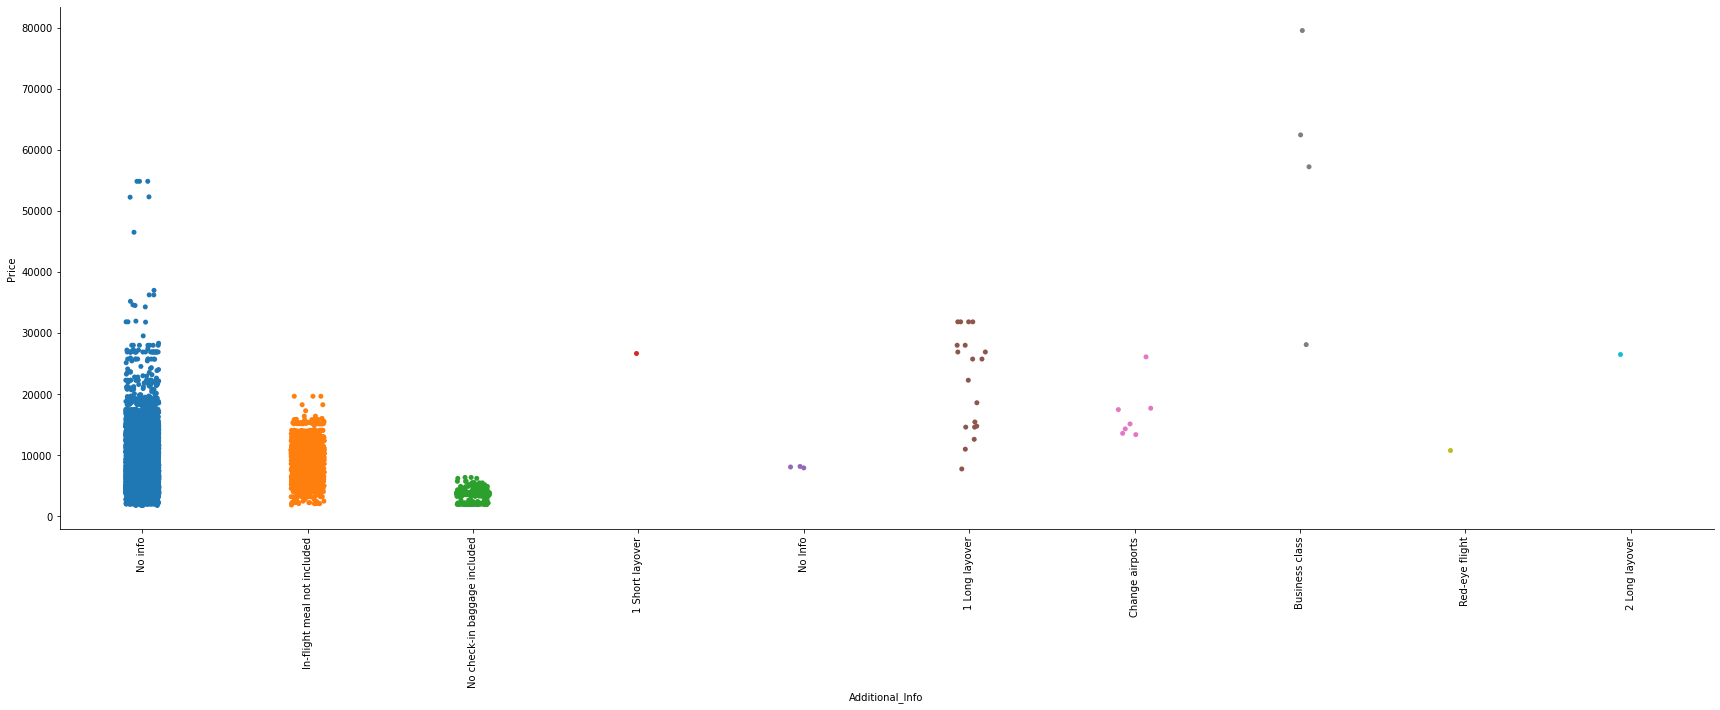

In [59]:
for i in df_train.select_dtypes(exclude = ['float', 'int']).columns:
    print("\n",'-------------------------------------'+i+ '-------------------------------------')
    plt.figure(figsize=(10,8))
    sns.catplot(x= i, y = 'Price' ,data = df_train, height = 8, aspect = 3)
    plt.xticks(rotation = 90)
    plt.show()

### Observations

- Jet Airways are very high in numbers.

- Bangaluru and Delhi having high source counts.

- Destination are of New Delhi as per graph

- 1 Stop are very high in no..

### Bivariate Analysis

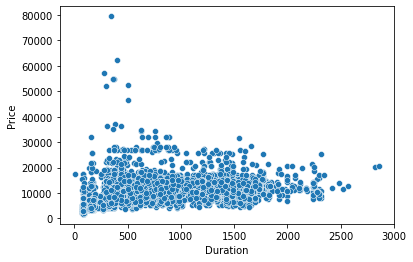

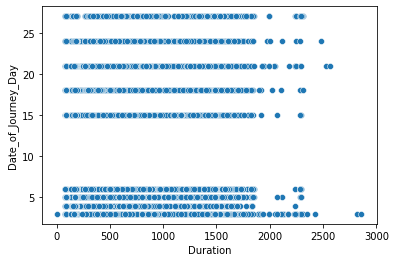

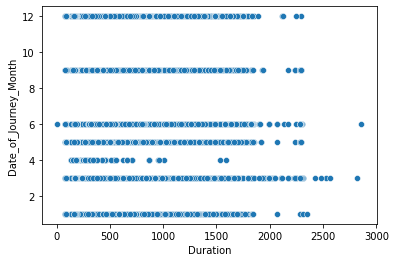

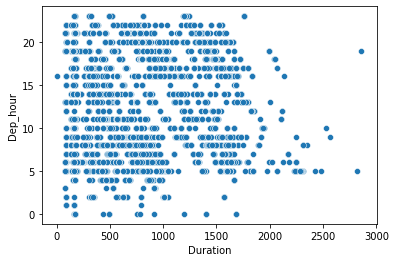

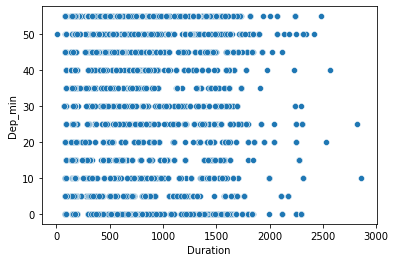

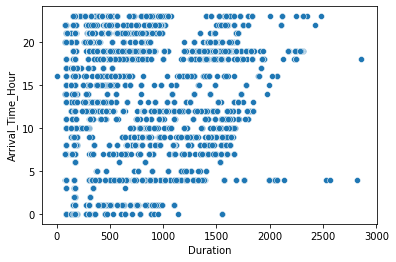

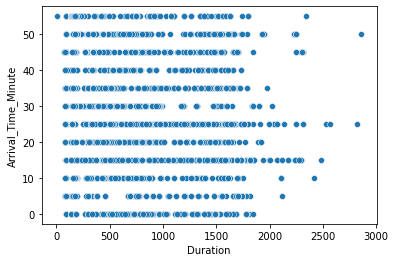

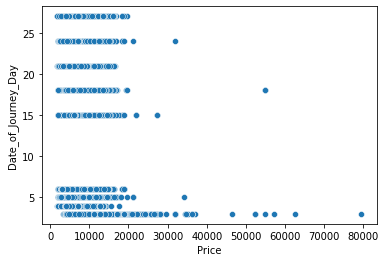

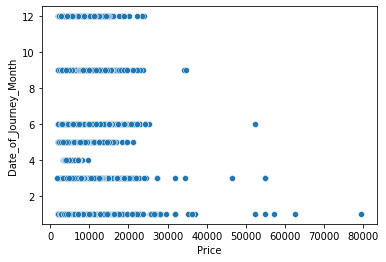

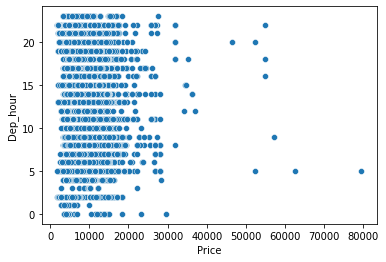

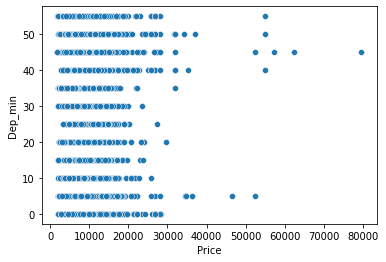

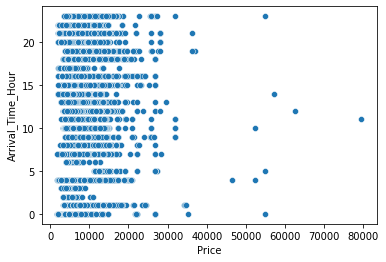

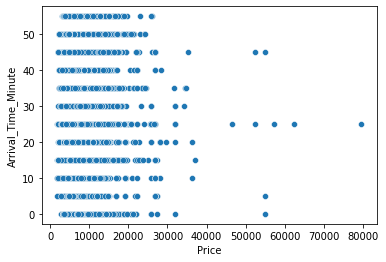

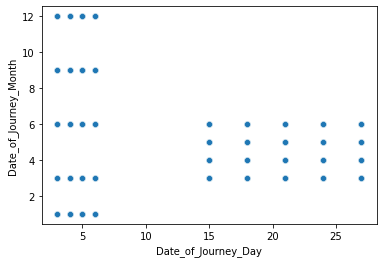

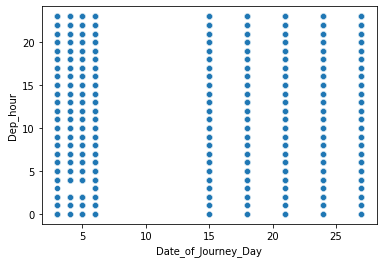

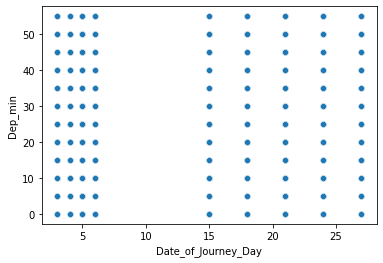

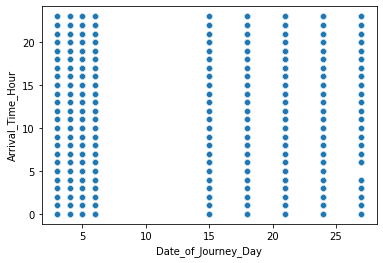

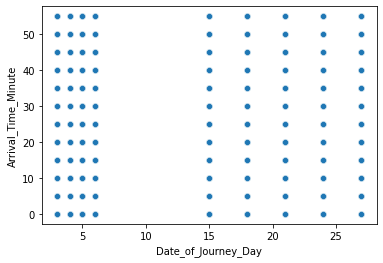

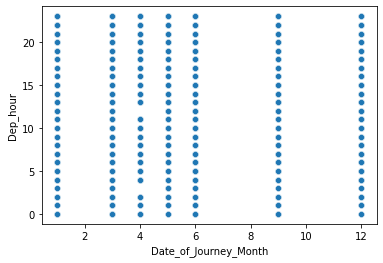

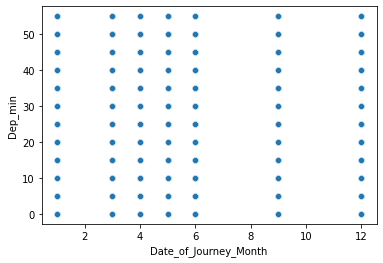

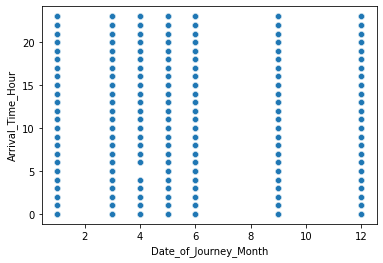

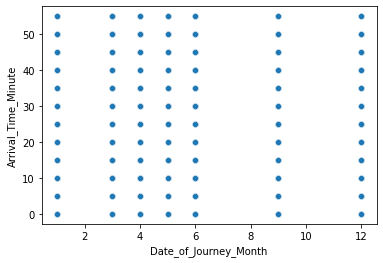

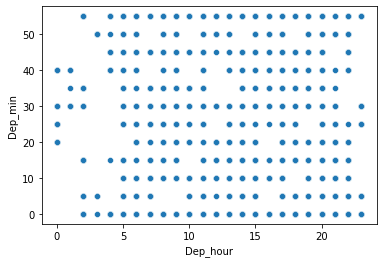

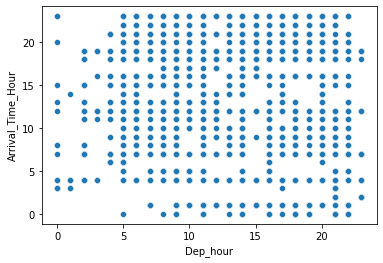

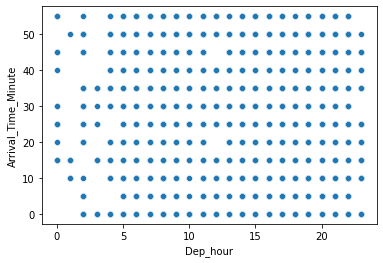

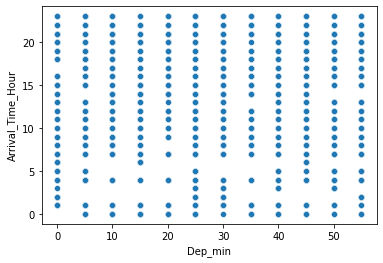

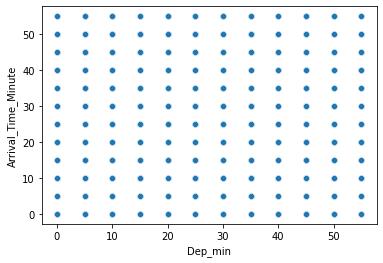

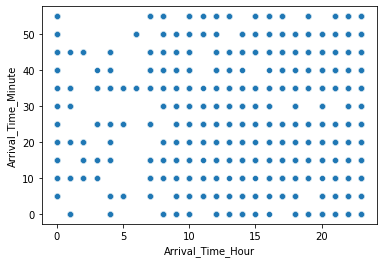

In [74]:
for i in range(len(df_train_num)):
    for j in df_train_num[i+1:]:
        plt.figure()
        sns.scatterplot(df_train[df_train_num[i]], df_train[j])

### From above graph we find that bivariate graph doesn't shows any common pattern of data distribution.

#### 

## Violin Plot

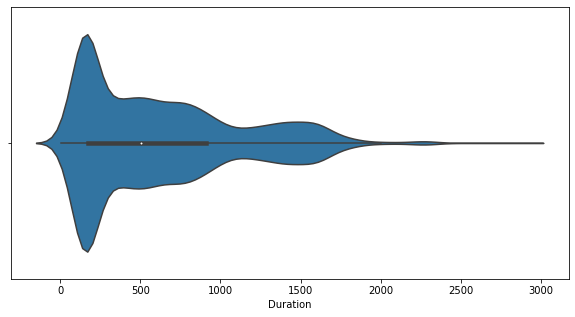

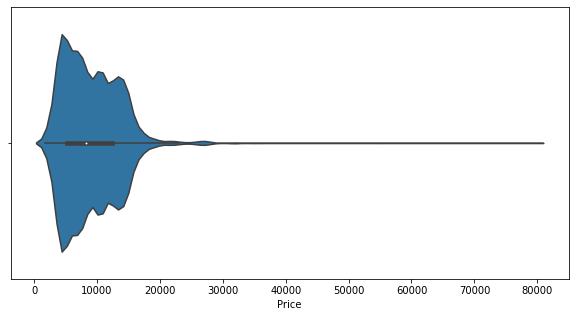

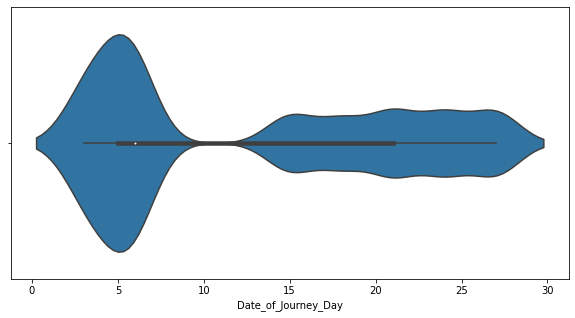

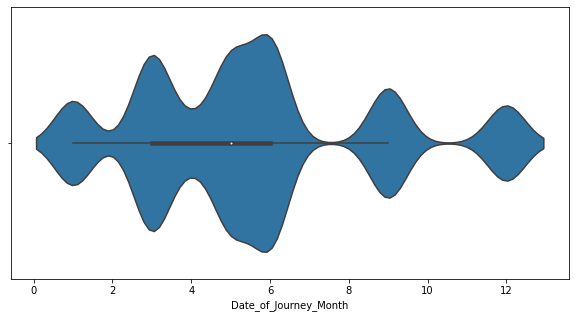

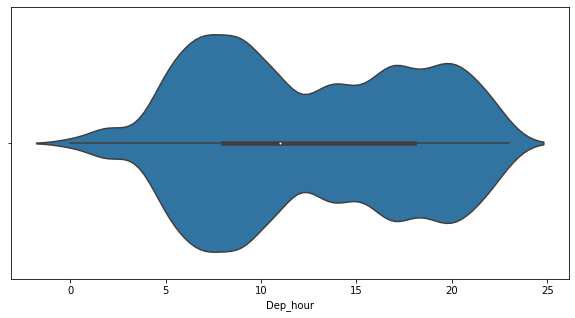

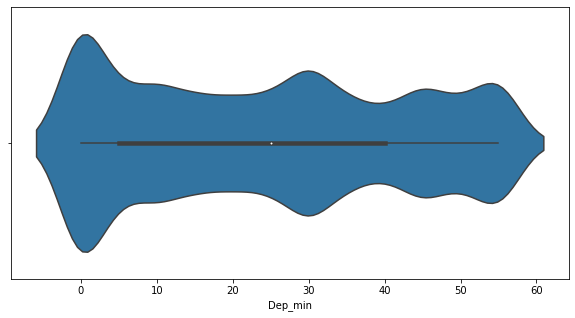

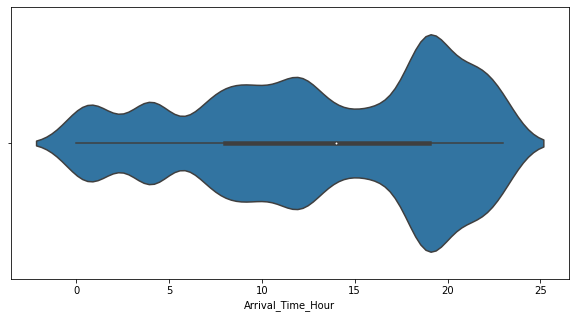

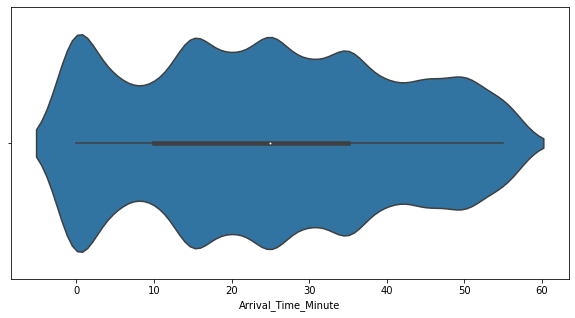

In [75]:
for i in df_train_num:
    plt.figure(figsize = (10,5))
    sns.violinplot(df_train[i] , data = df_train)
    
    
# checking spreading density of the data

#### 

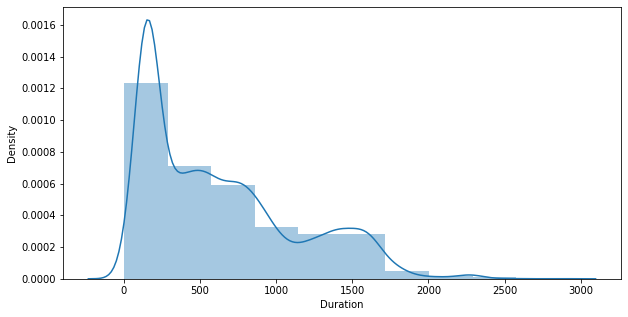

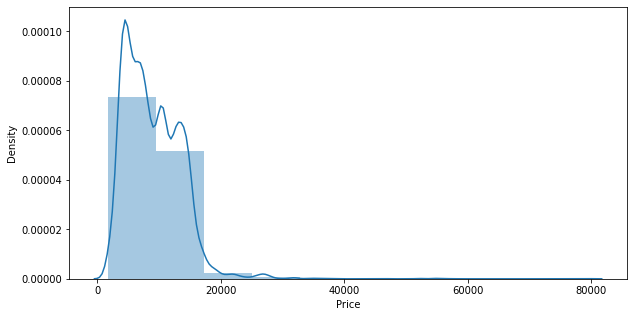

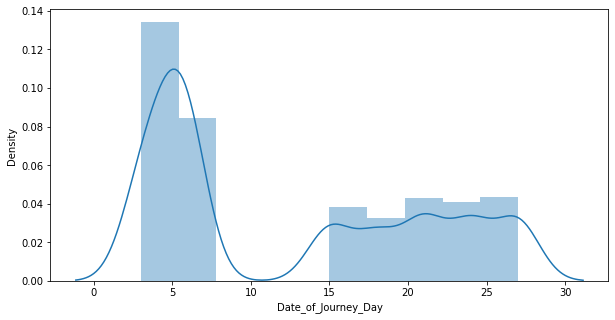

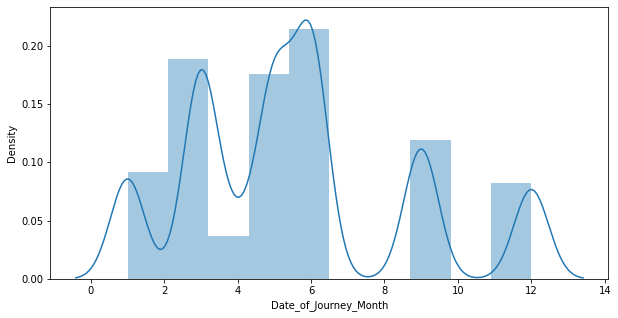

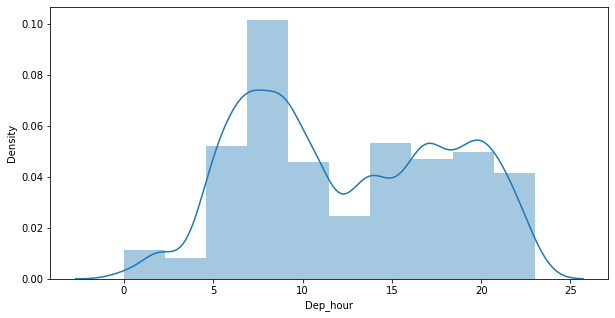

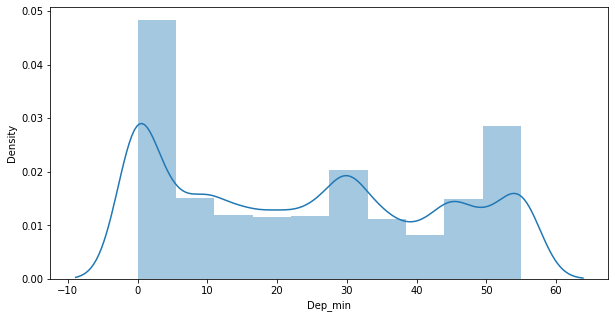

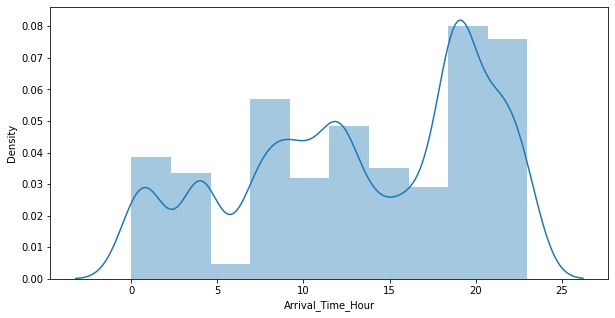

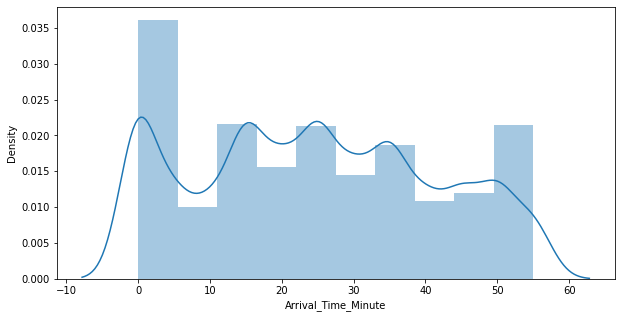

In [76]:
for i in df_train_num:
    plt.figure(figsize = (10,5))
    sns.distplot(df_train[i] , bins = 10)
    
    
# checking spreading distribution of the data

#### Observations

-  From above graph we find that duration density lies in the approx range of 2500.


-  From above graph we find that price  lies in the approx range of 20000.


-  From above graph we find that duration density lies in the approx range of 2500.


- From above graph we find that on 5th of the month having high journey.


- On 6th month of the year passengers travel more.


- Dep hour lies in the range of approx 25.


- Dep min lies in the range of approx 55.


-  As per dataset arrival time hour are 20 more as graph shows.


- Arrival minutes shows same range 


#### 

### Checking Outliers

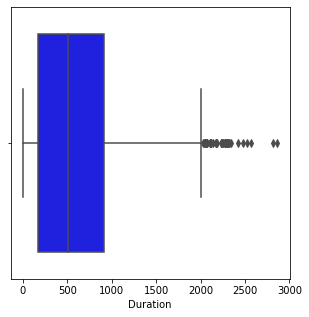

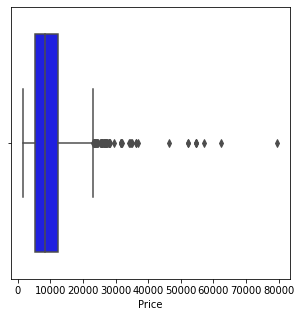

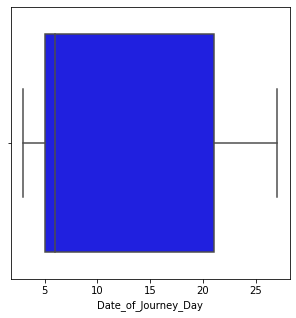

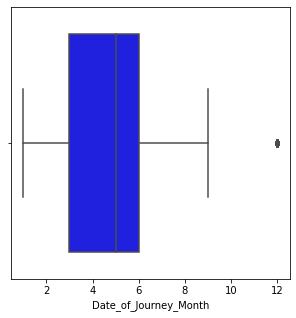

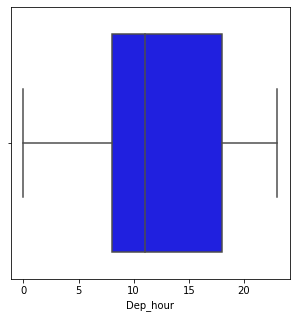

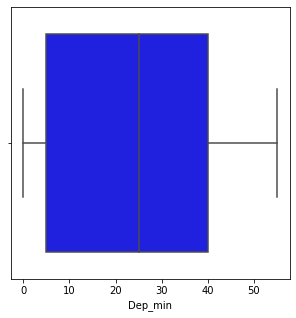

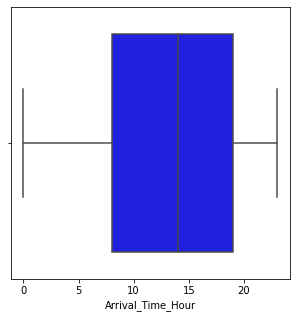

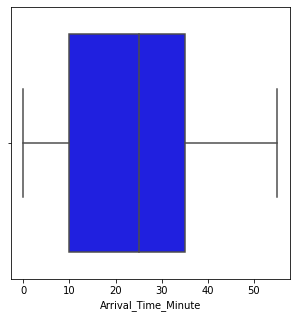

In [77]:
for i in df_train_num:
    plt.figure(figsize = (5,5))
    sns.boxplot(df_train[i], orient='v', color='blue')

#### Observations

- Price and Duration having outliers as per above graph while rest of dataset columns not shows outliers.

### Checking Skewness

In [78]:
df_train[df_train_num].skew().sort_values()

Arrival_Time_Hour       -0.378978
Dep_hour                 0.108306
Arrival_Time_Minute      0.110802
Dep_min                  0.171301
Date_of_Journey_Day      0.375990
Date_of_Journey_Month    0.630882
Duration                 0.903973
Price                    1.857490
dtype: float64

<Figure size 72x36 with 0 Axes>

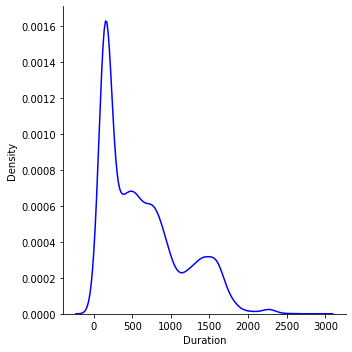

<Figure size 72x36 with 0 Axes>

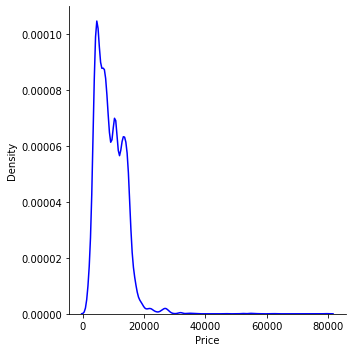

<Figure size 72x36 with 0 Axes>

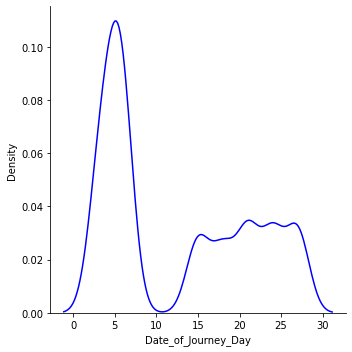

<Figure size 72x36 with 0 Axes>

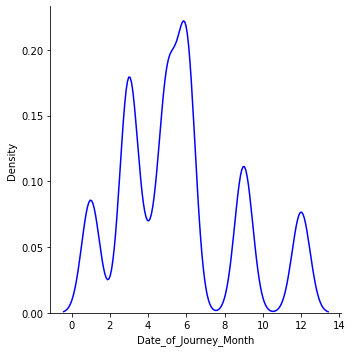

<Figure size 72x36 with 0 Axes>

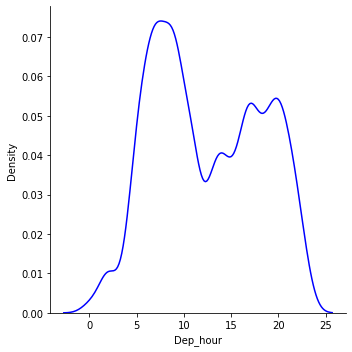

<Figure size 72x36 with 0 Axes>

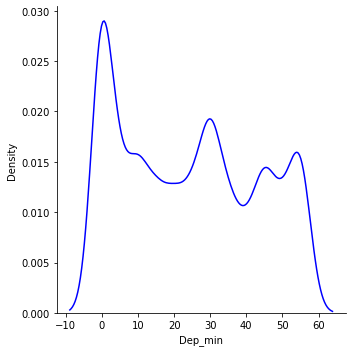

<Figure size 72x36 with 0 Axes>

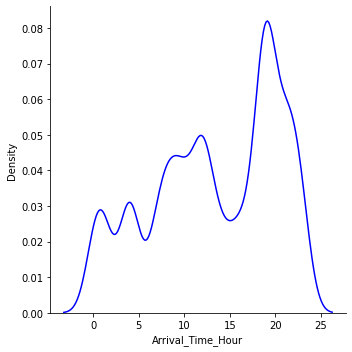

<Figure size 72x36 with 0 Axes>

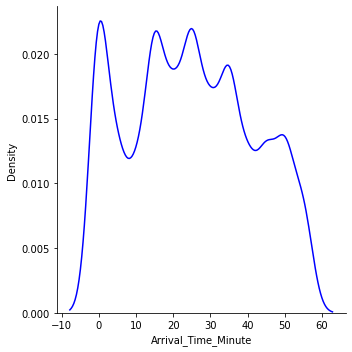

In [79]:
for i in df_train_num:
    plt.figure(figsize = (1,0.5))
    sns.displot(df_train[i], kind = 'kde', color = 'blue',)

#### Observations: Only arrival time hour shows left skewness while rest of columns of dataset shows right skewness

## Checking Overall of the Dataset by Pairplot

<Figure size 1080x1080 with 0 Axes>

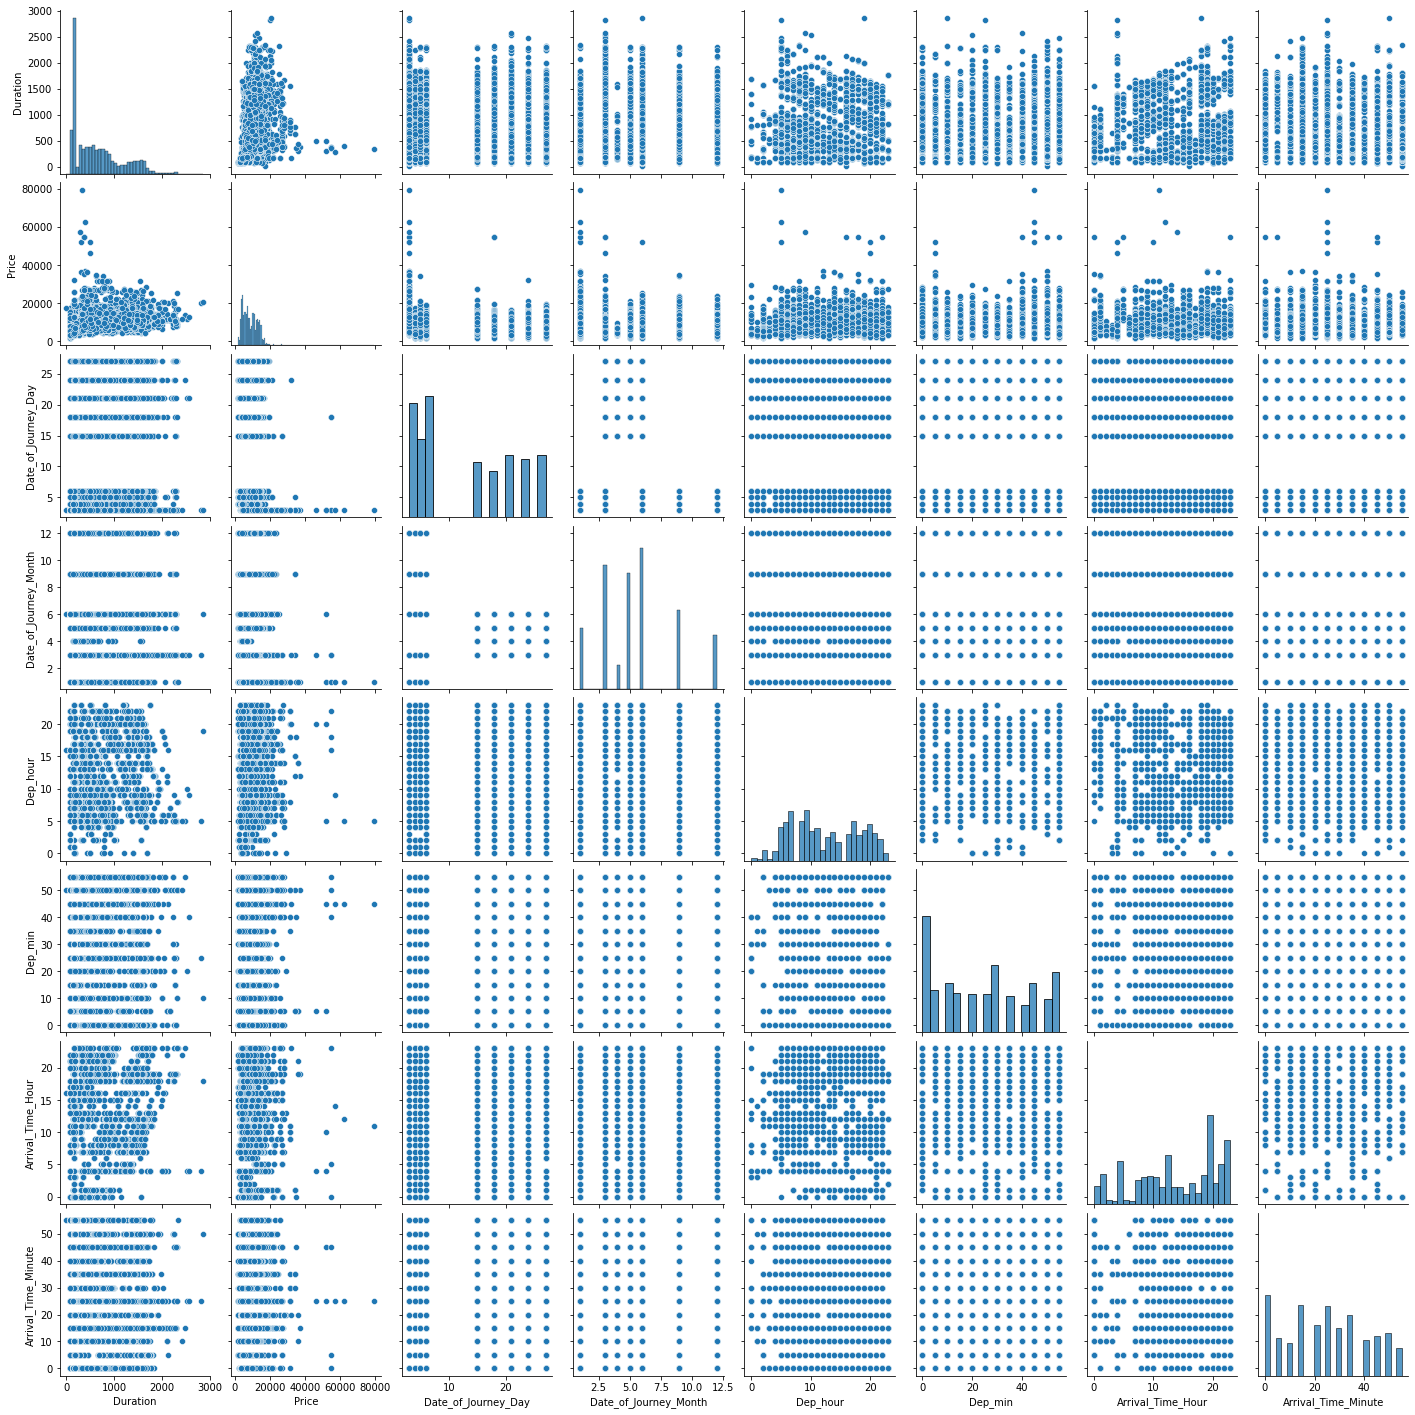

In [80]:
plt.figure(figsize = (15,15))
sns.pairplot(df_train)

#### Observations: Measured all analysis above are similar to pairplot.

### Converting objects dataset into numerical form we are using Ordinal Encoder

In [60]:
from sklearn.preprocessing import OrdinalEncoder
onc = OrdinalEncoder()

In [61]:
for i in df_train.select_dtypes(include = 'object').columns:
    df_train[i] = onc.fit_transform(df_train[i].values.reshape(-1,1))
     
for i in df_test.select_dtypes(include = 'object').columns:
    df_test[i] = onc.fit_transform(df_test[i].values.reshape(-1,1))
     


In [62]:
df_test.head(1) # checking result

Airline  Source  Destination  Duration  Total_Stops  Additional_Info  \
0      4.0     2.0          1.0       655          0.0              5.0   

   Date_of_Journey_Day  Date_of_Journey_Month  Dep_hour  Dep_min  \
0                    6                      6        17       30   

   Arrival_Time_Hour  Arrival_Time_Minute  
0                  4                   25

## Removing Outliers from the Dataset

In [63]:
from scipy.stats import zscore

z = np.abs(zscore(df_train))

# taking thresold value = 3
#np.where(z>3)

df_train_z = df_train[(z<3).all(axis = 1)]

In [159]:
from scipy.stats import zscore

z1 = np.abs(zscore(df_test))

# taking thresold value = 3
#np.where(z>3)

df_test_z = df_test[(z1<3).all(axis = 1)]

In [160]:
# train
print(df_train_z.shape)
print(df_train.shape)

# test
print(df_test_z.shape)
print(df_test.shape)

(10297, 13)
(10462, 13)
(2624, 12)
(2645, 12)


In [66]:
percentage = round((10462 - 10297)/10462*100,2)
print(percentage, "Percentage of data loss in train dataset")  


percentage = round((2645 - 2624)/2645*100,2)
print(percentage, "Percentage of data loss in test dataset")  

1.58 Percentage of data loss in train dataset
0.79 Percentage of data loss in test dataset


### Removing Outliers with Interquartile Method

In [67]:
Q1 = df_train.quantile(.25)
Q3 = df_train.quantile(.75)
IQR = Q3 - Q1

In [68]:
df_train_IQR = df_train[~((df_train<(Q1 - 1.5*IQR)) | (df_train>(Q3 + 1.5*IQR))).any(axis = 1)]

In [69]:
df_train_IQR.shape

(2763, 13)

In [70]:
percentage = round((10462 - 2763)/10462*100,2)
print(percentage, "Percentage of data loss in train dataset")  

73.59 Percentage of data loss in train dataset


### From above two methods of removing outliers we find that Zscore give lesser data loss percent hence we can use it. While Interquartile shows higher dataloss hence we can't consider it.

In [71]:
df_train_z.describe()

Airline        Source   Destination      Duration   Total_Stops  \
count  10297.000000  10297.000000  10297.000000  10297.000000  10297.000000   
mean       3.995241      1.967369      1.412644    618.353404      1.476741   
std        2.370761      1.181106      1.456227    485.901410      1.830117   
min        0.000000      0.000000      0.000000      5.000000      0.000000   
25%        3.000000      2.000000      0.000000    170.000000      0.000000   
50%        4.000000      2.000000      1.000000    500.000000      0.000000   
75%        4.000000      3.000000      2.000000    900.000000      4.000000   
max       11.000000      4.000000      5.000000   2120.000000      4.000000   

       Additional_Info        Price  Date_of_Journey_Day  \
count     10297.000000  10297.00000         10297.000000   
mean          7.407206   8805.12829            12.721764   
std           1.169393   4056.63408             8.776989   
min           4.000000   1759.00000             3.000000   
25%           8.000000   5198.00000             5.000000   
50%           8.000000   8073.00000             6.000000   
75%           8.000000  12192.00000            21.000000   
max           9.000000  22798.00000            27.000000   

       Date_of_Journey_Month      Dep_hour      Dep_min  Arrival_Time_Hour  \
count           10297.000000  10297.000000  10297.00000       10297.000000   
mean                5.573080     12.518695     24.33233          13.367291   
std                 2.981575      5.714258     18.77303           6.855519   
min                 1.000000      0.000000      0.00000           0.000000   
25%                 3.000000      8.000000      5.00000           8.000000   
50%                 5.000000     11.000000     25.00000          14.000000   
75%                 6.000000     18.000000     40.00000          19.000000   
max                12.000000     23.000000     55.00000          23.000000   

       Arrival_Time_Minute  
count         10297.000000  
mean             24.703797  
std              16.598920  
min               0.000000  
25%              10.000000  
50%              25.000000  
75%              35.000000  
max              55.000000

<AxesSubplot:>

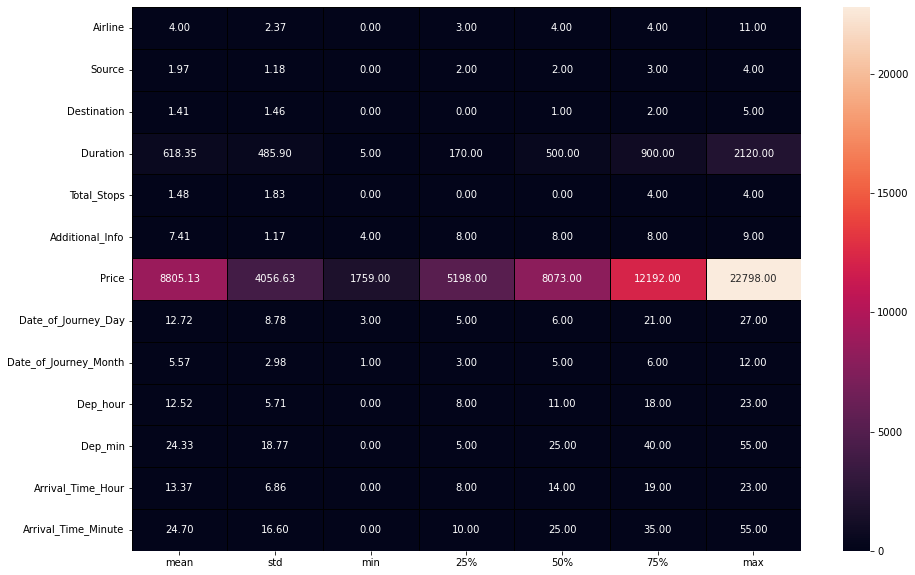

In [72]:
plt.figure(figsize = (15,10))
sns.heatmap(df_train_z.describe()[1:].transpose(), annot = True, linecolor='black', linewidths=0.5, fmt = '.2f')

#checking description visually

#### Observations: Price shows very high max values which shows that column can have higher collinearity and VIF.

## Checking Correlation of the dataset

In [73]:
df_train_z.corr()

Airline    Source  Destination  Duration  Total_Stops  \
Airline                1.000000 -0.014103     0.019530 -0.141062     0.034235   
Source                -0.014103  1.000000    -0.580243  0.173876    -0.235395   
Destination            0.019530 -0.580243     1.000000 -0.275275     0.357234   
Duration              -0.141062  0.173876    -0.275275  1.000000    -0.629495   
Total_Stops            0.034235 -0.235395     0.357234 -0.629495     1.000000   
Additional_Info       -0.063167 -0.041713     0.053372 -0.182450     0.163924   
Price                 -0.038289  0.075976    -0.171951  0.572129    -0.625715   
Date_of_Journey_Day    0.030379 -0.004446    -0.032651 -0.043786     0.038703   
Date_of_Journey_Month -0.010895  0.043785    -0.081067  0.067548    -0.065364   
Dep_hour              -0.039622  0.060848    -0.076089  0.022480     0.038828   
Dep_min               -0.063445 -0.049539     0.120730 -0.020853     0.053578   
Arrival_Time_Hour      0.000633  0.028109    -0.045994  0.051038    -0.101194   
Arrival_Time_Minute   -0.075646  0.021503     0.015564 -0.075729     0.178290   

                       Additional_Info     Price  Date_of_Journey_Day  \
Airline                      -0.063167 -0.038289             0.030379   
Source                       -0.041713  0.075976            -0.004446   
Destination                   0.053372 -0.171951            -0.032651   
Duration                     -0.182450  0.572129            -0.043786   
Total_Stops                   0.163924 -0.625715             0.038703   
Additional_Info               1.000000 -0.043055            -0.029622   
Price                        -0.043055  1.000000            -0.147324   
Date_of_Journey_Day          -0.029622 -0.147324             1.000000   
Date_of_Journey_Month        -0.025932  0.071054            -0.281367   
Dep_hour                     -0.063327  0.010495            -0.009311   
Dep_min                      -0.006594 -0.054565            -0.010158   
Arrival_Time_Hour             0.022764  0.043548            -0.001846   
Arrival_Time_Minute           0.051648 -0.102115            -0.019079   

                       Date_of_Journey_Month  Dep_hour   Dep_min  \
Airline                            -0.010895 -0.039622 -0.063445   
Source                              0.043785  0.060848 -0.049539   
Destination                        -0.081067 -0.076089  0.120730   
Duration                            0.067548  0.022480 -0.020853   
Total_Stops                        -0.065364  0.038828  0.053578   
Additional_Info                    -0.025932 -0.063327 -0.006594   
Price                               0.071054  0.010495 -0.054565   
Date_of_Journey_Day                -0.281367 -0.009311 -0.010158   
Date_of_Journey_Month               1.000000  0.027039  0.009500   
Dep_hour                            0.027039  1.000000 -0.017297   
Dep_min                             0.009500 -0.017297  1.000000   
Arrival_Time_Hour                  -0.002511  0.004630  0.049016   
Arrival_Time_Minute                -0.022897  0.073857 -0.021596   

                       Arrival_Time_Hour  Arrival_Time_Minute  
Airline                         0.000633            -0.075646  
Source                          0.028109             0.021503  
Destination                    -0.045994             0.015564  
Duration                        0.051038            -0.075729  
Total_Stops                    -0.101194             0.178290  
Additional_Info                 0.022764             0.051648  
Price                           0.043548            -0.102115  
Date_of_Journey_Day            -0.001846            -0.019079  
Date_of_Journey_Month          -0.002511            -0.022897  
Dep_hour                        0.004630             0.073857  
Dep_min                         0.049016            -0.021596  
Arrival_Time_Hour               1.000000            -0.152045  
Arrival_Time_Minute            -0.152045             1.000000

<AxesSubplot:>

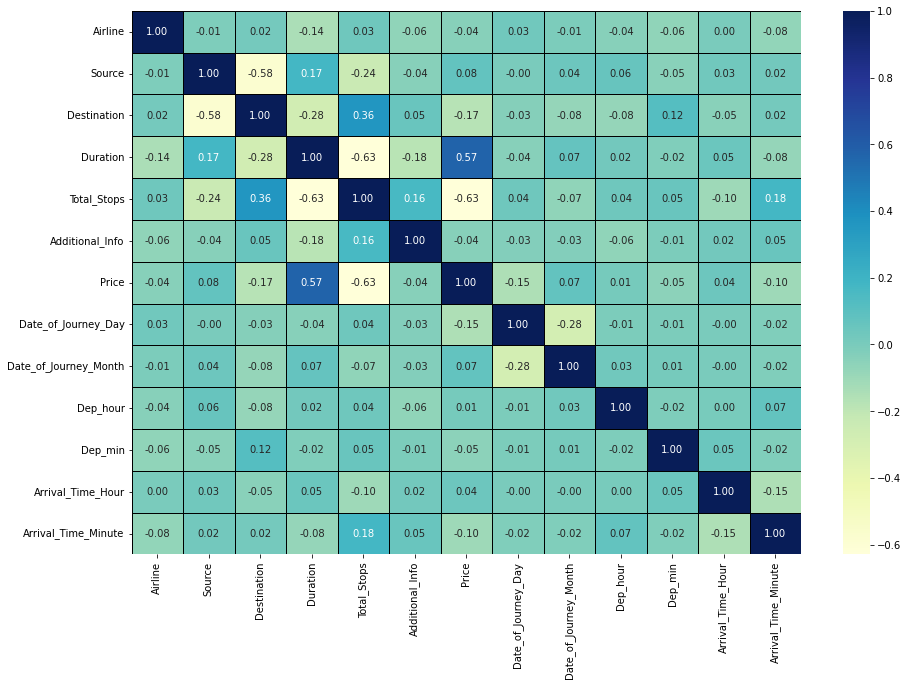

In [74]:
plt.figure(figsize = (15,10))
sns.heatmap(df_train_z.corr(), annot = True, linecolor = 'black', linewidths = 1, fmt = '.2f', cmap="YlGnBu" )

### Observations: Price shows higher correlation 0.57 with respect to Duration from all dataset while rest of dataset shows correlation less than 0.40.

## Checking Positive and Negative Correlation

<AxesSubplot:>

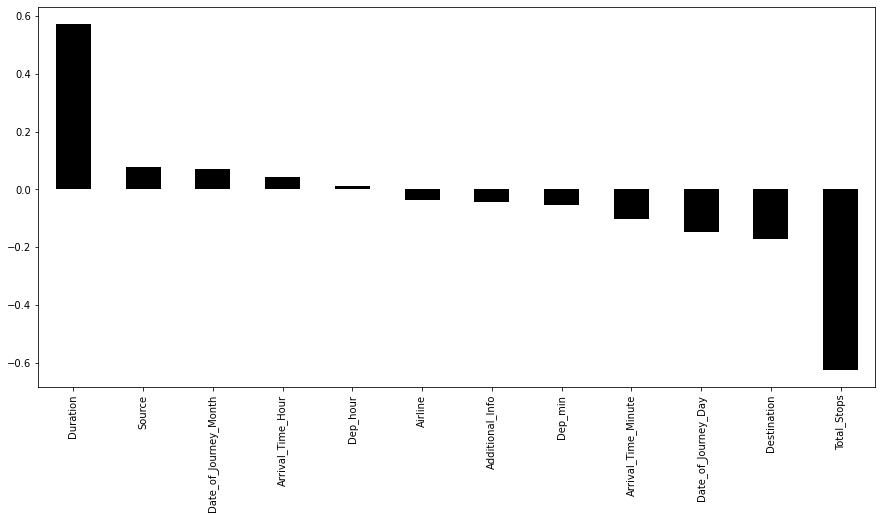

In [75]:
plt.figure(figsize = (15,7))
df_train_z.corr()['Price'].sort_values(ascending = False).drop('Price').plot(kind = 'bar', color = 'k')

In [76]:
df_train_z.corr()['Price'].sort_values(ascending = False)

Price                    1.000000
Duration                 0.572129
Source                   0.075976
Date_of_Journey_Month    0.071054
Arrival_Time_Hour        0.043548
Dep_hour                 0.010495
Airline                 -0.038289
Additional_Info         -0.043055
Dep_min                 -0.054565
Arrival_Time_Minute     -0.102115
Date_of_Journey_Day     -0.147324
Destination             -0.171951
Total_Stops             -0.625715
Name: Price, dtype: float64

#### Observations:-  Price, Duration, Source, Date_of_Journey_Month, Arrival_Time_Hour, Dep_hour shows positive correlation while rest of data shows negative correlation toward price.

## Dividing data for feature selection

In [77]:
x = df_train_z.drop('Price', axis = 1)
y = df_train_z['Price']

In [78]:
print('shape of x', x.shape)
print('Shape of y', y.shape)

shape of x (10297, 12)
Shape of y (10297,)


## Removing Skewness

In [79]:
skewed_col = ['Duration', 'Date_of_Journey_Day', 'Date_of_Journey_Month','Dep_hour', 'Dep_min', 'Arrival_Time_Hour', 'Arrival_Time_Minute']

In [80]:
x[skewed_col].skew()

Duration                 0.820685
Date_of_Journey_Day      0.362584
Date_of_Journey_Month    0.636062
Dep_hour                 0.100125
Dep_min                  0.176291
Arrival_Time_Hour       -0.372195
Arrival_Time_Minute      0.108071
dtype: float64

In [81]:
df_test_z[skewed_col].skew()

Duration                 0.826742
Date_of_Journey_Day      0.474518
Date_of_Journey_Month    0.591529
Dep_hour                 0.076868
Dep_min                  0.134720
Arrival_Time_Hour       -0.436527
Arrival_Time_Minute      0.106409
dtype: float64

### From above observations we find that Only Duration and Date_of_Journey_Month shows skewness greater than thresold values while rest of dataset are under acceptable zone.

In [82]:
x_check = x.copy()# making new variable from originalfor no disturbance in main dataset

In [83]:
x_check[skewed_col].skew()

Duration                 0.820685
Date_of_Journey_Day      0.362584
Date_of_Journey_Month    0.636062
Dep_hour                 0.100125
Dep_min                  0.176291
Arrival_Time_Hour       -0.372195
Arrival_Time_Minute      0.108071
dtype: float64

We know that only Duration and Date_of_Journey_Month shows skewness more than thresold value while others columns of dataset are in the acceptable zone.
Hence we make operation only on these columns

In [84]:
x_check[['Duration', 'Date_of_Journey_Month']].skew()

Duration                 0.820685
Date_of_Journey_Month    0.636062
dtype: float64

### Using Power Transformer method

In [85]:
from sklearn.preprocessing import PowerTransformer
pw = PowerTransformer('yeo-johnson')

In [86]:
x_check[['Duration', 'Date_of_Journey_Month']] = pw.fit_transform(x_check[['Duration', 'Date_of_Journey_Month']])
x_check[['Duration', 'Date_of_Journey_Month']].skew()

Duration                -0.040417
Date_of_Journey_Month   -0.023787
dtype: float64

#### We find that by using Power Transformer method for skewness removal makes value very less for observations hence we are going to try some other methods.

In [87]:
x_check = x.copy()# making new variable from originalfor no disturbance in main dataset

In [88]:
x_check['Duration'] = np.sqrt(1+ x_check['Duration'])

In [89]:
x_check['Date_of_Journey_Month'] = np.sqrt(1+ x_check['Date_of_Journey_Month'])

In [90]:
x_check[['Duration', 'Date_of_Journey_Month']].skew()

Duration                 0.345359
Date_of_Journey_Month    0.094126
dtype: float64

#### We observe that using np.sqrt gives data into more likely to Gaussian data distribution hence we consider it.

In [91]:
# train dataset
x['Duration'] = np.sqrt(1 + x['Duration'])
x['Date_of_Journey_Month'] = np.sqrt(1 + x['Date_of_Journey_Month'])

In [161]:
# test dataset
df_test_z['Duration'] = np.sqrt(1 + df_test_z['Duration'])
df_test_z['Date_of_Journey_Month'] = np.sqrt(1 + df_test_z['Date_of_Journey_Month'])

In [93]:
x_check[skewed_col].skew()

Duration                 0.345359
Date_of_Journey_Day      0.362584
Date_of_Journey_Month    0.094126
Dep_hour                 0.100125
Dep_min                  0.176291
Arrival_Time_Hour       -0.372195
Arrival_Time_Minute      0.108071
dtype: float64

In [94]:
df_test_z[skewed_col].skew()

Duration                 0.323532
Date_of_Journey_Day      0.474518
Date_of_Journey_Month    0.060221
Dep_hour                 0.076868
Dep_min                  0.134720
Arrival_Time_Hour       -0.436527
Arrival_Time_Minute      0.106409
dtype: float64

Now above dataset are in skewness under considerable zone.

### Checking Mutlicollinearity

In [95]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [96]:
def calc_vif(x):
    
    vif = pd.DataFrame()
    vif['Variance'] = x.columns
    vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    return vif

In [97]:
calc_vif(x[skewed_col])  # checking VIF of numerical columns

Variance  VIF Factor
0               Duration    5.902250
1    Date_of_Journey_Day    2.762865
2  Date_of_Journey_Month   10.533507
3               Dep_hour    5.331682
4                Dep_min    2.580236
5      Arrival_Time_Hour    4.456412
6    Arrival_Time_Minute    3.018577

In [98]:
calc_vif(df_test_z[skewed_col])  # checking VIF of numerical columns

Variance  VIF Factor
0               Duration    6.002553
1    Date_of_Journey_Day    2.672578
2  Date_of_Journey_Month   10.460376
3               Dep_hour    5.332563
4                Dep_min    2.581254
5      Arrival_Time_Hour    4.389818
6    Arrival_Time_Minute    2.935276

### VIF are under acceptable zone hence we can consider it without any changes

### Standard Scalling

In [99]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [100]:
x[skewed_col] = sc.fit_transform(x[skewed_col])  # train dataset

In [162]:
df_test_z[skewed_col] = sc.fit_transform(df_test_z[skewed_col])  # test dataset

In [102]:
x.head(1)

Airline  Source  Destination  Duration  Total_Stops  Additional_Info  \
0      3.0     0.0          5.0 -1.009941          4.0              8.0   

   Date_of_Journey_Day  Date_of_Journey_Month  Dep_hour   Dep_min  \
0              1.28504              -0.849391  1.659317 -0.230785   

   Arrival_Time_Hour  Arrival_Time_Minute  
0          -1.804078            -0.885872

### Feature Selection

In [103]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import random

In [104]:
class best_model:
    def best_fit(x, y, model):
        random_state_values = []
        for i in range(0,200):
            x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = i, test_size = 0.30)
            model.fit(x_train, y_train)
            pred_train = model.predict(x_train)
            pred_test = model.predict(x_test)
            training = r2_score(pred_train, y_train)
            testing = r2_score(pred_test, y_test)
            
            if np.abs(round(training, 2) - round(testing, 2)) < 0.01:
                
                print("At random_state:-", i)
                print("Training accuracy_score is:-", r2_score(pred_train, y_train)*100)
                print("Testing accuracy_score is:-", r2_score(pred_test, y_test)*100)
                print("\n")
                random_state_values.append(i)
        print("Best fit random_state_values", random_state_values)
    
    
    def final_model(x, y, model, i):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
        model.fit(x_train, y_train)
        pred_train = model.predict(x_train)
        pred_test = model.predict(x_test)
        print("At random state", i , "model giving best accuracy score","\n")
        Train_accuracy = r2_score(pred_train, y_train)
        Test_accuracy = r2_score(pred_test, y_test)

        print('Training accuracy:- ', Train_accuracy*100)
        print('Testing accuracy:- ', Test_accuracy*100)
        print("\n")
        print('--------------------------------------')
        print('Mean squared error:- ', mean_squared_error(pred_test, y_test) )
        print('Mean absolute error:- ', mean_absolute_error(pred_test, y_test) )
        print('Root Mean squared error:-',np.sqrt(mean_squared_error(pred_test, y_test)))
        
        plt.figure(figsize = (10, 5))
        plt.scatter(x = y_test, y = pred_test, color = 'c')
        plt.plot(y_test, y_test, color = 'b')
        plt.xlabel('Actual_values', fontsize= 18 )
        plt.ylabel('Predicted_values', fontsize = 18)
        plt.title(str(model), fontsize = 20)
        

    def cross_val_score(model, x, y):
        for value in range(2,10):
            cv = cross_val_score(model, x, y, cv = value).mean()
            print('cross_val_score', cv*100,'at cv =', value,"\n")


## Model 1 KNeighbors Regressor

In [323]:
model = KNeighborsRegressor()

In [325]:
# best_model.best_fit(x, y, model) # finding best random state

# No random state value find

#### Taking some random values for checking Model

In [326]:
for i in random.sample(range(1, 200), 30):
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = i, test_size = 0.30)
    model.fit(x_train, y_train)
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)
    training = r2_score(pred_train, y_train)
    testing = r2_score(pred_test, y_test)
            
    #if np.abs(round(training, 2) - round(testing, 2)) < 0.01:
                
    print("At random_state:-", i)
    print("Training accuracy_score is:-", r2_score(pred_train, y_train)*100)
    print("Testing accuracy_score is:-", r2_score(pred_test, y_test)*100)
    print("\n")


At random_state:- 45
Training accuracy_score is:- 84.24978964231342
Testing accuracy_score is:- 75.02284441286791


At random_state:- 191
Training accuracy_score is:- 83.47638375946279
Testing accuracy_score is:- 77.53329459304426


At random_state:- 190
Training accuracy_score is:- 84.13211692982271
Testing accuracy_score is:- 76.33351914477234


At random_state:- 124
Training accuracy_score is:- 84.69458561348779
Testing accuracy_score is:- 74.35964749544873


At random_state:- 44
Training accuracy_score is:- 83.5196849484545
Testing accuracy_score is:- 77.08641046296802


At random_state:- 61
Training accuracy_score is:- 84.46962479619998
Testing accuracy_score is:- 75.9772553366769


At random_state:- 27
Training accuracy_score is:- 85.43298672737055
Testing accuracy_score is:- 72.73526637052896


At random_state:- 3
Training accuracy_score is:- 84.5143753422798
Testing accuracy_score is:- 75.2633747472006


At random_state:- 196
Training accuracy_score is:- 84.96808526395974
Testi

#### Model giving best r2 score at random state value 181

At random state 181 model giving best accuracy score 

Training accuracy:-  83.71427516445273
Testing accuracy:-  78.09850496137885


--------------------------------------
Mean squared error:-  3086767.986343042
Mean absolute error:-  1157.2171521035598
Root Mean squared error:- 1756.920028442684


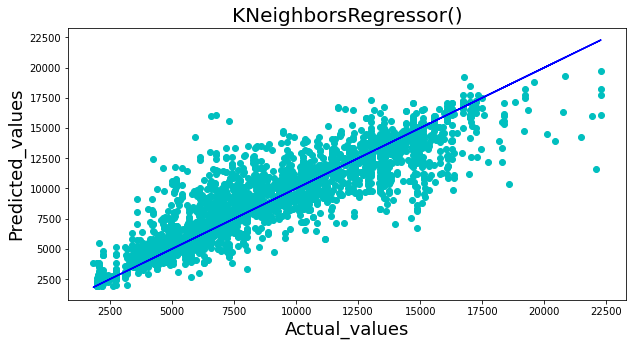

In [327]:
best_model.final_model(x, y, model, 181)

In [328]:
best_model.cross_val_score(model, x, y)

cross_val_score 77.45734563864124 at cv = 2 

cross_val_score 78.80844097203446 at cv = 3 

cross_val_score 79.54656130390131 at cv = 4 

cross_val_score 79.86992346980429 at cv = 5 

cross_val_score 80.08275450755 at cv = 6 

cross_val_score 80.33968353841898 at cv = 7 

cross_val_score 80.47096441045845 at cv = 8 

cross_val_score 80.48215224624555 at cv = 9 



## Model 2 Decision Tree Regressor

In [329]:
model = DecisionTreeRegressor()

In [330]:
# best_model.best_fit(x, y, model) # finding best random state

# No random state value find

#### Taking some random values for checking Model

In [331]:
for i in random.sample(range(1, 200), 30):
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = i, test_size = 0.30)
    model.fit(x_train, y_train)
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)
    training = r2_score(pred_train, y_train)
    testing = r2_score(pred_test, y_test)
            
    #if np.abs(round(training, 2) - round(testing, 2)) < 0.01:
                
    print("At random_state:-", i)
    print("Training accuracy_score is:-", r2_score(pred_train, y_train)*100)
    print("Testing accuracy_score is:-", r2_score(pred_test, y_test)*100)
    print("\n")


At random_state:- 5
Training accuracy_score is:- 99.56907876022858
Testing accuracy_score is:- 85.59252400083055


At random_state:- 138
Training accuracy_score is:- 99.53067624702177
Testing accuracy_score is:- 84.90170817995845


At random_state:- 187
Training accuracy_score is:- 99.54475217503453
Testing accuracy_score is:- 85.92613511648418


At random_state:- 67
Training accuracy_score is:- 99.57310718027392
Testing accuracy_score is:- 85.60823592881644


At random_state:- 93
Training accuracy_score is:- 99.52734801020623
Testing accuracy_score is:- 84.99695200313506


At random_state:- 110
Training accuracy_score is:- 99.51417443369044
Testing accuracy_score is:- 86.9113760933166


At random_state:- 152
Training accuracy_score is:- 99.50816934241094
Testing accuracy_score is:- 85.98715915764292


At random_state:- 190
Training accuracy_score is:- 99.55845898613104
Testing accuracy_score is:- 86.60917087834655


At random_state:- 172
Training accuracy_score is:- 99.52457032899645


#### Model giving best r2 score at random state value 188

At random state 188 model giving best accuracy score 

Training accuracy:-  99.50338135914387
Testing accuracy:-  87.0203002872923


--------------------------------------
Mean squared error:-  2115708.2474469612
Mean absolute error:-  712.6709816612728
Root Mean squared error:- 1454.5474373312688


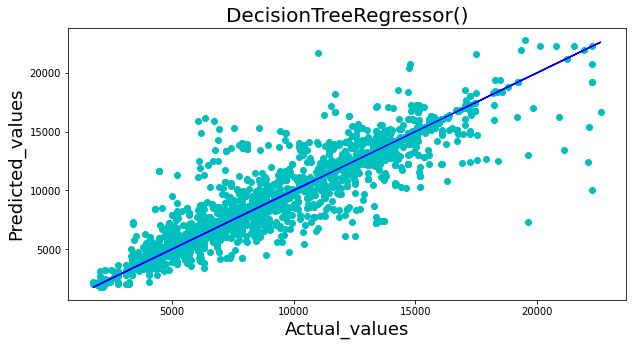

In [333]:
best_model.final_model(x, y, model, 188)

In [334]:
best_model.cross_val_score(model, x, y)

cross_val_score 84.69358523106123 at cv = 2 

cross_val_score 84.69855531048906 at cv = 3 

cross_val_score 85.76619627997582 at cv = 4 

cross_val_score 85.51818076961133 at cv = 5 

cross_val_score 85.72089010667169 at cv = 6 

cross_val_score 86.75973306203521 at cv = 7 

cross_val_score 86.29454102599496 at cv = 8 

cross_val_score 86.04096844822978 at cv = 9 



## Model 3 XGB Regressor

In [335]:
model = XGBRegressor()

In [341]:
# best_model.best_fit(x, y, model) # finding best random state

# No values found

#### Taking some random values for checking Model

In [337]:
for i in random.sample(range(1, 200), 30):
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = i, test_size = 0.30)
    model.fit(x_train, y_train)
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)
    training = r2_score(pred_train, y_train)
    testing = r2_score(pred_test, y_test)
            
    #if np.abs(round(training, 2) - round(testing, 2)) < 0.01:
                
    print("At random_state:-", i)
    print("Training accuracy_score is:-", r2_score(pred_train, y_train)*100)
    print("Testing accuracy_score is:-", r2_score(pred_test, y_test)*100)
    print("\n")


At random_state:- 18
Training accuracy_score is:- 97.47459724225249
Testing accuracy_score is:- 90.14649936275964


At random_state:- 196
Training accuracy_score is:- 97.31965792661643
Testing accuracy_score is:- 90.46170813424547


At random_state:- 105
Training accuracy_score is:- 97.42558855953351
Testing accuracy_score is:- 91.23704426242539


At random_state:- 191
Training accuracy_score is:- 97.35242743018733
Testing accuracy_score is:- 91.53677675560246


At random_state:- 72
Training accuracy_score is:- 97.34291689546677
Testing accuracy_score is:- 91.8661929466285


At random_state:- 122
Training accuracy_score is:- 97.17383196777419
Testing accuracy_score is:- 91.42840238751542


At random_state:- 141
Training accuracy_score is:- 97.24809615767786
Testing accuracy_score is:- 92.02046392481977


At random_state:- 15
Training accuracy_score is:- 97.04307985571474
Testing accuracy_score is:- 91.30161603080037


At random_state:- 140
Training accuracy_score is:- 97.32461086098755

#### Model giving best r2 score at random state value 19

At random state 19 model giving best accuracy score 

Training accuracy:-  97.14418909028784
Testing accuracy:-  91.95115437992433


--------------------------------------
Mean squared error:-  1272413.1488433005
Mean absolute error:-  716.6849100156123
Root Mean squared error:- 1128.0129205125713


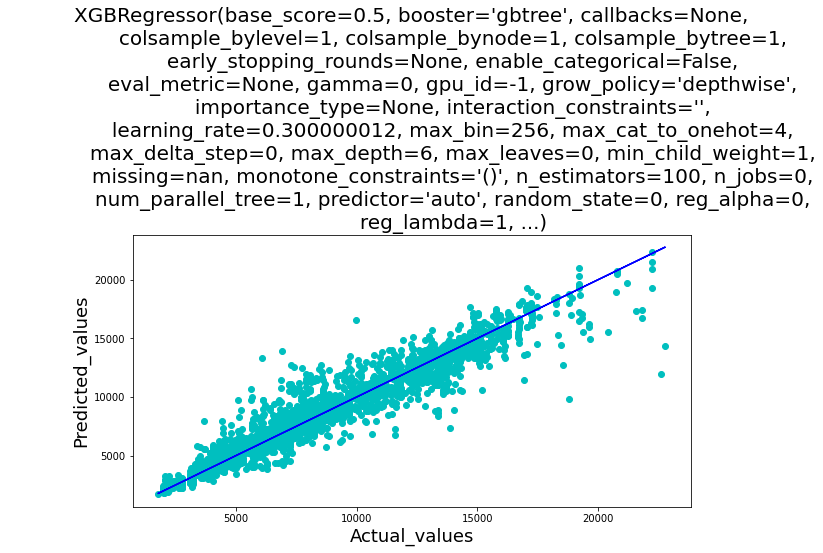

In [338]:
best_model.final_model(x, y, model, 19)

In [339]:
best_model.cross_val_score(model, x, y)

cross_val_score 90.84946895555095 at cv = 2 

cross_val_score 92.1168194522346 at cv = 3 

cross_val_score 92.35447746239484 at cv = 4 

cross_val_score 92.15007968694368 at cv = 5 

cross_val_score 92.61010914645667 at cv = 6 

cross_val_score 92.44082131598032 at cv = 7 

cross_val_score 92.63089038508916 at cv = 8 

cross_val_score 92.65393628534824 at cv = 9 



## Model 4 GradientBoostingRegressor

In [345]:
model = GradientBoostingRegressor()

In [346]:
best_model.best_fit(x, y, model) # finding best random state

At random_state:- 1
Training accuracy_score is:- 78.82524719019536
Testing accuracy_score is:- 79.39998627082915


At random_state:- 8
Training accuracy_score is:- 78.70341301462976
Testing accuracy_score is:- 78.9094457038668


At random_state:- 15
Training accuracy_score is:- 78.67919159053753
Testing accuracy_score is:- 78.79361353698438


At random_state:- 16
Training accuracy_score is:- 78.73591599730337
Testing accuracy_score is:- 79.00545649425561


At random_state:- 19
Training accuracy_score is:- 78.56768762535606
Testing accuracy_score is:- 79.05624974510663


At random_state:- 24
Training accuracy_score is:- 78.62495097761989
Testing accuracy_score is:- 78.63811724001448


At random_state:- 31
Training accuracy_score is:- 78.80009166783076
Testing accuracy_score is:- 79.15896573470906


At random_state:- 33
Training accuracy_score is:- 78.8597489583146
Testing accuracy_score is:- 78.6200187992217


At random_state:- 42
Training accuracy_score is:- 79.10969259657415
Testing a

#### Model giving best r2 score at random state value 43

At random state 43 model giving best accuracy score 

Training accuracy:-  79.16885709594695
Testing accuracy:-  79.42028124891242


--------------------------------------
Mean squared error:-  2661084.9125090674
Mean absolute error:-  1144.473901970134
Root Mean squared error:- 1631.2832103926858


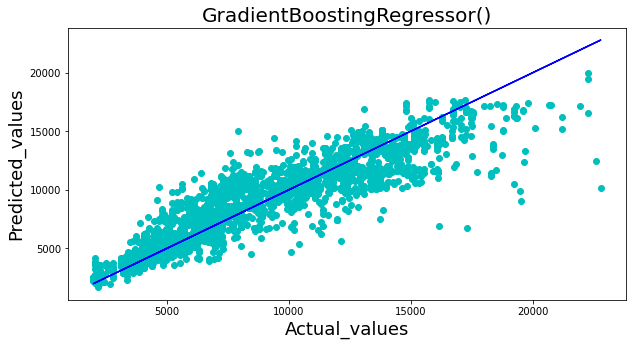

In [347]:
best_model.final_model(x, y, model, 43)

In [348]:
best_model.cross_val_score(model, x, y)

cross_val_score 82.58382133072908 at cv = 2 

cross_val_score 82.99774128900937 at cv = 3 

cross_val_score 82.96513744232823 at cv = 4 

cross_val_score 83.02102479857723 at cv = 5 

cross_val_score 82.95332206434546 at cv = 6 

cross_val_score 83.13739412993668 at cv = 7 

cross_val_score 83.15219321162824 at cv = 8 

cross_val_score 83.04417107532413 at cv = 9 



## Model 5 LGBMRegressor

In [349]:
model = LGBMRegressor()

In [350]:
#best_model.best_fit(x, y, model) # finding best random state

#No random state value find

Best fit random_state_values []


#### Taking some random values for checking Model

In [352]:
for i in random.sample(range(1, 200), 30):
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = i, test_size = 0.30)
    model.fit(x_train, y_train)
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)
    training = r2_score(pred_train, y_train)
    testing = r2_score(pred_test, y_test)
            
    #if np.abs(round(training, 2) - round(testing, 2)) < 0.01:
                
    print("At random_state:-", i)
    print("Training accuracy_score is:-", r2_score(pred_train, y_train)*100)
    print("Testing accuracy_score is:-", r2_score(pred_test, y_test)*100)
    print("\n")


At random_state:- 162
Training accuracy_score is:- 92.48575206707069
Testing accuracy_score is:- 88.86133361296234


At random_state:- 86
Training accuracy_score is:- 92.39811801330164
Testing accuracy_score is:- 89.55714129349359


At random_state:- 75
Training accuracy_score is:- 92.26851774797538
Testing accuracy_score is:- 88.09915838701988


At random_state:- 12
Training accuracy_score is:- 92.3952976955526
Testing accuracy_score is:- 87.91506652693411


At random_state:- 159
Training accuracy_score is:- 92.35594780836173
Testing accuracy_score is:- 88.96637452161295


At random_state:- 156
Training accuracy_score is:- 92.08671908334067
Testing accuracy_score is:- 89.12006329046275


At random_state:- 130
Training accuracy_score is:- 92.4939456019722
Testing accuracy_score is:- 88.13045311760528


At random_state:- 21
Training accuracy_score is:- 92.46494808268737
Testing accuracy_score is:- 88.43916240264255


At random_state:- 160
Training accuracy_score is:- 91.94031809006717
T

#### Model giving best r2 score at random state value 119

At random state 119 model giving best accuracy score 

Training accuracy:-  91.94781277558306
Testing accuracy:-  90.23380354327837


--------------------------------------
Mean squared error:-  1446051.1097102533
Mean absolute error:-  823.1111325345416
Root Mean squared error:- 1202.5186525415118


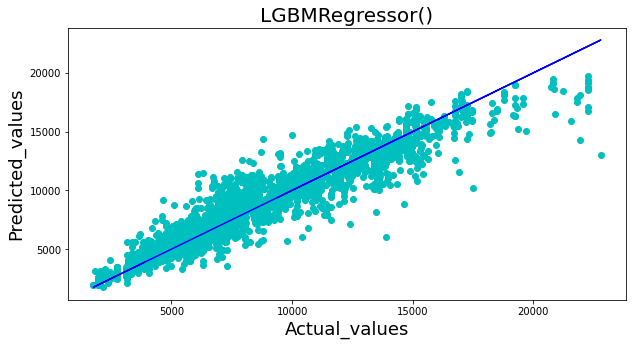

In [353]:
best_model.final_model(x, y, model, 119)

In [354]:
best_model.cross_val_score(model, x, y)

cross_val_score 89.62612008814052 at cv = 2 

cross_val_score 90.35085275381824 at cv = 3 

cross_val_score 90.59425015189508 at cv = 4 

cross_val_score 90.7150792181094 at cv = 5 

cross_val_score 90.70802890574917 at cv = 6 

cross_val_score 90.81186016443293 at cv = 7 

cross_val_score 90.91396979298253 at cv = 8 

cross_val_score 90.87379438352227 at cv = 9 



### Finalizing Model

In [105]:
# models                    R2_score_train_score    R2_score_test_score      CV score            CV_state

# KNeighborsRegressor       83.71427516445273       78.09850496137885       78.80844097203446      3     
# DecisionTreeRegressor     99.50338135914387       87.0203002872923        86.75973306203521      7
# XGBRegressor              97.14418909028784       91.95115437992433       92.65393628534824      9
# GradientBoostingRegressor 79.16885709594695       79.42028124891242       82.96513744232823      6
# LGBMRegressor             91.94781277558306       90.23380354327837       90.91396979298253      8

### Observatons: 
- KNeighborsRegressor : Model shows very much difference in training and testing accuracy hence we cannot consider it. Model becames underfit


- DecisionTreeRegressor:  Same as DecisionTreeRegressor shows very much difference in training and testing accuracy hence we cannot consider it. Model becames underfit


- XGBRegressor:  Same as above two model it shows very much difference in training and testing accuracy hence we cannot consider it. Model becames underfit


- GradientBoostingRegressor: GradientBoostingRegressor shows similar R2 testing and training score but it CV score is higher than it R2 score which makes model underfit also R2 score not good yet from all models hence we can't consider it.


- LGBMRegressor : Moder shows very close R2 score of testing and training also CV score is also good hence we can consider it for model building.

### Ensemble Method 

## Hyper Parameter Tuning

In [109]:
model = LGBMRegressor()
# using hyper parameter tuning for Ridge regression to find out best criterion

# param (boosting_type: str = 'gbdt',
#     num_leaves: int = 31,
#     max_depth: int = -1,
#     learning_rate: float = 0.1,
#     n_estimators: int = 100,
#     subsample_for_bin: int = 200000,
#     objective: Union[str, Callable, NoneType] = None,
#     class_weight: Union[Dict, str, NoneType] = None,
#     min_split_gain: float = 0.0,
#     min_child_weight: float = 0.001,
#     min_child_samples: int = 20,
#     subsample: float = 1.0,
#     subsample_freq: int = 0,
#     colsample_bytree: float = 1.0,
#     reg_alpha: float = 0.0,
#     reg_lambda: float = 0.0,
#     random_state: Union[numpy.random.mtrand.RandomState, int, NoneType] = None,
#     n_jobs: int = -1,
#     silent: Union[bool, str] = 'warn',
#     importance_type: str = 'split',)
# by default params

param = {'boosting_type': ['gbdt', 'dart'], 'num_leaves': [31,41], 'max_depth': [-1,0], 'learning_rate': [0.1, 1],
        'n_estimators': [100], 'colsample_bytree': [1.0, 0.1],}
# using only important parameters.

gd = GridSearchCV(model, param_grid=param, cv = 8)
gd.fit(x, y)
gd.best_params_

# {'boosting_type': 'dart',
#  'colsample_bytree': 1.0,
#  'learning_rate': 1,
#  'max_depth': -1,
#  'n_estimators': 100,
#  'num_leaves': 41}

{'boosting_type': 'dart',
 'colsample_bytree': 1.0,
 'learning_rate': 1,
 'max_depth': -1,
 'n_estimators': 100,
 'num_leaves': 41}

In [110]:
final_model = LGBMRegressor(boosting_type = 'dart', colsample_bytree= 1.0, learning_rate=1, max_depth = -1, n_estimators=100, num_leaves = 41)

In [117]:
#final_model = LGBMRegressor()

At random state 119 model giving best accuracy score 

Training accuracy:-  91.94781277558306
Testing accuracy:-  90.23380354327837


--------------------------------------
Mean squared error:-  1446051.1097102533
Mean absolute error:-  823.1111325345416
Root Mean squared error:- 1202.5186525415118


Text(0.5, 1.0, "LGBMRegressor(boosting_type='dart', learning_rate=1, num_leaves=41)")

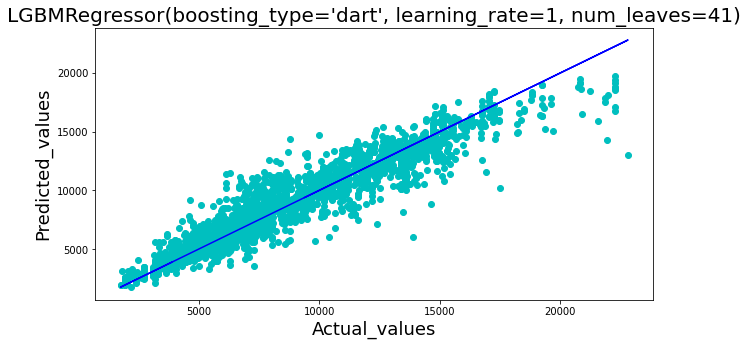

In [172]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 119)
final_model.fit(x_train, y_train)
pred_train = final_model.predict(x_train)
pred_test = final_model.predict(x_test)
print("At random state", 119 , "model giving best accuracy score","\n")
Train_accuracy = r2_score(pred_train, y_train)
Test_accuracy = r2_score(pred_test, y_test)

print('Training accuracy:- ', Train_accuracy*100)
print('Testing accuracy:- ', Test_accuracy*100)
print("\n")
print('--------------------------------------')
print('Mean squared error:- ', mean_squared_error(pred_test, y_test) )
print('Mean absolute error:- ', mean_absolute_error(pred_test, y_test) )
print('Root Mean squared error:-',np.sqrt(mean_squared_error(pred_test, y_test)))
        
plt.figure(figsize = (10, 5))
plt.scatter(x = y_test, y = pred_test, color = 'c')
plt.plot(y_test, y_test, color = 'b')
plt.xlabel('Actual_values', fontsize= 18 )
plt.ylabel('Predicted_values', fontsize = 18)
plt.title(str(model), fontsize = 20)

### 

### Cross Val Score

In [168]:
cross_val_score(final_model, x, y, cv = 8).mean()

0.9091396979298253

### Deploy Model

In [123]:
import pickle

filename = "FlightPricePrediction.pkl"
pickle.dump(final_model, open(filename, 'wb'))

### Loading Model

In [171]:
load = pickle.load(open('FlightPricePrediction.pkl', 'rb'))
result = load.score(x_test, y_test)
print(result)

0.9147684323271712


In [144]:
conclusion = pd.DataFrame()
conclusion['Predicted flight price'] = np.array(final_model.predict(x_test))
conclusion['Actual flight price'] = np.array(y_test)

In [149]:
conclusion.sample(10)

Predicted flight price  Actual flight price
1905            12562.808552                13033
638             11217.753230                10975
3065             4679.259971                 4050
2554            10887.191466                 9794
2797            13647.164100                13941
983              3091.998922                 2437
2873            16385.690802                15135
1191            14116.353122                14781
2080             3067.272117                 2754
324             11056.685258                10262

### Prediction for test dataset

In [163]:
df_test_z.head(1)

Airline  Source  Destination  Duration  Total_Stops  Additional_Info  \
0      4.0     2.0          1.0  0.264176          0.0              5.0   

   Date_of_Journey_Day  Date_of_Journey_Month  Dep_hour   Dep_min  \
0            -0.706417               0.244296  0.764014  0.272226   

   Arrival_Time_Hour  Arrival_Time_Minute  
0          -1.358711             0.024816

In [164]:
predicted_price =  pickle.load(open('FlightPricePrediction.pkl', 'rb'))  # Loading price_predictor model

In [165]:
predicted_flight_price = np.array(predicted_price.predict(df_test_z))  

In [166]:
df_test_z['Predicted_flight_price'] = predicted_flight_price

In [167]:
df_test_z.sample(10)

Airline  Source  Destination  Duration  Total_Stops  Additional_Info  \
1678      4.0     0.0          5.0  1.228858          0.0              3.0   
671       1.0     0.0          2.0 -1.031929          4.0              5.0   
171       4.0     2.0          1.0  0.064933          1.0              5.0   
2065      4.0     2.0          1.0  0.560453          1.0              3.0   
1074      3.0     2.0          1.0  0.086662          0.0              5.0   
2054      3.0     3.0          0.0 -1.092590          4.0              5.0   
1582      4.0     2.0          1.0  1.085464          1.0              5.0   
1229      6.0     2.0          1.0 -0.237479          0.0              5.0   
1351      4.0     2.0          1.0 -0.176104          0.0              5.0   
1521      0.0     0.0          2.0 -1.031929          4.0              5.0   

      Date_of_Journey_Day  Date_of_Journey_Month  Dep_hour   Dep_min  \
1678            -1.056843               1.852419  0.940506  1.584354   
671              1.396140              -0.084535  0.058046 -0.252625   
171              1.396140               0.244296 -0.647922  0.797078   
2065            -0.706417               1.109724 -1.353890  0.272226   
1074            -0.706417              -1.819117  0.587522 -1.302327   
2054             1.396140              -0.442119 -1.530382  0.797078   
1582             0.344862               0.244296 -0.647922  0.797078   
1229            -1.056843               0.244296 -0.294938  0.797078   
1351            -1.056843               0.244296  1.293490  1.321929   
1521             1.746566               0.244296 -1.530382  1.584354   

      Arrival_Time_Hour  Arrival_Time_Minute  Predicted_flight_price  
1678           0.205186            -0.569853            11553.263970  
671            0.347358            -0.867187             5190.468475  
171            0.773875            -1.461855            11613.613752  
2065           0.773875            -1.461855            11362.951895  
1074          -1.785228             0.322150             7347.485154  
2054          -0.932194            -0.569853             4240.973341  
1582          -1.358711             0.024816            11180.286220  
1229           0.631703             1.511486            14358.769803  
1351          -1.358711             0.024816            14130.599349  
1521          -0.932194             1.214152             4056.213148